In [8]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt
import  seaborn as sns
sns.set_theme(style="ticks")
sns.set_context("poster")
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error


ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#Regression

data = {'Hours_Studied': [2,3,4,5,6,7,8,9,10],
       'Test_Grade':[57,66,73,76,79,81,90,96,100]}
df = pd.DataFrame(data)
df.head()
df.corr()
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()


## 2. Linear Regression Model

For a given positive interger $n$, Linear Regression assumes the following model: 
 
 $$Y = X\alpha+ \beta  + \epsilon,$$
where
- $X = [X_1, \cdots, X_n], X_i \in R^m$ is the list of independant variables (explanatory),
- $Y\in R^m$ is the dependant variable (Target) 
- $\alpha^T = [\alpha_1, \cdots, \alpha_n]$ is list of coefficients called slope, 
- $\beta\in R^m$ in called the intercept, 
- $\epsilon \in R^m$ is the error that cannot be explained by model.

 
Let's use the linear regression function from the <b>scikit-learn</b> library to find the values of $\alpha$ and $\beta$.

Let us denote $\hat{Y}$ the mean value of  $Y$ i.e.$$\hat{Y} = \dfrac{1}{n}\sum_{1}^n y_i $$

## 2.1. How good is your model?
There are three metrics widely used for evaluating linear model performance.
### 2.1.1. R-Squared for goodness of fit

The R-squared metric is the most popular practice of evaluating how well your model fits
the data. 
$$ \text{R-squared} = 1 - \dfrac{\sum_{1}^n(e_i)^2}{\sum_{1}^n(Y_i -\bar{Y})^2} $$
It is a value between 0 and 1; the value
toward 1 indicates a better model fit. It can be computed with <b>r2_score</b> python function.

### 2.1.2. Mean Absolute Error (MAE)

The Mean Absolute Error, denoted MAE, is the mean or average of absolute value of the errors.
$$\text{MAE}= \dfrac{1}{n}\sum_{1}^n \mid e_i\mid $$

MAE indicates how close the
predicted values are to the actual values; hence a lower MAE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_absolute_error</b> python function. 


### 2.1.3. Root Mean Squared Error (RMSE)
This is the square root of the mean of the squared errors. 

$$\text{MAE}= \sqrt{\dfrac{1}{n}\sum_{1}^n  (e_i)^2} $$
RMSE indicates how close the
predicted values are to the actual values; hence a lower RMSE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_squared_error</b> python function. 


### 2.2. Single variable Linear regression ($m=1$)

Let’s consider a use case where we have collected students's average python mark
and their respective average mark in the review phase.

In [ ]:
df = pd.read_csv('PythonEffect.csv')
print(df.info())
df.head()
# Simple scatter plot
df.plot(kind='scatter', x='PythonMark', y='ReviewPhaseMark', title='Python Effect')
plt.show()


# Create linear regression object
Single_lr = LinearRegression()
# #Extract 
X= df.PythonMark.values.reshape(-1, 1) # independent variable
Y= df.ReviewPhaseMark.values.flatten() # dependent variable
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it
Single_lr.fit(X_train, Y_train)

# get the value of alpha and beta
alpha = Single_lr.coef_
beta = Single_lr.intercept_

# print the value of alpha and beta
print('alpha = ', alpha[0])
print('beta = ', beta)

# Make predictions using the testing set
Y_pred = Single_lr.predict(X_test)

# R-squared
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))
# mean absolute error
print("mean absolute error: %.2f"% mean_absolute_error(Y_test, Y_pred))
# Mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))

plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.show()

In [3]:
# Import the data and inspect it
tit = sns.load_dataset('titanic')
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
tit.info()
corr=tit.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:

tit.sex.unique()#this is a categorical variable

array(['male', 'female'], dtype=object)

In [17]:
tit.who.unique()#this is a categorical variable

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
# # Convert binary variable 'sex' to numeric boolean fields
lb = LabelBinarizer()
maths.sex = lb.fit_transform(maths.sex)
maths.sex.unique()

# # Convert binary variable 'famsize' to numeric boolean fields
maths.famsize = lb.fit_transform(maths.famsize)
maths.famsize.unique()

corr = maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
maths = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2', 'G3']]


MX = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2']].values.reshape(-1, 7)
MY = maths['G3'].values.flatten()

# split-up our current X & y variables into training
# and testing data.

MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it

Multi_lr = LinearRegression()
Multi_lr.fit(MX_train, MY_train)

# Lets take a look at how well this model preforms
print("The R-Squared: ", Multi_lr.score(MX_test, MY_test))
alpha = Multi_lr.coef_
beta = Multi_lr.intercept_

for i in range(alpha.size):
    print(maths.columns[i], ': ', alpha[i])
print('The intercept of our slope is: ', beta)

MY_pred = Multi_lr.predict(MX_test)
print('Mean Absolute Error:', mean_absolute_error(MY_test, MY_pred))  
print('Mean Squared Error:', mean_squared_error(MY_test, MY_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(MY_test, MY_pred)))

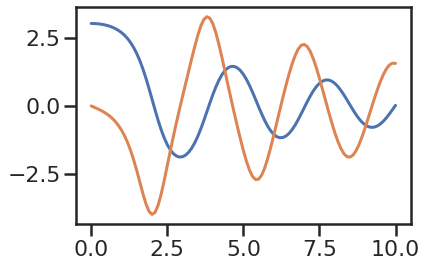

/tmp/ipykernel_13166/1887084945.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([dxdt,dydt])


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [16]:
#odes

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def pend(y, t, b, c):
    theta, omega = y

    return np.array([omega, -b*omega - c*np.sin(theta)])
b=0.25; c=5.0
t = np.linspace(0, 10, 101)
y0 = [np.pi - 0.1, 0.0]
sol = odeint(pend, y0,t, args=(b, c))
plt.plot(t,sol)
#plt.legend()
plt.show()

#solving the system
def model(z,t):
    x,y=z
    dxdt=5*x-3*y,
    dydt=-6*x+2*y
    return np.array([dxdt,dydt])
z=[1,2]
t=np.linspace(1,10,100)
v=odeint(model,z,t)
plt.plot(t,v[:,0],label="X(t)")
plt.plot(t,v[:,1],label="y(t)")
plt.legend()
plt.show()

def model(z0,x):
    y,z=z0
    dydx=z; dzdx=np.sin(x)
    return np.array([dydx,dzdx])
z0=np.array([1,6])
x=np.linspace(-2*np.pi,2*np.pi,100)
l=odeint(model,z0,x)
plt.subplot(1,2,1)
plt.plot(x,l[:,1],label="Y(z)")

plt.subplot(1,2,2)
plt.plot(x,l[:,0],label="Z(z)")
plt.show()

#plotting the piecewize fuction
def Fuct(x):
    if x>0:
        return 3*x**2
    elif x<-6:
        return x**2
g=np.vectorize(Fuct)
x=np.linspace(-10,10,1000)
plt.plot(x,g(x))

#This code will solve the pendulum proble using euler method
def Euler(a,b,c,N,f):
    global x
    x=np.linspace(a,b,N+1)
    y=np.empty(N+1)
    y[0]=c
    h=(b-a)/N
    for i in range(N):
        y[i+1]=y[i]+h*f(x[i],y[i])
    return y
#f=lambda x,y: 2*x+np.sin(y*x)
def model(z0,t):
    dxdt,dzdt=z
    return np.array([z, np.sin(x)])
l=Euler(0,10,[2,4],1000,model)
plt.plot(x,l)
plt.show()


def func(z,x):
    y1,y2=z
    return np.array([y1+y2**2+3*x, 3*y1+y2**2-np.cos(x)])
x=np.linspace(1,1.5,100)
zo=np.array([0,0])
y1=odeint(func,zo,x)
# plt.subplot(1,2,1)
# plt.plot(x,y1)
plt.subplot(1,2,2)
plt.plot(x,y1[:,0],'black',label="y1")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("Y2")
plt.subplot(1,2,1)
plt.plot(x,y1[:,1],'r',label="y1")
plt.legend()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
def process(alpha,N,q):
    x=np.zeros(N+1)
    x[0]=np.random.normal(0,1)
    for i in range(1,N+1):
        x[i]=alpha*x[i-1]+np.random.normal(0, q)
    return x

def data(r,h):
    xi=process(alpha,N,q)
    y=np.zeros(N)
    for i in range(N):
        y[i]=h*xi[i]+np.random.normal(0,r)
    return y



import matplotlib.pyplot as plt
def EulerOdeSys(f,c,t):
    H=t[1]-t[0]
    N=len(t)
    M=len(c)
    z=np.zeros((N,M))
    z[0]=c
    for i in range(N-1):
        z[i+1]=z[i]+H*f(z[i],t[i+1])
    return z

def f(z,t):
    x1,x2,x3=z
    dx1dt=-1/2*x1
    dx2dt=1/2*x1-1/4*x2
    dx3dt=1/4*x2-1/6*x3
    return np.array([dx1dt,dx2dt,dx3dt])

c=np.array([1,1,1])
t=np.linspace(0,4,200)
z=EulerOdeSys(f,c,t)
plt.plot(t,z[:,0])
plt.show()



import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint,quad
import matplotlib.pyplot as plt

def MatGenerator(a,b,alp,lam,beta,N,g):
    H=(b-a)/N
    global x
    x=np.linspace(a,b,N+1)
    B=np.zeros(N+1)
    B[0]=alp
    B[N]=beta
    B[1:N]=(H**2/lam**2)*g(x[1:N])
    A=np.eye(N+1,N+1)
    A[1,0]=-1
    A[N-1,N]=-1
    A[1:N,1:N]=-np.eye(N-1,N-1,k=-1)+2*np.eye(N-1,N-1,k=0)-np.eye(N-1,N-1,k=1)
    return A,B


g=lambda x: -4*(1+x)*np.exp(x)
a=0
b=1
alp=-4
lam=1
beta=0
N=100
A,B=MatGenerator(a,b,alp,lam,beta,N,g)
U=np.linalg.solve(A,B)
print(U)
plt.plot(x,U)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$U_{app}(x)$")
plt.title("Apprioximation")
plt.show()


def  MatGenerator1(a,b,K, alpha, beta,N, g):
    H=(b-a)/N
    global x,xe
    x=np.linspace(a,b,N+1)
    xe=x+H/2
    B=np.zeros(N+1)
    B[0]=alpha
    B[N]=beta
    B[1:N]=(H**2)*g(x[1:N])
    A=np.eye(N+1,N+1)
    A[1,0]=-K(xe[0])
    A[N-1,N]=-K(xe[N])
    T=np.zeros((N-1,N-1))
    for i in range(N-1):
        T[i]=-K(xe[i])*np.eye(N-1,N-1,k=-1)[i]+(K(xe[i])+K(xe[i+1]))*np.eye(N-1,N-1,k=0)[i]-K(xe[i+1])*np.eye(N-1,N-1,k=1)[i]
    A[1:N,1:N]=T
    return A,B


k=lambda x: x**2
g=lambda x: -4*(x**3+3*x**2)*np.exp(x+1)
uex=lambda x: 4*(x-1)*np.exp(x+1)
print(U)
A,B=MatGenerator1(-1,1,k, -8, 0,100, g)
U=np.linalg.solve(A,B)
plt.subplot(2,2,1)
plt.plot(x,U)
plt.subplot(2,2,2)
plt.plot(x,uex(x))
plt.subplot(2,2,3)
plt.plot(x,abs(U-uex(x)))
    

In [ ]:
# to load data

diamond=sns.load_dataset('diamonds')#, cache=True, data_home=None)

In [ ]:
def QuadEqu(c,b,a = 1,):
    if a==0:
        if b==0:
            if c==0:
                sol="R"
            else:
                sol="{}"
        else:
            sol="{"+str(-c/b)+"}"
    else:
        delta=b**2-4*a*c
        if delta<0:
            sol="{}"
        elif delta == 0:
            sol="{"+str(-b/(2*a))+"}"
        else:
            sol="{"+str((-b+delta**(1/2))/(2*a))+";"+str((-b-delta**(1/2))/(2*a))+"}"
    return sol

In [ ]:
sym.init_printing()
x,y,z = sym.symbols('x,y,z')
c1 = sym.Symbol('c1')
f = sym.Eq(2*x**2+y+z,1)
g = sym.Eq(x+2*y+z,c1)
h = sym.Eq(-2*x+y,-z)
sym.solve([f,g,h],(x,y,z))

In [ ]:
def DigRoot(n):
    s=0
    while n>0:
        s=s+n%10
        n=n//10
    if s<10:
        return s
    else:
        return DigRoot(s)

In [ ]:
# to display info about data
diamond.info()
print(list(diamond['color'].values.unique()))
diamond['depth'].min()
diamond.sort_values(by=['clarity'], ascending=True, inplace=True)
number=diamond.groupby(by=['clarity','cut']).count()#.iloc[:,0]
number['Number']=number.x.values
number.loc[:,['Number']]
diamond=sns.load_dataset('diamonds')#, cache=True, data_home=None)

diamond.sort_values(by=["price"], ascending=False)
a=diamond[diamond['price']==diamond['price'].max()]
a[["price","clarity"]]

#plot
diamond = sns.load_dataset("penguins")
sns.pairplot(diamond, hue="species")
plt.show()



In [ ]:
import numpy as np
def EulerMethod(f,c,t):
    M=len(c); N=len(t)
    H=t[1]-t[0]
    Y=np.zeros((N,M))
    Y[0]=c
    for i in range(N-1):
        Y[i+1]=Y[i]+H*f(Y[i],t[i])
    return Y
yo=[1,1,1]
t=np.linspace(1,4,200)
sol=odeint(fun,yo,t)

plt.figure(figsize=(10,10))
plt.plot(t,sol[:,0],label='x1')
plt.plot(t,sol[:,1],label='x2')
plt.plot(t,sol[:,2],label='x3')
plt.legend()

x00=EulerMethod(fun,yo,t)
plt.plot(t,x00[:,0],'--',label="X1", markersize=0.1)
plt.plot(t,x00[:,1],'--',label='X2')
plt.plot(t,x00[:,2],'--',label="X3")
plt.legend()
plt.show()
t,x00[:,0]-sol[:,0]

In [ ]:
#importing files
warnings.filterwarnings("ignore")
# You can import custom data
cs_df = pd.read_csv('ComputerSales.csv')

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

In [ ]:
#plotiing
# Provides a way to look at a univariate distribution. A 
# univariate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
# Bins define how many buckets to divide the data up into between intervals
# For example put all profits between $10 and $20 in this bucket
sns.distplot(crash_df['not_distracted'], kde=True, bins=25)
# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')
# Get just the KDE plot
sns.kdeplot(crash_df['alcohol'])
sns.pairplot(crash_df)

# Load data on tips
tips_df = sns.load_dataset('tips')
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows
#matrix
# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = crash_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues');

#regression plot
plt.figure(figsize=(8,6));
sns.set_context('paper', font_scale=1.4);

plt.figure(figsize=(8,6));

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'});

**Exercise 1**

1- Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.




In [ ]:
def Fibon():
  output = 0
  n0 = 1  
  n1 = 2  
  while n0 <= 4000000:
    if n0 % 2 == 0:
      output += n0
    n0, n1 =n1, n0 + n1
  return output

Fibon()

2- An irrational decimal fraction is created by concatenating the positive integers: 0.12345678910<font color='red'>1</font>112131415161718192021...

It can be seen that the 12th digit of the fractional part is <font color='red'>1</font>. If $d_n$ represents the nth digit of the fractional part, find the value of the following expression.

$$d_1 × d_{10} × d_{100} × d_{1000} × d_{10000} × d_{100000} × d_{1000000}$$

In [ ]:
def Digit():
  d=""
  output = 1
  for i in range(1, 185186):
    d+=str(i)
  for i in range(7):
    output *= int(d[10**i - 1])
  return output
 
Digit()

3- You are given the following information, but you may prefer to do some research for yourself.

- 1 Jan 1900 was a Monday.
- Thirty days has September, April, June and November.
- All the rest have thirty-one, Saving February alone, Which has twenty-eight, rain or shine. And on leap years, twenty-nine.
- A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400.

How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?

In [ ]:
def Sunday_Count():
    def Day_finder(d, m, y):
        t = [ 0, 3, 2, 5, 0, 3, 5, 1, 4, 6, 2, 4 ]
        y -= m < 3
        return (( y + int(y / 4) - int(y / 100) + int(y / 400) + t[m - 1] + d) % 7)
    count=0
    for i in range(1901, 2001):
      for j in range(1, 13):
        if Day_finder(1, j, i)==0:
          count+=1
    return(count)

Sunday_Count()

**Exercise 2**

1- Write a function that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

In [ ]:
def String_manipulator (s):
  t=""
  for i in s:
    if (i.isalpha()):
            t+=i
  return t.swapcase()
String_manipulator("All upper @#$%^&*(case letters from s are changed into lower case..")


2- Write a function, named **UpLow**, that takes one argument: string ``s`` and **returns** a list with two elements. The first element should be the number of **lowercase letters** in ``s``. The second element should be the number of **uppercase letters** in ``s``.

In [ ]:
def UpLow (s):
  l_count=0
  u_count=0
  for i in s:
    if (i.islower()):
      l_count+=1
    if (i.isupper()):
      u_count+=1
  return [l_count, u_count]

UpLow("Write a function, named UpLow, that takes one argument: string s and returns a list with two elements.")

3- Write a function that takes one argument: string ``s`` and returns either ``True`` or ``False``. It should return ``True`` if and only if **the string is a name**. We assume that a string is a name if:
* It starts with an uppercase letter.
* All the other characters are lowercase letters.

In [ ]:
def Name_checker(s):
  r= False
  if s.isalpha() and (s[0].isupper() and s[1:].islower()):
    r=True
  return r
Name_checker("Aimabled")


4- Write a function that takes one argument: list of strings ``L``. The function should return an integer: **The first index where the list contains a name**. If there are no names on the list please return ``-1``

In [ ]:
def Name_checker_2(L):
  for i in range(len(L)):
    for j in L[i].split():
      if Name_checker(j):
        r=i
        return r
  return -1
Name_checker_2(["aJoshua", "$Daniel", "my name is aPeter", "alex"])

In [ ]:
s = 'a b cd'
s = s.split()
print(s)

**Exercise 3**

1- Write a function that takes one argument: List of integers ``L`` and returns the **maximum element in ``L`` which is strictly negative**. If such an element does not exist, **return ``0``**.

In [ ]:
def Maximum_Neg (L):
  g=[]
  [g.append(i) for i in L if i<0]
  if len(g)==0:
    return 0
  return max(g) 


L=[0, 0, -6, -67, 89, 123]
Maximum_Neg(L)


2- Write a function that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Please use the function from Problem 3 in your solution.

In [ ]:
import numpy as np
def MaxNegMat_row (M):
    g=[]
    rw=np.shape(M)[0]
    for i in range(rw):
        g.append(Maximum_Neg(list(M[i,:])))
    return np.array(g).reshape (rw,-1), sum(g)  


m=np.array([1, -7, 3, -9, 0, 0, 7, -1, 2, -10, 79, 0, 84, 0, 1, -11, 2, -3, 4, 9, 0]).reshape(3,-1)
MaxNegMat_row (m)



3- Write a function that takes one argument: A matrix of integers ``M`` and:
* For each **column** computes the maximum negative element.
* Returns the **sum of those elements**.


In [ ]:
def MaxNegMat_col (M):
  import numpy as np
  g=[]
  l=np.shape(M)[1]
  for i in range(l):
    g.append(Maximum_Neg(list(M[:,i])))
  return np.array(g).reshape (-1, l), sum(g)  

MaxNegMat_col(m)

**Exercise 4**

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

In [ ]:
from scipy.integrate import quad
eq_1=lambda x: (x**3+5*x-20)/(x**2+3)
eq_2=lambda x: (x-1/3)*((x**4-3)**0.5)
print("A= ", quad(eq_1, 0, 2)[0])
print("B=", quad(eq_2, 3, 5)[0])

2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

In [ ]:
#3pt
def Trap(a, b, f, H = 0.001):
    N = int((b-a)/H)
    x = np.linspace(a, b, N+1)
    Z = 0
    for i in range(1, N+1):
        Z += H*(x[i-1] + x[i])/2
    return Z

In [ ]:
def Trap(a, b, f, H=0.001):
  N=int((b-a)/H)
  x=np.linspace(a, b, N+1)
  Z=0
  for i in range(1, N+1):
    Z+=H*((f(x[i-1])+f(x[i]))/2)
  return Z

3- Compute the integrales A and B using your function **Trap**

In [ ]:
print("A= ", Trap(a=0, b=2, f=eq_1))
print("B=", Trap(a=3, b=5, f=eq_2))

**Exercise 5**
Write a python code to solve the following system of equations
1. \begin{equation}
\begin{cases}
    x^2 + y + x = 4\\
    2e^x + 3y = 14
\end{cases}
\end{equation}

In [ ]:
from scipy.optimize import fsolve

def non_linear_solver (s):
  x,y=s
  F=np.empty([2])
  F[0]=x**2+y+x-4
  F[1]=2*(np.exp(x))+3*y-14
  return F
Guess_val=np.array([0,0])
v=fsolve(non_linear_solver, Guess_val)
print(" x= {} \n y= {}". format(v[0], v[1,])) 
   

2. 

\begin{equation}
  \begin{cases}
    x - 2y -z +6t= 4\\
    2x + 2y -z - 7t = -4\\
    -x - y +2z + 5t = 5\\
    -3x +4y +2z + 5t = 8\\
  \end{cases}.
\end{equation}

In [ ]:
A = np.array([1, -2, -1, 6, 2, 2, -1, -7, -1, -1, 2, 5, -3, 4, 2, 5]).reshape(4,-1)
b = np.array([4, -4, 5, 8]).reshape(4,-1)
z = np.linalg.solve(A,b)
print(" x= {} \n y= {} \n z= {} \n t= {} \n". format(z[0], z[1,], z[2,], z[3,])) 


**Exercise 6**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = f(x,y),      & \quad \text{on } [a, b]\\&\qquad\qquad\qquad (1)\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using Euler method i.e.
$$ y_{k+1} = y_k + Hf(x_k,y_k) $$


In [ ]:
import matplotlib.pyplot as plt
def EulerMethod(a,b,c,N,f):
  x=np.linspace(a,b,N)
  H=x[1]-x[0]
  y=np.zeros(len(x))
  y[0]=c
  for i in range(0, N-1):
    y[i+1] = y[i] + f(x[i], y[i]) * H
  return x, y 





2. Write a python function <b> RK2Method </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using second order Runge-Kutta  method i.e.
\begin{equation}
\begin{cases}
\alpha = f(x_k,y_k)\\\\
y_{k+1} = y_k + Hf(x_k+\dfrac{H}{2}, y_k + \dfrac{H}{2}\alpha)
\end{cases}
\end{equation}

In [ ]:
def RK2Method (a,b,c,N,f):
  x=np.linspace(a,b,N)
  y=np.zeros(len(x))
  H=x[1]-x[0]
  y[0]=c
  for i in range(0, N-1):
    y[i+1] = y[i] + H * f( x[i] + (H / 2.0), y[i] + ((H/2) * f(x[i], y[i] )))
  return x, y

3. Let us consider the initial value problem 

\begin{equation}
  \begin{cases}
    y' = 2y + e^{2x},      & \quad \text{on } [0, 1]\\\\
    y(0) = 3,
  \end{cases}
\end{equation}
with exact solution $g(x) = (x+3)e^{2x}$. 

For $N=200$, use subplot to plot side by side
- the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>
- the absolute error between the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>

In [ ]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#odeint
def model(y,x):
    dydt = (2*y)+(np.exp(2*x))
    return dydt
y0 = 3
x = np.linspace(0,1,200)
y = odeint(model,y0,x)
plt.figure(figsize = (15, 15))
plt.subplot(3,1,3)
plt.plot(x, y,'bo--', label='Approximate')
plt.plot(x, (x+3)*np.exp(2*x), 'red', label='Exact')
plt.title('Approximate and Exact Solution Using odeint')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')


f=lambda x, y: (2*y)+(np.exp(2*x))

# Euler Method
e=EulerMethod(a=0,b=1,c=3,N=200,f=f)
plt.subplot(3,1,1)
plt.plot(e[0], e[1], 'bo--', label='Approximate')
plt.plot(x, (x+3)*np.exp(2*x), 'red', label='Exact')
plt.title('Approximate and Exact Solution Using Euler Method')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')


#RK2Method
r=RK2Method (a=0,b=1,c=3,N=200,f=f)
plt.subplot(3,1,2)
plt.plot(r[0], r[1], 'bo--', label='Approximate')
plt.plot(x, (x+3)*np.exp(2*x), 'red', label='Exact')
plt.title('Approximate and Exact Solution Using RK2Method')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(loc='lower right')

#Absolute error
# w=np.absolute(e[1]-(x+3)*np.exp(2*x))
# z=np.absolute(r[1]-(x+3)*np.exp(2*x))
# y=np.absolute(y-(x+3)*np.exp(2*x))

# plt.figure(figsize = (15, 15))
# plt.subplot(3,1,1)
# plt.plot(x, w, 'bo--', label='Error')
# plt.title('Absolute Error of EulerMethod')
# plt.xlabel('x')
# plt.ylabel('Error')
# plt.grid()
# plt.legend(loc='lower right')


# plt.subplot(3,1,2)
# plt.plot(x, z, 'bo--', label='Error')
# plt.title('Absolute Error of RK2Method')
# plt.xlabel('x')
# plt.ylabel('Error')
# plt.grid()
# plt.legend(loc='lower right')


# plt.subplot(3,1,3)
# plt.plot(x, y, 'bo--', label='Error')
# plt.title('Absolute Error of odeint')
# plt.xlabel('x')
# plt.ylabel('Error')
# plt.grid()
# plt.legend(loc='lower right')

# print("odeint is the most efficient method (MSE= {}), followed by RK2Method ({}) and Euler Method ({})".format(er_3, er_2, er_1))

4. Which of the numerical methods used is more efficient? Why?

**Exercise 7**

Consider heat conduction in a rod with constant heat conduction properties, $\lambda^2$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\lambda^2\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{\lambda^2}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \lambda, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [ ]:
def  MatGenerator(a,b,lamda,alp,beta,N,g):
    h=(b-a)/N
    R=-np.eye(N+1,N+1,k=-1)+2*np.eye(N+1,N+1,k=0)-np.eye(N+1,N+1,k=1)
    A=(lamda**2/h**2)*R
    x=np.linspace(a,b,N+1)
    B=np.empty((N+1))
    B[0]=g(x[0])+alp*(lamda**2/h**2)
    B[N]=g(x[N])+beta*(lamda**2/h**2)
    for i in range(1,N):
        B[i]=g(x[i-1])

    return A,B

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, \lambda=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x, $$

and plot the numerical solution

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
g=lambda x: -4*(1+x)*np.exp(x)
A=MatGenerator(0,1,1,-4,0,100,g)[0]
B=MatGenerator(0,1,1,-4,0,100,g)[1]
U=np.linalg.solve(A,B)
print(U)
h=0.01
x=np.arange(0,1+h, h)
plt.figure(figsize = (5, 3), dpi = 300)
plt.plot(x,U)
plt.title('graph of numerical solution of the steady-state heat-conduction problem ')
plt.xlabel('x')
plt.ylabel(' numerical solution of U')
plt.grid()
plt.show()

**Exercise 14**

Create a Module that contains all the functions on this notebook. Then, import the module to test its functions (one function per cell) 

Note: if your group number is **5** then your module should be named **AllFunctionGroup5.py**

In [ ]:
import AllFunctionGroup7 as a7
import numpy as np

In [ ]:
a7.Fibon()

In [ ]:
a7.Digit()

In [ ]:
a7.Sunday_Count()

In [ ]:
a7.String_manipulator("All upper @#$%^&*(case letters from s are changed into lower case..")

In [ ]:
a7.UpLow("Write a function, named UpLow, that takes one argument: string s and returns a list with two elements.")

In [ ]:
a7.Name_checker("sSdfghjk")

In [ ]:
a7.Name_checker_2(["aJoshua", "$Daniel", "My name is Peter", "alex"])

In [ ]:
a7.Maximum_Neg([0, 0, -6, -67, 89, 123])

In [ ]:
import numpy as np
m= np.array([1, -7, 3, -9, 0, 0, 7, -1, 2, -10, 79, 0, 84, 0, 1, -11, 2, -3, 4, 9, 0]).reshape(3,-1)
a7.MaxNegMat_row(m)

In [ ]:
a7.MaxNegMat_col(m)

In [ ]:
eq_1=lambda x: (x**3+5*x-20)/(x**2+3)
eq_2=lambda x: (x-1/3)*((x**4-3)**0.5)
print("A= ", a7.Trap(a=0, b=2, f=eq_1))
print("B=", a7.Trap(a=3, b=5, f=eq_2))

In [ ]:
from scipy.optimize import fsolve
Guess_val=np.array([0,0])
v=fsolve(a7.non_linear_solver, Guess_val)
print(" x= {} \n y= {}". format(v[0], v[1,])) 

In [ ]:
f=lambda x, y: (2*y)+(np.exp(2*x))
a7.EulerMethod(a=0,b=1,c=3,N=200,f=f)

In [ ]:
f=lambda x, y: (2*y)+(np.exp(2*x))
a7.RK2Method (a=0,b=1,c=3,N=200,f=f)

In [ ]:
g=lambda x: -4*(1+x)*np.exp(x)
a7.MatGenerator(0,1,1,-4,0,100,g)

In [ ]:
def Bissection(f,a,b,epsilon=0.01):
    if f(a)*f(b) > 0:
        print("Bissection failed")
        return ""
    else:
        xbar=(b+a)/2
        if f(xbar) == 0 or b-a <= 2*epsilon:
            return xbar, f(xbar)
        elif f(xbar) * f(a) <0:
            return Bissection(f,a,xbar,epsilon)
        else:
            return Bissection(f,xbar,b,epsilon)

In [ ]:
def Firstprimes(n=2):
    if n==2:
        return 2
    elif n%2==0:
        p=n+1
    else:
        p=n
    while not IsPrime(p):
        p+=2
    return p

def primes(n=100):
    x=[2]
    i=3
    while len(x)<n:
        if IsPrime(i):
            x.append(i)
        i=Firstprimes(i+1)
    return x

In [ ]:
def V(n,p):
    r=0
    i=0
    while(p**i <= n):
        if n%(p**i) == 0:
            r=i
        i+=1
    return r

In [ ]:
def D(n,m):
    s=0
    for i in range(2,max(n,m)+1):
        if IsPrime(i)==True:
            s+= abs(V(n,i)-V(m,i))
    return s

In [ ]:
def eurerode(f,c,t):
    H=(t[-1]-t[0])/len(t)
    Z=np.zeros(len(t),len(c))
    Z[0]=c
    for k in range(N):
        Z[k+1]=Z[k]+H*f(Z[k],t[k])
    return Z

In [ ]:
#5pt
def function(z, x):
    y,v = z
    dydx = v
    dvdx = -2*v + 30 *( np.exp(3*x))
    return np.array([dydx, dvdx])

def SODA(a, b, H = 0.001):
    yi = np.array([2, 8])
    N = int((b-a)/H)
    x = np.linspace(a, b, N+1)
    solution = odeint(function , yi, x)
    return x, solution[:,0]

In [ ]:
Errors
def L2_error(a, b, H):
    YK = SODA(a,b,H)[1]
    GK = gk(SODA(a,b,H)[0])
    N = int((b-a)/H)
    total = 0
    for i in range(0, N+1):
        total += (H*(YK[i] - GK[i])**2)
    return total

In [ ]:
H = np.array([10**(-1),10**(-2),10**(-3),10**(-4)])
𝐿2𝐸𝑟𝑗 = np.array([L2_error(0, 2, 10**(-1)),L2_error(0, 2, 10**(-2)),L2_error(0, 2, 10**(-3)), L2_error(0, 2, 10**(-4))])
print("𝐿2𝐸𝑟𝑗 = ", 𝐿2𝐸𝑟𝑗)

In [ ]:
#3pt
plt.plot(H,𝐿2𝐸𝑟𝑗)
plt.xlabel('H')
plt.ylabel("L2Erj")

In [ ]:
gk = lambda x : 2 * np.exp(3*x) - np.exp(-2*x) + 1

plt.plot(xk, abs(yk - gk(xk)))
plt.xlabel('xk')
plt.ylabel("abs(yk - gk(xk)")

In [ ]:
#karma filter 


In [ ]:
import numpy as np

def Process(alp, N, q):
  x = np.empty((N+1))
  x[0] = np.random.normal(0,1)
  for i in range(1,N+1):
    x[i] = alp * x[i-1] + np.random.normal(0,q)
  return x


In [ ]:
def Data(x, r, h):
  N = len(x)-1
  y = h * x[1:] + np.random.normal(0, r, N)

  return y

In [ ]:
import matplotlib.pyplot as plt
np.random.seed(10)
r = 0.1
h = 1
alp = 0.8
N = 30
q = 0.4

x = Process(alp, N, q) 
y = Data(x, r, h)
plt.plot(np.arange(1,N+1), y)
plt.plot(np.arange(0,N+1), x)
plt.show()

In [ ]:
# plotting scatter plot
plt.scatter(x, np.sin(x));

plt.plot(x, x + 0, color='k')  # black line
plt.plot(x, x + 1,'--g')  # green line
plt.plot(x, x + 2, color='r')  # red line 
plt.plot(x, x + 3,':b'); # blue line

# changing colours of lines
plt.plot(x, x + 0, color='black')  
plt.plot(x, x + 1, color='green') 
plt.plot(x, x + 2, color='red') 
plt.plot(x, x + 3, color='blue')
plt.show()
# For short, you can use the following codes:
plt.plot(x, x + 0, linestyle='-')  # solid
plt.plot(x, x + 1, linestyle='--') # dashed
plt.plot(x, x + 2, linestyle='-.') # dashdot
plt.plot(x, x + 3, linestyle=':');  # dotted
# changing the linestyles
plt.plot(x, x + 0, linestyle='solid')    
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');
#plt.style.use('classic')
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
fig.savefig('my_figure.jpg')   # calling savefig function to save the plot
fig=plt.figure()
plt.plot(x, np.sin(x))

plt.title("A Sine Curve")  # adding title of the plot
plt.xlabel('x')            # adding label for the x-axis of the plot 
plt.ylabel('sin(x)');      # adding label for the y-axis of the plot 
fig.savefig('My figure.jpg')
# tuning histogram plot
plt.hist(data, bins=30, alpha=0.5, histtype='bar', edgecolor=None);

In [ ]:
#making subplot
x=np.array([1,2,3,4])
y=np.array([10,20,30,40])
plt.subplot(2,3,1)
plt.plot(x,y)

plt.subplot(2,3,2)
plt.plot(x,y)

x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])
plt.subplot(2, 3, 3)
plt.plot(x,y)

x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])
plt.subplot(2, 3, 4)
plt.plot(x,y)

plt.subplot(2, 3, 5)
plt.plot(x,y)
plt.show()

In [4]:
import numpy as np
import seaborn as sb
datas = sb.load_dataset("titanic")
datas.shape
# datas.head(20)
datas.isnull().sum()
datas.drop(columns = ['deck'], inplace = True)
datas.dropna(axis = 0, inplace = True)
datas.shape
datas

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [4]:
datas.loc[(datas['sex'] == 'female') & (datas['survived'] == 1)].shape[0]

195

In [5]:
datas.loc[(datas['sex'] == 'male') & (datas['survived'] == 0)].mean()[2]

/tmp/ipykernel_5520/2314365691.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  datas.loc[(datas['sex'] == 'male') & (datas['survived'] == 0)].mean()[2]


31.618055555555557

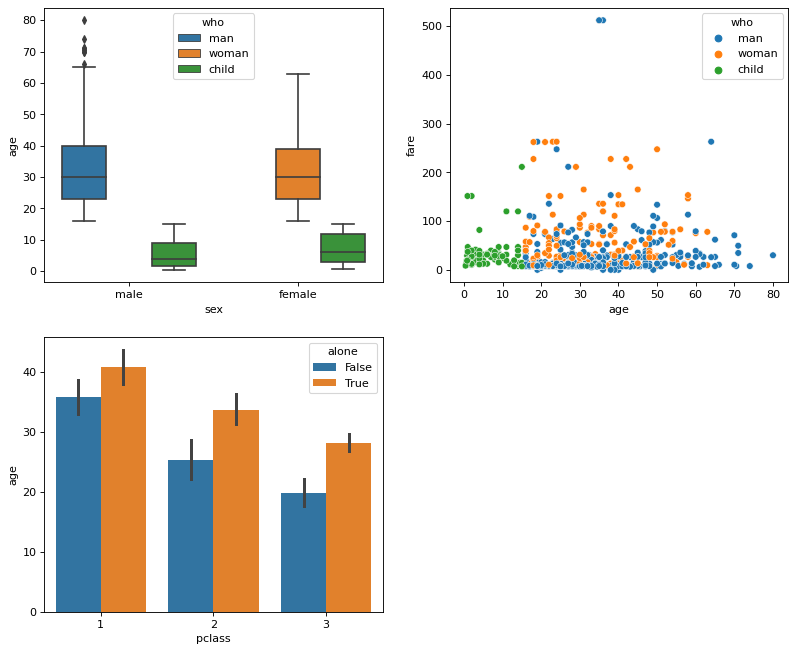

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10), dpi=80)
plt.subplot(2,2,1)
sb.boxplot(x="sex", y="age", hue="who", data=datas)

plt.subplot(2,2,2)
sb.scatterplot(x="age", y="fare",hue="who", data=datas)

plt.subplot(2,2,3)
sb.barplot(x="pclass", y="age", hue="alone", data=datas)

plt.show()

================================================================================

In [2]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
sb.set_context('poster')
set1  = sb.load_dataset('diamonds')
set1.head(20)
set1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
set1.shape[1]
set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:

print(list(set1['color'].values.unique()))

['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [5]:
set1['depth'].min()

43.0

In [6]:
number=set1.groupby(by = ['clarity', 'cut']).count().iloc[:,0]
# number['Number']=number.x.values
# number.loc[:,['Number']]
number

clarity  cut      
IF       Ideal        1212
         Premium       230
         Very Good     268
         Good           71
         Fair            9
VVS1     Ideal        2047
         Premium       616
         Very Good     789
         Good          186
         Fair           17
VVS2     Ideal        2606
         Premium       870
         Very Good    1235
         Good          286
         Fair           69
VS1      Ideal        3589
         Premium      1989
         Very Good    1775
         Good          648
         Fair          170
VS2      Ideal        5071
         Premium      3357
         Very Good    2591
         Good          978
         Fair          261
SI1      Ideal        4282
         Premium      3575
         Very Good    3240
         Good         1560
         Fair          408
SI2      Ideal        2598
         Premium      2949
         Very Good    2100
         Good         1081
         Fair          466
I1       Ideal         146
         

In [7]:
set1.loc[set1['price'] == set1['price'].max()].iloc[:,[2,3,6]]

,color,clarity,price
27749,I,VS2,18823


<AxesSubplot:xlabel='x', ylabel='price'>

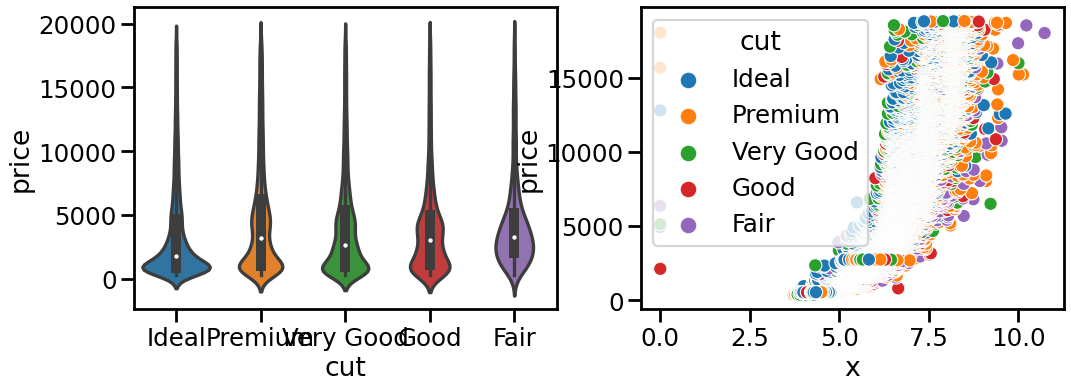

In [8]:
plt.figure(figsize=(15, 5), dpi=80)
plt.subplot(1,2,1)
sb.violinplot(x='cut',y='price',data=set1)
plt.subplot(1,2,2)
sb.scatterplot(x='x',y='price',hue='cut',data=set1)

===========================================================================

**Exercise 4**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

In [2]:
#5pt
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def SODE(a,b,H):
    # initial condition
    y0 = [2,8]
    
    # syst of odes
    def models(y,x):
        y,z = y
        dydx = z
        dzdx = 30*np.exp(3*x)-2*z
        return np.array([dydx,dzdx])

    # time points
    N = int((b-a)/H + 1)
    t = np.linspace(a,b,N)
    u = odeint(models,y0,t)
    return t, u[:,0]

2- Solve the second-order differential equation for $a = 0, b = 2$ and plot the solution.

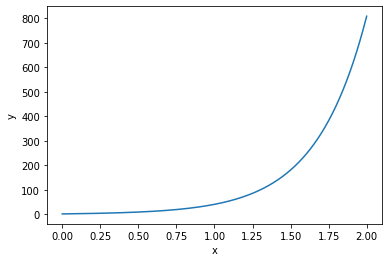

In [3]:
t,ysol = SODE(0,2,0.001)
plt.plot(t,ysol)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

3- The exact solution of the second-order differential equation is $g(x)= 2e^{3x}-e^{-2x}+1$. Plot the absolute value, $\mid y_k - g_k\mid$ against x_k.

In [ ]:
g = 2*np.exp(3*t) - np.exp(-2*t) + 1
e = np.absolute(ysol-g)
# plt.plot(t,ysol,t,g)
plt.plot(t,e)
plt.xlabel('x')
plt.ylabel('|y(x)-g(x)|')
plt.show()

4- Write a Write a function called **L2_error** that takes $a,b,H$ and return the L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_0^N H(y_k - g_k)^2$$

In [ ]:
def L2_error(a,b,H):
    x,ysol = SODE(a,b,H)
    g = 2*np.exp(3*x) - np.exp(-2*x) + 1
    L2Er = (H*(ysol - g)**2)
    return sum(L2Er)

4- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [ ]:
Hj = np.array([10**-1,10**-2,10**-3,10**-4])
L2Erj = []
for i in Hj:
    L2Erj = np.append(L2Erj,L2_error(0,2,i))
print(L2Erj)

5- Plot the array of $L2Er_j$ against the array of $H_j$.

In [ ]:
plt.plot(Hj,L2Erj)
plt.xlabel('Hj')
plt.ylabel('L2Erj')
plt.show()

=======================================================================

# second ex

$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

In [9]:
def model(v,t):
    x1,x2,x3=v
    dx1dt=-(1/2)*x1
    dx2dt=(1/2)*x1-(1/4)*x2
    dx3dt=(1/4)*x2-(1/6)*x3
    return np.array([dx1dt, dx2dt,dx3dt])
vo=[1,1,1]
t=np.linspace(0,4,200)
v=odeint(model,vo,t)
x1=v[:,0]
x2=v[:,1]
x3=v[:,2]
print("x1=",x1,"\nx2=",x2,"\nx3=",x3)

2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


In [ ]:
x11=np.exp(-t/2)
x22=-2*np.exp(-t/2)+3*np.exp(-t/4)
x33=-(3/2)*np.exp(-t/2)-9*np.exp(-t/4)+(17/2)*np.exp(-t/6)

plt.style.use("seaborn")

plt.figure(figsize=(12,10))
plt.subplot(3,2,1)
plt.plot(t,x1,label="x1 aproximate")
plt.plot(t,x11,label="x1 exact")
plt.title("x1")
plt.legend()

plt.subplot(3,2,2)
plt.plot(t,abs(x1-x11))
plt.title("absolute error for x1")


plt.subplot(3,2,3)
plt.plot(t,x2,label="x2 aproximate")
plt.plot(t,x22,label="x2 exact")
plt.title("x2")
plt.legend()

plt.subplot(3,2,4)
plt.plot(t,abs(x2-x22))
plt.title("absolute error for x2")

plt.subplot(3,2,5)
plt.plot(t,x3,label="x3 aproximate")
plt.plot(t,x33,label="x3 exact")
plt.title("x3")
plt.legend()

plt.subplot(3,2,6)
plt.plot(t,abs(x3-x33))
plt.title("absolute error for x3")

plt.show()

$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem =\eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [10]:
def  EulerOdeSys(f,c,t):
    N=len(t)
    M=len(f(v,t))
    H=t[1]-t[0]
    Z=np.zeros((N,M))
    Z[0]=c
    for k in range(N-1):
        Z[k+1]=Z[k]+H*f(Z[k],t[k])
    return Z  

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [12]:
def RK4OdeSys(f,c,t):
    N=len(t)
    M=len(f(v,t))
    H=t[1]-t[0]
    Z=np.empty((N,M))
    Z[0]=c
    for k in range(N-1):
        k1=f(Z[k],t[k])
        k2=f(Z[k]+H*(k1/2),t[k]+(H/2))
        k3=f(Z[k]+H*(k2/2),t[k]+(H/2))
        k4=f(Z[k]+H*k3,t[k]+H)
        Z[k+1]=Z[k]+(H/6)*(k1+2*k2+2*k3+k4)
    return Z


3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

In [ ]:
def model(v,t):
    x1=v[0]
    x2=v[1]
    x3=v[2]
    #x1,x2,x3=v
    dx1dt=-(1/2)*x1
    dx2dt=(1/2)*x1-(1/4)*x2
    dx3dt=(1/4)*x2-(1/6)*x3
    return np.array([dx1dt, dx2dt,dx3dt])
vo=[1,1,1]
t=np.linspace(0,4,200)

# f=model(vo,t)
c=vo
z=EulerOdeSys(model,c,t)
z2=RK4OdeSys(model,c,t)
# print("x1=",z[:,0],"\n\nx2=",z[:,1],"\n\nx3=",z[:,2])
print("x1=",z2[:,0],"\n\nx2=",z2[:,1],"\n\nx3=",z2[:,2])

$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [ ]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint,quad
import matplotlib.pyplot as plt

def MatGenerator(a,b,alp,lam,beta,N,g):
    H=(b-a)/N
    global x
    x=np.linspace(a,b,N+1)
    B=np.zeros(N+1)
    B[0]=alp
    B[N]=beta
    B[1:N]=(H**2/lam**2)*g(x[1:N])
    A=np.eye(N+1,N+1)
    A[1,0]=-1
    A[N-1,N]=-1
    A[1:N,1:N]=-np.eye(N-1,N-1,k=-1)+2*np.eye(N-1,N-1,k=0)-np.eye(N-1,N-1,k=1)
    return A,B

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, K=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x $$

In [ ]:
g=lambda x: -4*(1+x)*np.exp(x)
a=0
b=1
alp=-4
lam=1
beta=0
N=100
A,B=MatGenerator(a,b,alp,lam,beta,N,g)
U=np.linalg.solve(A,B)
print(U)
plt.plot(x,U)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$U_{app}(x)$")
plt.title("Apprioximation")
plt.show()

# Linear Regression


In [18]:
# Handle all my imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

<b>Example: </b>
Let’s consider a use case where we have collected students’ average test grade scores
and their respective average number of study hours for the test for group of similar IQ
students.

In [19]:
data = {'Hours_Studied': [2,3,4,5,6,7,8,9,10],
       'Test_Grade':[57,66,73,76,79,81,90,96,100]}
df = pd.DataFrame(data)
df.head()

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79


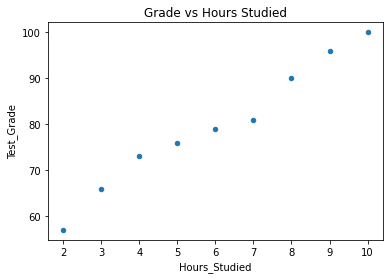

In [20]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

**Exercise 1**

1- Write a program that asks the user to enter a word and determines whether the word is a
palindrome or not. A palindrome is a word that reads the same backwards as forwards.

In [43]:
word= input("Enter a word: ")
if word.upper() == word.upper()[::-1]:
    print(f"{word} is a palindrome.")
else:
    print(f"{word} is not a palindrome.")

Enter a word: Pop
Pop is a palindrome.


2- A simple way to estimate the number of words in a string is to count the number of spaces
in the string. Write a program that asks the user for a string and returns an estimate of how
many words are in the string.

In [44]:
def Words():
    s= input("Enter a string: ")
    return len(s.split(" "))-s.split(" ").count("")

3-Write a program that asks the user for a large integer and inserts commas into it according
to the standard American convention for commas in large numbers. For instance, if the user
enters 1000000, the output should be 1,000,000.

In [48]:
e= input("Enter a large integer: ")
if len(e)<4:
    print(e)
else:
    b= [ e[len(e)-3*i-3:len(e)-3*i] for i in range(len(e)//3) ]
    if len(e)%3 != 0:
        a= [e[:len(e)%3]]
        b.append(a[0])
    b= b[::-1]
    print(",".join(b))

Enter a large integer: 1000000
1,000,000


**Exercise 2**

The goal of this exercise is to see if you can mimic the behavior of the **in** operator and the
**count** and **index** methods using only variables, for loops, and if statements.

1- Without using the **in** operator, write a program that asks the user for a string and a letter
and prints out whether or not the letter appears in the string.


In [49]:
word= input("Enter a string: ")
l= input("Enter a letter: ")
d= "not present"
for i in word:
    if i == l:
        d= "present"
        break
print(f"{l} is {d} in {word}.")

Enter a string: hfjgf
Enter a letter: f
f is present in hfjgf.


2- Without using the **count** method, write a program that asks the user for a string and a
letter and counts how many occurrences there are of the letter in the string.


In [85]:
word= input("Enter a string: ")
l= input("Enter a letter: ")
d=0
for i in word:
    if i == l:
        d+=1
print(f"{l} appears {d} times in {word}.")

Enter a string: sgrgergfgs
Enter a letter: g
g appears 4 times in sgrgergfgs.


3- Without using the **index** method, write a program that asks the user for a string and
a letter and prints out the index of the first occurrence of the letter in the string. If the
letter is not in the string, the program should say so.

In [89]:
word= input("Enter a string: ")
l= input("Enter a letter: ")
d= -1
for i in range(len(word)):
    if word[i] == l:
        d= i
if d==-1:
    print(f"{l} is not in {word}")
else:
    print(f"The first index of {l} in {word} is at index {d}")

Enter a string: get
Enter a letter: t
The first index of t in get is at index 2


**Exercise 3**

Write a function that takes any two lists L and M of the same size and adds their elements together to form a new list N whose elements are sums of the corresponding elements in L and M. For instance, if L=[3,1,4] and M=[1,5,9], then N should equal [4,6,13].

In [50]:
def Add(L,M):
    return [L[i]+M[i] for i in range(len(L))]

**Exercise 4**

Write a program that removes any repeated items from a list so that each item appears at most
once. For instance, the list [1,1,2,3,4,3,0,0] would become [1,2,3,4,0].

In [51]:
def Rem(L):
    return [i for i in set(L)]

**Exercise 5**

Let L=[2,3,5,7,11,13,17,19,23,29,31,37,41,43,47]. Use a list comprehension to
produce a list of the gaps between consecutive entries in L. Then find the maximum gap size
and the percentage of gaps that have size 2.

In [111]:
L= [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47]
g= [abs(L[i+1]-L[i]) for i in range(len(L)-1)]
mg= max(g)
p2= 100*g.count(2)/len(g)
print(f"The list of gaps is {g}.\nThe maximum gap is {mg}.\nThe percentage of gaps of size 2 is {p2} % ")

The list of gaps is [1, 2, 2, 4, 2, 4, 2, 4, 6, 2, 6, 4, 2, 4].
The maximum gap is 6.
The percentage of gaps of size 2 is 42.857142857142854 % 


**Exercise 6**

1- Using the list comprehensions, write a function, **ListComp** that takes a list $L$ of strings as input and returns 
- a list that consists of the strings of $L$ with their first characters removed
- a list of the lengths of the strings of $L$
- a list that consists of only those strings of $L$ that are at least 5 characters long

In [114]:
def ListComp(L):
    le=[len(i) for i in L]
    l3=[]
    ll=[i.removeprefix(i[0]) for i in L]
    for i in range(len(L)):
        if len(L[i])<6:
            l3.append(L[i])
    return ll, le, l3

2- Test your function **ListComp** by using the surname of your group members

In [128]:
ListComp(["Njabo", "Ndonfack", "Nibishaka", "Kimani","Niyokwizera"])

(['jabo', 'donfack', 'ibishaka', 'imani', 'iyokwizera'],
 [5, 8, 9, 6, 11],
 ['Njabo'])

**Exercise 7**

1- Write a program that repeatedly asks the user to enter product names and prices. Store all
of these in a dictionary whose keys are the product names and whose values are the prices.
When the user is done entering products and prices, allow them to repeatedly enter a product
name and print the corresponding price or a message if the product is not in the dictionary.

In [140]:
products={}
p=eval(input("Enter the number of products: "))
for i in range(p):
    name= input("Enter a product name: ")
    price= eval(input("Enter the price of the product: "))
    products.update({name:price})
a=eval(input("Enter the number of products you want to access: "))
for i in range(a):
    n= input("Enter a product name: ")
    if n in products:
        print(f"The price of {n} is {products[n]}.")
    else:
        print(f"{n} is not available.")

Enter the number of products: 5
Enter a product name: Hat
Enter the price of the product: 10
Enter a product name: Shirt
Enter the price of the product: 15
Enter a product name: Pants
Enter the price of the product: 40
Enter a product name: Shoes
Enter the price of the product: 75
Enter a product name: Vest
Enter the price of the product: 123
Enter the number of products you want to access: 2
Enter a product name: Shoes
The price of Shoes is 75.
Enter a product name: Socks
Socks is not available.


2- Using the dictionary created above, allow the user to enter a dollar amount and print out all the products whose price is less than that amount.

In [142]:
dol = eval(input("Enter a dollar amount: "))
less={}
for i in products:
    if products[i]<dol:
        less.update({i:products[i]})
less

Enter a dollar amount: 35


{'Hat': 10, 'Shirt': 15}

**Exercise 8**

1 - Repeatedly ask the user to enter a team name and the how many games the team won and
how many they lost. Store this information in a dictionary where the keys are the team names
and the values are lists of the form [wins, losses].

In [144]:
n = int(input("Enter number of teams: "))
records = {}
for i in range(n):
    name = input("Enter the name of the team: ")
    wins = int(input("Enter the number of wins: "))
    losses = int(input("Enter the number of losses: "))
    records.update({name:[wins, losses]})

Enter number of teams: 4
Enter the name of the team: Warriors
Enter the number of wins: 53
Enter the number of losses: 29
Enter the name of the team: Mavericks
Enter the number of wins: 52
Enter the number of losses: 30
Enter the name of the team: Pistons
Enter the number of wins: 23
Enter the number of losses: 59
Enter the name of the team: Magic
Enter the number of wins: 22
Enter the number of losses: 60


2- Using the dictionary created above, allow the user to enter a team name and print out the team’s winning percentage.

In [145]:
t = input("Enter team name :")
print(f"The winning percentage of {t} is {100*records[t][0]/sum(records[t])} %")

Enter team name :Magic
The winning percentage of Magic is 26.829268292682926 %


3- Using the dictionary, create a list whose entries are the number of wins of each team.

In [147]:
w_team = [i[0] for i in records.values()]
print(w_team)

[53, 52, 23, 22]


4- Using the dictionary, create a list of all those teams that have winning records.

In [148]:
w_rec = []
for i in records:
    if records[i][0] > records[i][1] :
        w_rec.append(i)
print(w_rec)

['Warriors', 'Mavericks']


**Exercise 9**

Write a function called matches that takes two strings as arguments and returns how many
matches there are between the strings. A match is where the two strings have the same character at the same index. For instance, 'python' and 'path' match in the first, third, and
fourth characters, so the function should return 3.

In [ ]:
def matches(n,m):
    r=0
    for i in range(min(len(n),len(m))):
        if n[i] == m[i]:
            r+=1
    return r

**Exercise 10**

Recall that if s is a string, then s.find('a') will find the location of the first a in s. The
problem is that it does not find the location of every a. Write a function called findall that
given a string and a single character, returns a list containing all of the locations of that character in the string. It should return an empty list if there are no occurrences of the character
in the string.

In [150]:
def findall(word, char):
    pos=[]
    for i in range(len(word)):
        if word[i] == char:
            pos.append(i)
    return pos

[1, 8, 13, 14, 16, 19]

**Exercise 11**

Write a function that takes two already sorted lists (ascending order) of possibly different lengths,
and merges them into a single sorted list.

1- Do this using the sort method. Function name is **merge1**

In [161]:
def merge1(l1, l2):
    r=l1+l2
    r.sort()
    return r

[1, 2, 3, 4, 5, 6, 7]

2- Do this without using the sort method. Function name is **merge2**

In [167]:
def merge2(l1, l2):
    r=l1+l2
    d=[]
    for i in range(len(r)):
        d.append(min(r))
        r.remove(d[i])
    return d

3- Test the two function using the list

L1 = [15, 20, 40, 58, 62, 64];
L2 = [58, 60, 62, 64, 70]

In [168]:
print(merge1([15, 20, 40, 58, 62, 64], [58, 60, 62, 64, 70]))
print(merge2([15, 20, 40, 58, 62, 64], [58, 60, 62, 64, 70]))

[15, 20, 40, 58, 58, 60, 62, 62, 64, 64, 70]
[15, 20, 40, 58, 58, 60, 62, 62, 64, 64, 70]


**Exercise 12**

1- Let us consider a continuous function “f” which is defined on the closed interval [a, b], is given with f(a) and f(b) of different signs. Then by intermediate theorem, there exists a point x belong to (a, b) for which f(x) = 0. The bisection method is an approximation method to find the roots of the given equation by repeatedly dividing the interval. This method will divide the interval until the resulting interval is found, which is extremely small.

Let $x_0 \in [a,b]$ be the solution of the equation $f(x) = 0$. Write a function named **Bissection** that
- returns $\bar{x}$ and $f(\bar{x})$  such that $ \mid \bar{x} - x_0 \mid \leq \epsilon, $ if $f(a)\times f(b)\leq 0$
- prints "Bissection method failed", otherwise.

for the given inputs $f,a,b$ and $\epsilon$ with a default value $10^{-2}$.

In [57]:
def Bissection(f,a,b,epsilon=0.01):
    if f(a)*f(b) > 0:
        print("Bissection failed")
        return ""
    else:
        xbar=(b+a)/2
        if f(xbar) == 0 or b-a <= 2*epsilon:
            return xbar, f(xbar)
        elif f(xbar) * f(a) <0:
            return Bissection(f,a,xbar,epsilon)
        else:
            return Bissection(f,xbar,b,epsilon)

2- Test your function **Bissection** for $ f(x) = x^3 -3x - 5$, $a=-10$ and $b=10$

In [59]:
f= lambda x : x**3-3*x-5
print(Bissection(f,-10,10))

(2.275390625, -0.04555877298116684)


**Exercise 13**

1- Write a function called <b>number_of_factors</b> that takes a positive integer and returns how many factors the number has; and a list of its factors.

In [26]:
def number_of_factors(n):
    x=[1]
    if n==1:
        return len(x),x
    else:
        for i in range(2,n//2+1):
            if n%i==0:
                x.append(i)
        x.append(n)
        return len(x),x

2- Write a Python function called <b>IsPrime</b> that takes a positive integer, $n$, as input and returns the boolean True if $n$ is a prime number and False, otherwise. 

Note : A prime number (or a prime) is a natural number greater than 1 and that has no positive divisors other than 1 and itself.



In [27]:
def IsPrime(n):
    return number_of_factors(n)[0] == 2

False

3- Write a function called **primes** that is given a positive integer $n$ and returns a list of the first $n$
primes. Let the default value of n be 100.


In [28]:
def Firstprimes(n=2):
    if n==2:
        return 2
    elif n%2==0:
        p=n+1
    else:
        p=n
    while not IsPrime(p):
        p+=2
    return p

def primes(n=100):
    x=[2]
    i=3
    while len(x)<n:
        if IsPrime(i):
            x.append(i)
        i=Firstprimes(i+1)
    return x

4- Modify the function above so that there is an optional argument called start that allows
the list def Firstprimes(n=2):to start at a value other than 2. The function should return the first n primes that
are greater than or equal to start. The default value of start should be 2.

In [29]:
def primes2(start=2, n=100):
    x=[Firstprimes(start)]
    i=Firstprimes(x[0]+1)
    while len(x)<n:
        if IsPrime(i):
            x.append(i)
        i=Firstprimes(i+1)
    return x

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541]

5- Write a function **V** that takes a positive integer $n$ and a prime number $p$ and returns the greaters integer $r$ such that $p^r$ divides $n$.



In [34]:
def V(n,p):
    r=0
    i=0
    while(p**i <= n):
        if n%(p**i) == 0:
            r=i
        i+=1
    return r

6- Write the funtion **D** that takes two positive integer $n,m$ and return the sum $S_1$ given by 
 $$ S_1 = \sum_{p\; prime} \Bigl| V(n,p) - V(m,p)\Bigr| $$

Note that $D(14,24)=4$.



In [41]:
def D(n,m):
    s=0
    for i in range(2,max(n,m)+1):
        if IsPrime(i)==True:
            s+= abs(V(n,i)-V(m,i))
    return s

4

7- Write the funtion $P$ that takes a positive integer $N$ and return the sum $S_2$ given by 

$$S_2  = \sum_{n=1}^{N}\sum_{m=1}^{N}D(n,m).$$

Note that $S(10)=210$ and $S(10^2)$ = 37018.


In [42]:
def P(N):
    s=0
    for n in range(1,N+1):
        for m in range(1,N+1):
            s+=D(n,m)
    return s
P(100)

37018

**Exercise 14**

Create a Module **AllFunction.py** that contains all the functions on this notebook. Then, import the module to test the functions.

In [61]:
import Group2 as gp
print(f"There are {gp.Words()} words.")
print(f"[1,2,3,4] and [5,6,7,8] become {gp.Add([1,2,3,4],[5,6,7,8])}")
print(f"[1,1,2,3,4,3,5] become {gp.Rem([1,1,2,3,4,3,5])}")
print(f"python and path match {gp.matches('python','path')} times.")
print(gp.ListComp(["Njabo", "Ndonfack", "Nibishaka", "Kimani","Niyokwizera"]))
print(f"p appears {gp.findall('popopo', 'p')} times in popopo.")
print(gp.merge1([1,223,32], [12,122]))
print(gp.merge2([1,223,32], [12,122]))
f= lambda x : x**3-3*x-5
print(gp.Bissection(f,-10,10))
print(f"number_of_factors(12) = {gp.number_of_factors(12)}")
print(f"Is 37 prime? {IsPrime(37)}")
print(f"The 100 first primes are {gp.primes()}")
print(f"The 100 first primes greater than 3 are {gp.primes2(3,100)}")
print(f"V(48,2) = {gp.V(48,2)}")
print(f"D(14,24) = {gp.D(14,24)}")
print(f"P(10) = {gp.P(10)}")

Enter a string: gegg   ethrth tehryh   ehth
4


**Exercise 1**(<font color = red> 6pts  </font>)

1- A store charges RWF 12 per item if you buy less than 10 items. If you buy between 10 and 99 items, the cost is RWF 10 per item. If you buy 100 or more items, the cost is RWF 7 per item. Write the ADL of the function, named <b>Cost</b>, that takes how many items ,$n$, they are buying and returns the total cost. (<font color = red> 3pts  </font>)

2- Translate the ADL into a python code.(<font color = red> 2pts  </font>)

In [1]:
def Cost(n):
    if n<10:
        price=12*n
    elif n<100:
        price=10*n
    else:
        price=7*n
    return price

3- Test the function <b>Cost</b> for $n = 50 \text{ and } 255$. (<font color = red> 1pt  </font>)

In [2]:
print("50 items cost RWF",Cost(50))
print("255 items cost RWF",Cost(255))

50 items cost RWF 500
255 items cost RWF 1785


**Exercise 2**(<font color = red> 10pts  </font>)

1- Write the ADL of the function, named <b>QuadEqu</b>, that takes as inputs three numbers
$a$, $b$, $c$ ∈ $\mathbb{R}$ and return the solution in R of the equation
$ax^2 + bx + c = 0$. (<font color = red> 3pts  </font>)

2- Translate the ADL into a python code such that $a=1$ by default. (<font color = red> 4pts  </font>)

In [3]:
def QuadEqu(c,b,a = 1,):
    if a==0:
        if b==0:
            if c==0:
                sol="R"
            else:
                sol="{}"
        else:
            sol="{"+str(-c/b)+"}"
    else:
        delta=b**2-4*a*c
        if delta<0:
            sol="{}"
        elif delta == 0:
            sol="{"+str(-b/(2*a))+"}"
        else:
            sol="{"+str((-b+delta**(1/2))/(2*a))+";"+str((-b-delta**(1/2))/(2*a))+"}"
    return sol

3- Test the function  <b>QuadEqu</b> for 
- $a=1, b=2, c=1$,
- $a=2, b=2, c=40$,
- $a=2, b=3, c=-5$. 

(<font color = red> 3pts  </font>)

In [4]:
print(QuadEqu(1,2))
print(QuadEqu(40,2,2))
print(QuadEqu(-5,3,2))

{-1.0}
{}
{1.0;-2.5}


**Exercise 3** (<font color = red> 9pts  </font>)

1- A year is a leap year if it is divisible by 4, except that years divisible
by 100 are not leap years unless they are also divisible by 400.
Write the ADL of the function, named <b>LeapYear</b>, that takes a year, $y$, and return the boolean <b>True</b>
if $y$ is a leap year; <b>False</b> otherwise.(<font color = red> 3pts  </font>)

2- Translate the ADL into a python code. (<font color = red> 2pts  </font>)

In [5]:
def LeapYear(y):
    d= (y%4==0 and y%100!=0)or(y%400==0)
    return d

3- Test the python code for the years 1700, 1900, 1996 and 2000. (<font color = red> 1pts  </font>)

In [6]:
print(LeapYear(1700))
print(LeapYear(1900))
print(LeapYear(1996))
print(LeapYear(2000))

False
False
True
True


4- Write the python code that asks the user to enter a year,$z$ , and displays how many leap years are between 1996 and that year. Test your code for $z=2023$ (<font color = red> 3pts  </font>)

In [7]:
z= eval(input("Enter a year: "))
if z>1996:
    print((z-1996)//4-(z-1996)//100+(z-1996)//400+1)
else:
    print((1996-z)//4-(1996-z)//100+(1996-z)//400+1)

Enter a year: 2023
7


**Exercise 4** (<font color = red> 4pts  </font>)

The digital root of a positive number n is obtained as follows: Add up the digits n to get a new number.
Add up the digits of that to get another new number. Keep doing this until you get a number
that has only one digit. That number is the digital root.

For example, if $n = 45893$, we add up the digits to get $$4 + 5 + 8 + 9 + 3 = 29.$$ We then add up
the digits of $29$ to get $$2 + 9 = 11.$$ We then add up the digits of $11$ to get $$1 + 1 = 2.$$ Since 2 has
only one digit, 2 is our digital root.

1- Write the Python code of the function **DigRoot** that returns the digital root of an integer $n$ given as input (you can use the python function **len**).(<font color = red> 3pts  </font>)



In [8]:
def DigRoot(n):
    s=0
    while n>0:
        s=s+n%10
        n=n//10
    if s<10:
        return s
    else:
        return DigRoot(s)

2-  Test the function **DigRoot** for $n = 74568$.(<font color = red> 1pts  </font>)

In [9]:
print("The digital root of 74568 is",DigRoot(74568))

The digital root of 74568 is 3


**Exercise 5**(<font color = red> 6pts  </font>)

1- Write a Python code that asks the user to enter a string and displays the number of upper case letters and lower case letters. Check for: **The quick Brow Fox and 'I am proud of Mr McDonald**. (<font color = red> 3pts  </font>)

In [10]:
s= input("Enter a string: ")
up=0
lo=0
for i in range(len(s)):
    if (s[i].isupper()):
        up=up+1
    elif (s[i].islower()):
        lo=lo+1
print("There are",up,"upper case letters and",lo,"lower case letters.")

Enter a string: The quick Brow Fox and 'I am proud of Mr McDonald.
There are 7 upper case letters and 31 lower case letters.


2- Write a Python code that asks the user to input two strings and returns the first location in which the strings differ. If the strings are identical, it should return -1. (<font color = red> 3pts  </font>)

In [11]:
def Loc():
    s1=input("Enter a string: ")
    s2=input("Enter a second string: ")
    if s1 == s2:
        return -1
    else:
        i=0
        while i<len(s1) and i<len(s2):
            if s1[i] != s2[i]:
                return i+1
            i=i+1
        return i+1
Loc()

Enter a string: t6yury
Enter a second string: 65urgjhg


1

**Exercise 6**(<font color = red> 6pts  </font>)

1- Write a Python code of function, named **AllDivisor** , that takes a positive integer $n$ as input and returns the list of all the divisors of $n$. (<font color = red> 3pts  </font>)

In [12]:
def AllDivisor(n):
    if n==1:
        return [1]
    else:
        d= [1,n]
        i=2
        while i<=n/2:
            if n%i ==0:
                d.append(i)
            i=i+1
        return d
AllDivisor(12)

[1, 12, 2, 3, 4, 6]

2- Write a Python code, based on the function **AllDivisor**, that asks the user to enter a positive integer $n$
and tells if n is a prime number or not. Test the code for $n=97$. (<font color = red> 3pts  </font>)

In [13]:
n = eval(input("Enter a positive integer: "))
if len(AllDivisor(n))==2:
    print(n,"is prime.")
else:
    print(n,"is not prime.")

Enter a positive integer: 97
97 is prime.


**Exercise 7**(<font color = red> 9pts  </font>)

1- Use the python lambda syntax to define the function $ f(x) = x^3 -3x - 5$ then compute and display $f(-10)$, $f(10)$. (<font color = red> 3pts  </font>)

In [14]:
f= lambda x : x**3-3*x-5
print("f(-10)=",f(-10))
print("f(10)=",f(10))

f(-10)= -975
f(10)= 965


2- Let us consider a continuous function “f” which is defined on the closed interval [a, b], is given with f(a) and f(b) of different signs. Then by intermediate theorem, there exists a point x belong to (a, b) for which f(x) = 0. The bisection method is an approximation method to find the roots of the given equation by repeatedly dividing the interval. This method will divide the interval until the resulting interval is found, which is extremely small.

Given the following function $ f(x) = x^3 -3x - 5;$ let $x_0 \in [a,b]$ be the solution of the equation $f(x) = 0$. Write a function named **Bissection** that returns an approximation $\bar{x}$ of $x_0$ such that $$ \mid \bar{x} - x_0 \mid \leq \epsilon, $$
for the given inputs $a,b$ and $\epsilon$ with a default value $10^{-2}$.(<font color = red> 5pts  </font>)

In [15]:
def Bissection(a,b,epsilon=0.01):
    xbar=(b+a)/2
    if f(xbar) == 0 or b-a <= 2*epsilon:
        return xbar
    elif f(xbar)<0:
        if f(a)<0:
            return Bissection(xbar,b)
        else:
            return Bissection(a,xbar)
    else:
        if f(a)>0:
            return Bissection(xbar,b)
        else:
            return Bissection(a,xbar)

3- Test the function **Bissection** for $a=-10, b=10$. (<font color = red> 1pts  </font>)

In [16]:
print(Bissection(-10,10))

2.275390625


**Exercise 1**

1- Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.




In [194]:
def Fibonacci(n):
    if n in [1,2]:
        return n
    else:
        return Fibonacci(n-1)+Fibonacci(n-2)

def SumEven():
    s=2
    n=5
    while Fibonacci(n) <= 4000000:
        s+=Fibonacci(n)
        n+=3
    return s
print(f"The sum is {SumEven()}")

The sum is 4613732


2- An irrational decimal fraction is created by concatenating the positive integers: 0.12345678910<font color='red'>1</font>112131415161718192021...

It can be seen that the 12th digit of the fractional part is <font color='red'>1</font>. If $d_n$ represents the nth digit of the fractional part, find the value of the following expression.

$$d_1 × d_{10} × d_{100} × d_{1000} × d_{10000} × d_{100000} × d_{1000000}$$

In [230]:
d= ("").join([str(i) for i in range(185186)])
v= int(d[1])*int(d[10])*int(d[100])*int(d[1000])*int(d[10000])*int(d[100000])*int(d[1000000])
print(f"The value is {v}.")

The value is 210.


3- You are given the following information, but you may prefer to do some research for yourself.

- 1 Jan 1900 was a Monday.
- Thirty days has September, April, June and November.
- All the rest have thirty-one, Saving February alone, Which has twenty-eight, rain or shine. And on leap years, twenty-nine.
- A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400.

How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?

In [198]:
def Leap_Year(y):
    # Returns if a year is a leap year or not
    return (y % 4 == 0 and y % 100 != 0 ) or (y % 400 == 0)

def Jan1(y):
    # Returns the day of January 1st for the year y as an integer in {0,1...6}
    if y == 1900:
        return 1
    elif Leap_Year(y-1):
        return (Jan1(y-1)+2) % 7
    else:
        return (Jan1(y-1)+1) % 7
    
def Month1(m,y):
    # Returns the first day of month m in {1,2...12} for the year y 
    if m == 1:
        return Jan1(y)
    elif m in [2,4,6,8,9,11]:
        return (Month1(m-1,y) +3) % 7
    elif m!=3:
        return (Month1(m-1,y) +2) % 7
    elif Leap_Year(y):
        return (Month1(2,y)+1) % 7
    else:
        return (Month1(2,y))
    
def Sunday1():
    # Returns the answer to the question
    s=0
    for i in range(1901, 2001):
        s+= len([m for m in range(1,13) if Month1(m,i)==0])
    return s

print(f"There were {Sunday1()} months that started on a sunday during the twentieth century.")

There were 171 months that started on a sunday during the twentieth century.



**Exercise 2**

1- Write a function that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

In [116]:
def Swap(s):
    return "".join([i.swapcase() for i in s if i.isalpha()])

2- Write a function, named **UpLow**, that takes one argument: string ``s`` and **returns** a list with two elements. The first element should be the number of **lowercase letters** in ``s``. The second element should be the number of **uppercase letters** in ``s``.

In [117]:
def UpLow(s):
    l= [0, 0]
    for i in s:
        if i.isupper():
            l[1]+= 1
        elif i.islower():
            l[0]+= 1
    return l

3- Write a function that takes one argument: string ``s`` and returns either ``True`` or ``False``. It should return ``True`` if and only if **the string is a name**. We assume that a string is a name if:
* It starts with an uppercase letter.
* All the other characters are lowercase letters.

In [118]:
def IsName(s):
    return s[0].isupper() ==1 and UpLow(s)[0] == len(s)-1

4- Write a function that takes one argument: list of strings ``L``. The function should return an integer: **The first index where the list element contains a name**. If there are no names on the list please return ``-1``

In [119]:
def ListName(L):
    for i in range(len(L)):
        s= L[i].split(" ")
        for j in s:
            if IsName(j):
                return i
    return -1

**Exercise 3**

1- Write a function that takes one argument: List of integers ``L`` and returns the **maximum element in ``L`` which is strictly negative**. If such an element does not exist, **return ``0``**.

In [120]:
import numpy as np
def MaxNeg(L):
    neg= [i for i in L if i<0]
    if len(neg) == 0:
        return 0
    else:
        return max(neg)

2- Write a function that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Please use the function from Problem 3 in your solution.

In [121]:
def RowMaxNeg(M):
    s=0
    for i in M:
        s+= MaxNeg(i)
    return s

3- Write a function that takes one argument: A matrix of integers ``M`` and:
* For each **column** computes the maximum negative element.
* Returns the **sum of those elements**.


In [122]:
def ColMaxNeg(M):
    return RowMaxNeg(M.T)

**Exercise 4**

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

In [123]:
from scipy.integrate import quad
f= lambda x: (x**3+5*x-20)/(x**2+3)
g= lambda x: (x-1/3)*np.sqrt(x**4-3)
A= quad(f, 0, 2)[0]
B= quad(g, 3, 5)[0]
print(f"A= {A}. \nB={B}")

A= -7.049316535735796. 
B=124.40877284192784


2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

In [124]:
def Trap(f,a,b,H=0.001):
    Z= 0
    N= int(1+(b-a)/H)
    d= np.linspace(a,b,N)
    for i in range(1,N):
        Z+= H*(f(d[i-1])+f(d[i]))/2
    return Z

3- Compute the integrales A and B using your function **Trap**

In [125]:
f= lambda x: (x**3+5*x-20)/(x**2+3)
g= lambda x: (x-1/3)*np.sqrt(x**4-3)
A= Trap(f, 0, 2)
B= Trap(g, 3, 5)
print(f"A= {A}. \nB={B}")

A= -7.049316458638298. 
B=124.40877672379841


**Exercise 5**
Write a python code to solve the following system of equations
1. \begin{equation}
\begin{cases}
    x^2 + y + x = 4\\
    2e^x + 3y = 14
\end{cases}
\end{equation}

In [170]:
from scipy.optimize import fsolve
def System(z):
    x, y= z
    F= np.empty((2))
    F[0]= x**2+ y+ x- 4
    F[1]= 2* np.exp(x)+ 3* y
    return F

zGuess= np.empty((2))
z= fsolve(System,zGuess)
print(f"x={z[0]}, y={z[1]}")

x=2.0239643168658783, y=-4.752707030344894


2. 

\begin{equation}
  \begin{cases}
    x - 2y -z +6t= 4\\
    2x + 2y -z - 7t = -4\\
    -x - y +2z + 5t = 5\\
    -3x +4y +2z + 5t = 8\\
  \end{cases}.
\end{equation}

In [171]:
A= np.array([[1, -2, -1, 6], [2, 2, -1, -7], [-1, -1, 2, 5], [-3, 4, 2, 5]])
b= np.array([[4], [-4], [5], [8]])
z = np.linalg.solve(A,b)
print(z)

[[1.]
 [1.]
 [1.]
 [1.]]


**Exercise 6**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = f(x,y),      & \quad \text{on } [a, b]\\&\qquad\qquad\qquad (1)\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using Euler method i.e.
$$ y_{k+1} = y_k + Hf(x_k,y_k) $$


In [172]:
def EulerMethod(f, a, b, c, N):
    H= (b-a)/(N)
    x= np.linspace(a, b, N+1)
    y= np.empty((N+1))
    y[0]=c
    for i in range(1,N+1):
        y[i]= y[i-1]+H*f(x[i-1],y[i-1])
    return np.array([x,y])

2. Write a python function <b> RK2Method </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using second order Runge-Kutta  method i.e.
\begin{equation}
\begin{cases}
\alpha = f(x_k,y_k)\\\\
y_{k+1} = y_k + Hf(x_k+\dfrac{H}{2}, y_k + \dfrac{H}{2}\alpha)
\end{cases}
\end{equation}

In [173]:
def RK2Method(f, a, b, c, N):
    H= (b-a)/(N)
    x= np.linspace(a, b, N+1)
    y= np.empty((N+1))
    y[0]=c
    for i in range(1,N+1):
        y[i]= y[i-1] + H * f(x[i-1]+H/2, y[i-1]+f(x[i-1],y[i-1])*H/2)
    return np.array([x,y])

3. Let us consider the initial value problem 

\begin{equation}
  \begin{cases}
    y' = 2y + e^{2x},      & \quad \text{on } [0, 1]\\\\
    y(0) = 3,
  \end{cases}
\end{equation}
with exact solution $g(x) = (x+3)e^{2x}$. 

For $N=200$, use subplot to plot side by side
- the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>
- the absolute error between the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>

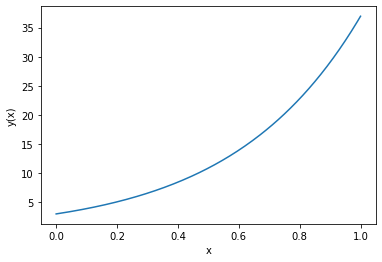

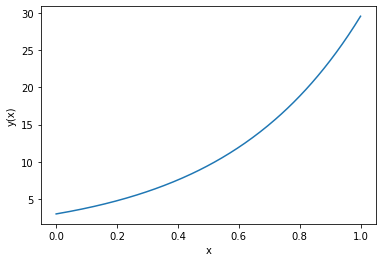

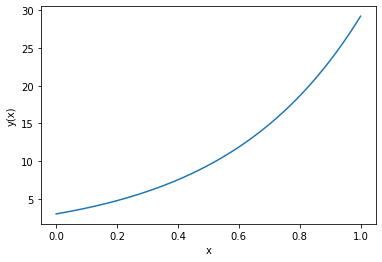

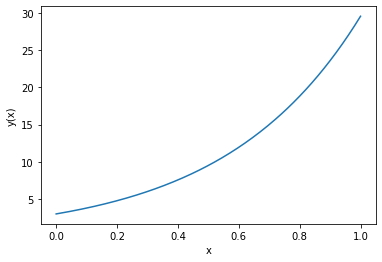

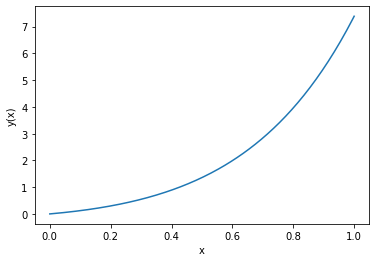

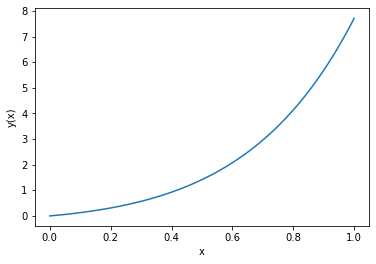

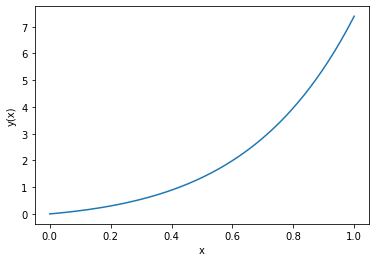

In [226]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def Realsol(a, b, c, N):
    x= np.linspace(a, b, N+1)
    y= np.empty((N+1))
    y[0]=c
    for i in range(1,N+1):
        y[i]= 3*np.exp(2*x[i])+2*x[i]*np.exp(2*x[i])
    return np.array([x,y])

def model(y,x):
    dydx = 2*y + np.exp(2*x)
    return dydx

f= lambda x,y: model(y,x)

c = 3
a = 0
b = 1
N = 200
x = np.linspace(a, b, N+1)

O= odeint(model, c, x).flatten()
E= EulerMethod(f, a, b, c, N)
R= RK2Method(f, a, b, c, N)
S= Realsol(a, b, c, N)


plt.plot(S[0],S[1])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(x,O)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(E[0],E[1])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(R[0],R[1])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

plt.plot(x,abs(O-S[1]))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(E[0],abs(E[1]-S[1]))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(R[0],abs(R[1]-S[1]))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

4. Which of the numerical methods used is more efficient? Why?

**Exercise 7**

Consider heat conduction in a rod with constant heat conduction properties, $\lambda^2$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\lambda^2\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{\lambda^2}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \lambda, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [234]:
def MatGenerator(a,b,l,alpha,bet,N,g):
    h=(b-a)/N
    x=np.linspace(a,b,N+1)
    B=np.zeros(N+1)
    B[0]=g(x[0])+alpha*(l**2/h**2)
    B[N]=g(x[N])+bet*(l**2/h**2)
    for i in range(1,N):
        B[i]=g(x[i-1])
    A=(l**2/h**2)*(-np.eye(N+1,N+1,k=-1)+2*np.eye(N+1,N+1,k=0)-np.eye(N+1,N+1,k=1))
    return A,B

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, \lambda=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x, $$

and plot the numerical solution

ValueError: x and y must have same first dimension, but have shapes (201,) and (101,)

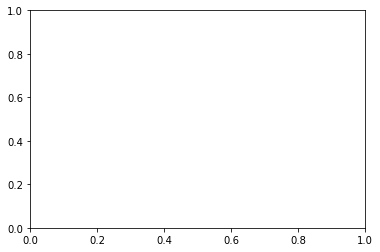

In [233]:
g= lambda x:-4*(1+x)*np.exp(x)
x
A,B= MatGenerator(0,1,1,-4,0,100,g)
U= np.linalg.solve(A,B)
plt.plot(x,U)

**Exercise 14**

Create a Module that contains all the functions on this notebook. Then, import the module to test its functions (one function per cell) 

Note: if your group number is **5** then your module should be named **AllFunctionGroup5.py**

In [200]:
import Group10 as gp
print(f"The 5th fibonacci number is {gp.Fibonacci(5)}")

The 5th fibonacci number is 8


In [201]:
print(f"The sum of even fibonacci numbers before 4 millions is {gp.SumEven()}")

The sum of even fibonacci numbers before 4 millions is 4613732


In [202]:
print(f"Is 2022 a leap year? {gp.Leap_Year(2022)}")

Is 2022 a leap year? False


In [205]:
print(f"January 1st 2022 was the {gp.Jan1(2022)}th day of the week")

January 1st 2022 was the 6th day of the week


In [206]:
print(f"October 1st 2022 was the {gp.Month1(10,2022)}th day of the week")

October 1st 2022 was the 6th day of the week


In [207]:
print(f"There were {gp.Sunday1()} months that started on a sunday during the twentieth century.")

There were 171 months that started on a sunday during the twentieth century.


In [210]:
print(f"After swapping and removing non letters, 'The_Kid.64' becomes '{gp.Swap('The_Kid.64')}'.")

After swapping and removing non letters, 'The_Kid.64' becomes 'tHEkID'.


In [211]:
print(f"The string 'The Kid is sick.' has {gp.UpLow('The Kid is sick.')[0]} lower case letters and {gp.UpLow('The Kid is sick.')[1]} upper case letters.")

The string 'The Kid is sick.' has 10 lower case letters and 2 upper case letters.


In [212]:
print(f"Is 'Thekid' a name? {gp.IsName('Thekid')}")

Is 'Thekid' a name? True


In [214]:
print(f"The first name in ['ThekiD','thekid','is Thekid good'] is at index {gp.ListName(['ThekiD','thekid','is Thekid good'])}")

The first name in ['ThekiD','thekid','is Thekid good'] is at index 2


In [216]:
print(f"The maximum negative number in [-1,2,-4] is {gp.MaxNeg([-1,2,-4])}")

The maximum negative number in [-1,2,-4] is -1


In [218]:
M= np.array([[-1,2],[1,2],[-2,-4]])
print(f"The sum of maximums per rows is {gp.RowMaxNeg(M)}")

The sum of maximums per rows is -3


In [219]:
M= np.array([[-1,2],[1,2],[-2,-4]])
print(f"The sum of maximums per columns is {gp.ColMaxNeg(M)}")

The sum of maximums per columns is -5


In [220]:
f= lambda x: (x**3+5*x-20)/(x**2+3)
A= gp.Trap(f, 0, 2)
print(f"A= {A}.")

A= -7.049316458638298.


In [221]:
zGuess= np.empty((2))
z= fsolve(gp.System,zGuess)
print(f"x={z[0]}, y={z[1]}")

x=2.0246922775889384, y=-4.756716147795825


C:\Users\ASUS\OneDrive\Documents\Prog\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [227]:
f= lambda x,y: gp.model(y,x)

E= gp.EulerMethod(f, 0, 1, 3,200)
E

array([[0.00000000e+00, 5.00000000e-03, 1.00000000e-02, 1.50000000e-02,
        2.00000000e-02, 2.50000000e-02, 3.00000000e-02, 3.50000000e-02,
        4.00000000e-02, 4.50000000e-02, 5.00000000e-02, 5.50000000e-02,
        6.00000000e-02, 6.50000000e-02, 7.00000000e-02, 7.50000000e-02,
        8.00000000e-02, 8.50000000e-02, 9.00000000e-02, 9.50000000e-02,
        1.00000000e-01, 1.05000000e-01, 1.10000000e-01, 1.15000000e-01,
        1.20000000e-01, 1.25000000e-01, 1.30000000e-01, 1.35000000e-01,
        1.40000000e-01, 1.45000000e-01, 1.50000000e-01, 1.55000000e-01,
        1.60000000e-01, 1.65000000e-01, 1.70000000e-01, 1.75000000e-01,
        1.80000000e-01, 1.85000000e-01, 1.90000000e-01, 1.95000000e-01,
        2.00000000e-01, 2.05000000e-01, 2.10000000e-01, 2.15000000e-01,
        2.20000000e-01, 2.25000000e-01, 2.30000000e-01, 2.35000000e-01,
        2.40000000e-01, 2.45000000e-01, 2.50000000e-01, 2.55000000e-01,
        2.60000000e-01, 2.65000000e-01, 2.70000000e-01, 2.750000

In [228]:
R= gp.RK2Method(f, 0, 1, 3, 200)
R

array([[0.00000000e+00, 5.00000000e-03, 1.00000000e-02, 1.50000000e-02,
        2.00000000e-02, 2.50000000e-02, 3.00000000e-02, 3.50000000e-02,
        4.00000000e-02, 4.50000000e-02, 5.00000000e-02, 5.50000000e-02,
        6.00000000e-02, 6.50000000e-02, 7.00000000e-02, 7.50000000e-02,
        8.00000000e-02, 8.50000000e-02, 9.00000000e-02, 9.50000000e-02,
        1.00000000e-01, 1.05000000e-01, 1.10000000e-01, 1.15000000e-01,
        1.20000000e-01, 1.25000000e-01, 1.30000000e-01, 1.35000000e-01,
        1.40000000e-01, 1.45000000e-01, 1.50000000e-01, 1.55000000e-01,
        1.60000000e-01, 1.65000000e-01, 1.70000000e-01, 1.75000000e-01,
        1.80000000e-01, 1.85000000e-01, 1.90000000e-01, 1.95000000e-01,
        2.00000000e-01, 2.05000000e-01, 2.10000000e-01, 2.15000000e-01,
        2.20000000e-01, 2.25000000e-01, 2.30000000e-01, 2.35000000e-01,
        2.40000000e-01, 2.45000000e-01, 2.50000000e-01, 2.55000000e-01,
        2.60000000e-01, 2.65000000e-01, 2.70000000e-01, 2.750000

In [229]:
S= gp.Realsol(0, 1, 3, 200)
S

array([[0.00000000e+00, 5.00000000e-03, 1.00000000e-02, 1.50000000e-02,
        2.00000000e-02, 2.50000000e-02, 3.00000000e-02, 3.50000000e-02,
        4.00000000e-02, 4.50000000e-02, 5.00000000e-02, 5.50000000e-02,
        6.00000000e-02, 6.50000000e-02, 7.00000000e-02, 7.50000000e-02,
        8.00000000e-02, 8.50000000e-02, 9.00000000e-02, 9.50000000e-02,
        1.00000000e-01, 1.05000000e-01, 1.10000000e-01, 1.15000000e-01,
        1.20000000e-01, 1.25000000e-01, 1.30000000e-01, 1.35000000e-01,
        1.40000000e-01, 1.45000000e-01, 1.50000000e-01, 1.55000000e-01,
        1.60000000e-01, 1.65000000e-01, 1.70000000e-01, 1.75000000e-01,
        1.80000000e-01, 1.85000000e-01, 1.90000000e-01, 1.95000000e-01,
        2.00000000e-01, 2.05000000e-01, 2.10000000e-01, 2.15000000e-01,
        2.20000000e-01, 2.25000000e-01, 2.30000000e-01, 2.35000000e-01,
        2.40000000e-01, 2.45000000e-01, 2.50000000e-01, 2.55000000e-01,
        2.60000000e-01, 2.65000000e-01, 2.70000000e-01, 2.750000

**Exercise 1**(<font color = red> 6pts  </font>)

1- A store charges RWF 12 per item if you buy less than 10 items. If you buy between 10 and 99 items, the cost is RWF 10 per item. If you buy 100 or more items, the cost is RWF 7 per item. Write the ADL of the function, named <b>Cost</b>, that takes how many items ,$n$, they are buying and returns the total cost. (<font color = red> 3pts  </font>)

2- Translate the ADL into a python code.(<font color = red> 2pts  </font>)

In [60]:
def Cost(n):
    if n<10:
        price=12*n
    elif n<100:
        price=10*n
    else:
        price=7*n
    return price

3- Test the function <b>Cost</b> for $n = 50 \text{ and } 255$. (<font color = red> 1pt  </font>)

In [61]:
print(Cost(50))
print(Cost(255))

500
1785


**Exercise 2**(<font color = red> 10pts  </font>)

1- Write the ADL of the function, named <b>QuadEqu</b>, that takes as inputs three numbers
$a$, $b$, $c$ ∈ $\mathbb{R}$ and return the solution in R of the equation
$ax^2 + bx + c = 0$. (<font color = red> 3pts  </font>)

2- Translate the ADL into a python code such that $a=1$ by default. (<font color = red> 4pts  </font>)

In [58]:
def QuadEqu(c,b,a=1):
    if a==0:
        if b==0:
            if c==0:
                sol="R"
            else:
                sol="{}"
        else:
            sol="{"+str(-c/b)+"}"
    else:
        delta=b**2-4*a*c
        if delta<0:
            sol="{}"
        elif delta == 0:
            sol="{"+str(-b/(2*a))+"}"
        else:
            sol="{"+str((-b+delta**(1/2))/(2*a))+";"+str((-b-delta**(1/2))/(2*a))+"}"
    return sol

3- Test the function  <b>QuadEqu</b> for 
- $a=1, b=2, c=1$,
- $a=2, b=2, c=40$,
- $a=2, b=3, c=-5$. 

(<font color = red> 3pts  </font>)

In [59]:
print(QuadEqu(1,2))
print(QuadEqu(40,2,2))
print(QuadEqu(-5,3,2))

{-1.0}
{}
{1.0;-2.5}


**Exercise 3** (<font color = red> 9pts  </font>)

1- A year is a leap year if it is divisible by 4, except that years divisible
by 100 are not leap years unless they are also divisible by 400.
Write the ADL of the function, named <b>LeapYear</b>, that takes a year, $y$, and return the boolean <b>True</b>
if $y$ is a leap year; <b>False</b> otherwise.(<font color = red> 3pts  </font>)

2- Translate the ADL into a python code. (<font color = red> 2pts  </font>)

In [33]:
def LeapYear(y):
    d= (y%4==0 and y%100!=0)or(y%400==0)
    return d

3- Test the python code for the years 1700, 1900, 1996 and 2000. (<font color = red> 1pts  </font>)

In [35]:
print(LeapYear(1700))
print(LeapYear(1900))
print(LeapYear(1996))
print(LeapYear(2000))

False
False
True
True


4- Write the python code that asks the user to enter a year,$z$ , and displays how many leap years are between 1996 and that year. Test your code for $z=2023$ (<font color = red> 3pts  </font>)

In [40]:
z= eval(input("Enter a year: "))
if z>1996:
    print((z-1996)//4-(z-1996)//100+(z-1996)//400+1)
else:
    print((1996-z)//4-(1996-z)//100+(1996-z)//400+1)

Enter a year: 2023
7


**Exercise 4** (<font color = red> 4pts  </font>)

The digital root of a positive number n is obtained as follows: Add up the digits n to get a new number.
Add up the digits of that to get another new number. Keep doing this until you get a number
that has only one digit. That number is the digital root.

For example, if $n = 45893$, we add up the digits to get $$4 + 5 + 8 + 9 + 3 = 29.$$ We then add up
the digits of $29$ to get $$2 + 9 = 11.$$ We then add up the digits of $11$ to get $$1 + 1 = 2.$$ Since 2 has
only one digit, 2 is our digital root.

1- Write the Python code of the function **DigRoot** that returns the digital root of an integer $n$ given as input (you can use the python function **len**).(<font color = red> 3pts  </font>)



In [31]:
def DigRoot(n):
    s=0
    while n>0:
        s=s+n%10
        n=n//10
    if s<10:
        return s
    else:
        return DigRoot(s)

2-  Test the function **DigRoot** for $n = 74568$.(<font color = red> 1pts  </font>)

In [62]:
print(DigRoot(74568))

3


**Exercise 5**(<font color = red> 6pts  </font>)

1- Write a Python code that asks the user to enter a string and displays the number of upper case letters and lower case letters. Check for: **The quick Brow Fox and 'I am proud of Mr McDonald**. (<font color = red> 3pts  </font>)

In [75]:
s= input("Enter a string: ")
up=0
lo=0
for i in range(len(s)):
    if (s[i].isupper()):
        up=up+1
    elif (s[i].islower()):
        lo=lo+1
print(up,"upper case and",lo,"lower case")

Enter a string: The quick Brow Fox and 'I am proud of Mr McDonald.
7 upper case and 31 lower case


2- Write a Python code that asks the user to input two strings and returns the first location in which the strings differ. If the strings are identical, it should return -1. (<font color = red> 3pts  </font>)

In [ ]:
def Loc(s1,s2):
    i=0
    

**Exercise 6**(<font color = red> 6pts  </font>)

1- Write a Python code of function, named **AllDivisor** , that takes a positive integer $n$ as input and returns the list of all the divisors of $n$. (<font color = red> 3pts  </font>)

In [6]:
def AllDivisor(n):
    if n==1:
        return [1]
    else:
        d= [1,n]
        i=2
        while i<=n/2:
            if n%i ==0:
                d.append(i)
            i=i+1
        return d
AllDivisor(12)

[1, 12, 2, 3, 4, 6]

2- Write a Python code, based on the function **AllDivisor**, that asks the user to enter a positive integer $n$
and tells if n is a prime number or not. Test the code for $n=97$. (<font color = red> 3pts  </font>)

In [7]:
n = eval(input("Enter a positive integer: "))
if len(AllDivisor(n))==2:
    print(n,"is prime.")
else:
    print(n,"is not prime.")

Enter a positive integer: 97
97 is prime.


**Exercise 7**(<font color = red> 9pts  </font>)

1- Use the python lambda syntax to define the function $ f(x) = x^3 -3x - 5$ then compute and display $f(-10)$, $f(10)$. (<font color = red> 3pts  </font>)

In [1]:
f= lambda x : x**3+3*x-5
print(f(-10))
print(f(10))

1025


2- Let us consider a continuous function “f” which is defined on the closed interval [a, b], is given with f(a) and f(b) of different signs. Then by intermediate theorem, there exists a point x belong to (a, b) for which f(x) = 0. The bisection method is an approximation method to find the roots of the given equation by repeatedly dividing the interval. This method will divide the interval until the resulting interval is found, which is extremely small.

Given the following function $ f(x) = x^3 -3x - 5;$ let $x_0 \in [a,b]$ be the solution of the equation $f(x) = 0$. Write a function named **Bissection** that returns an approximation $\bar{x}$ of $x_0$ such that $$ \mid \bar{x} - x_0 \mid \leq \epsilon, $$
for the given inputs $a,b$ and $\epsilon$ with a default value $10^{-2}$.(<font color = red> 5pts  </font>)

In [ ]:
def Bissection(a,b,epsilon=0.01):
    xbar=(b-a)/2
    if f(xbar)=0:
        return xbar
    elif f(xbar)<0:
        if f(a)<0:
            return Bissection(xbar,b,epsilon)
        else:
            return Bissection(a,xbar,epsilon)
    else:
        if f(a)<0:
            return Bissection(a,xbar,epsilon)
        else:
            return Bissection(xbar,b,epsilon)

3- Test the function **Bissection** for $a=-10, b=10$. (<font color = red> 1pts  </font>)

In [ ]:
print(Bissection(-10,10))

In [1]:
pwd

'/home/joel/Desktop/PPQ1'

In [ ]:
pwd

**Exercise 1**

1 - write a function, called **sum_prod**, that takes $n$ and $m$ as input and return return A and B given by $$A = \sum_{i=m}^{n} i, \quad B = \prod_{i=m}^{n} i $$ The default value of m should be 1. Check your function for $n=10$.

In [5]:
def sum_prod(n, m=1):
    A=0
    B=1
    for i in range(m,n+1):
        A+=i
        B*=i
    return A,B
print(f"sum_prod(10) = {sum_prod(10)}")

sum_prod(10) = (55, 3628800)


2- Write a Python function called **Facto** that calculates the factorial of a non-negative integer. The function accepts the number as an argument. Compute the factorial of 57.

In [10]:
def Facto(n):
    return sum_prod(n)[1]
print(f"Facto(57) = {Facto(57)}")

Facto(57) = 40526919504877216755680601905432322134980384796226602145184481280000000000000


**Exercise 2**

1- Using the list comprehensions, write a function, **ListComp** that takes a list $L$ of strings as input and returns 
- a list that consists of the strings of $L$ with their last characters removed
- a list of the lengths of the strings of $L$
- a list that consists of only those strings of $L$ that are at most 3 characters long

In [28]:
def ListComp(L):
    le=[len(i) for i in L]
    l3=[]
    ll=[i.removesuffix(i[len(i)-1]) for i in L]
    for i in range(len(L)):
        if len(L[i])<4:
            l3.append(L[i])
    return ll, le, l3

2- Check your function using the names of your closest friends at AIMS.

In [29]:
print(ListComp(["Aimee", "Noe", "Olivier"]))

(['Aime', 'No', 'Olivie'], [5, 3, 7], ['Noe'])


**Exercise 3**

A palindrome is a word that reads the same backwards as forwards. Write a program that asks the user to enter a word and determines whether the word is a palindrome or not

1- using a for loop

In [31]:
word= input("Enter a word: ")
p="palindrome"
for i in range(len(word)//2+1):
    if word[i].upper() != word[len(word)-1-i].upper():
        p="not palindrome"
        break
print(f"{word} is {p}.")

Enter a word: popk
popk is not palindrome.


2- using the string slicing

**Exercise 4**

1- Write a Python function named **characterCase** that accepts a string $S$ as input and returns the number of upper case letters and lower case letters as dictionary $D$. 

For example, if S = 'My name is Hove' then D = {'up': 2, 'lc': 10}

In [33]:
def characterCase(S):
    D={"up":0,"lc":0}
    for i in S:
        if i.isupper():
            D["up"]+=1
        elif i.islower():
            D["lc"]+=1
    return D

2- Check for 'The quick Brow Fox and I'm proud of Mr McDonald'.

In [34]:
print(characterCase("The quick Brow Fox and I'm proud of Mr McDonald"))

{'up': 7, 'lc': 30}


**Exercise 5**

Write a function called **matches** that takes two strings as arguments and returns how many matches there are between the strings. A match is where the two strings have the same character at the same index. For instance, 'python' and 'path' match in the first, third, and fourth characters, so the function should return 3.

In [36]:
def matches(n,m):
    r=0
    for i in range(min(len(n),len(m))):
        if n[i] == m[i]:
            r+=1
    return r

**Exercise 6**

Write a function **V** that takes a positive integer $n$ and a prime number $p$ and returns the greatest integer $r$ such that $p^r$ divides $n$. Check the function n=40 and p = 2.

In [37]:
def V(n,p):
    r=0
    i=0
    while(p**i <= n/2):
        if n%(p**i) == 0:
            r=i
        i+=1
    return r
print(f"V(40,2) = {V(40,2)}")

V(40,2) = 3


**Exercise 7**

1 - Write a Python function called <b>IsPrime</b> that takes a positive integer, $n$, as input and returns the boolean True if $n$ is a prime number and False, otherwise. 

Note : A prime number (or a prime) is a natural number greater than 1 and that has no positive divisors other than 1 and itself.

In [42]:
def IsPrime(n):
    if n==1:
        return False
    else:
        i=2
        while i<=n**(1/2):
            if n%i==0:
                return False
            i+=1
        return True

2- Test the function <b>IsPrime</b> for $n= 12, 47$ and $97$

In [46]:
print(f"Is 12 prime? {IsPrime(12)}")
print(f"Is 47 prime? {IsPrime(47)}")
print(f"Is 97 prime? {IsPrime(97)}")

Is 12 prime? False
Is 47 prime? True
Is 97 prime? True


3 - Write a function called **Firstprimes** that is given a positive integer $n$ and returns the smallest prime $p$ such that $n\leq p$. Let the default value of $n$ be 2.

In [51]:
def Firstprimes(n=2):
    if n%2==0:
        p=n+1
    else:
        p=n
    while not IsPrime(p):
        p+=2
    return p

4- Check the function **Firstprimes** for $n=80$

In [55]:
print(f"Firstprimes(80) = {Firstprimes(80)}")

Firstprimes(80) = 83


**Exercise 8**

Create a Module **PPQ1_Function.py** that contains all the functions on this notebook. Then, import the module to test the functions.

In [11]:
import PPQ1_Function as mf
print(f"sum_prod(10) = {mf.sum_prod(10)}")
print(f"Facto(57) = {mf.Facto(57)}")
print(f"ListComp(['Aimee', 'Noe', 'Olivier']) = {mf.ListComp(['Aimee', 'Noe', 'Olivier'])}")
print(mf.characterCase("The quick Brow Fox and I'm proud of Mr McDonald"))
print(f"matches('python','path') = {mf.matches('python','path')}")
print(f"V(40,2) = {mf.V(40,2)}")
print(f"Is 97 prime? {mf.IsPrime(97)}")
print(f"Firstprimes(80) = {mf.Firstprimes(80)}")

sum_prod(10) = (55, 3628800)
Facto(57) = 40526919504877216755680601905432322134980384796226602145184481280000000000000
ListComp(['Aimee', 'Noe', 'Olivier']) = (['Aime', 'No', 'Olivie'], [5, 3, 7], ['Noe'])
{'up': 7, 'lc': 30}
matches('python','path') = 3
V(40,2) = 3
Is 97 prime? True
Firstprimes(80) = 83


In [1]:
pwd

'/home/joel/Desktop/PPQ2'

In [23]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt

**Exercise 1** 

1- Write a function, **ReverCase**, that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

Test your function **ReverCase**.

In [3]:
#4pt
def ReverCase(S):
    return "".join([i.swapcase() for i in S if i.isalpha()])
ReverCase("joel_tchapnda_PPQ2")

'JOELTCHAPNDAppq'

2- Write a function,**MaxNegMat** , that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Test your function **MaxNegMat**

In [4]:
#4pt
#MaxNeg in a list L
def MaxNeg(L):
    k= [i for i in L if i<0]
    if len(k) == 0:
        return 0
    else:
        return max(k)
        

def MaxNegMat(M):
    s=0
    for i in M:
        s+= MaxNeg(i)
    return s

A= np.array([[2,5],[-7,1],[-5,-6]])
MaxNegMat(A)

-12

**Exercise 2**

1-The cost of admission to a popular music concert was 
- 40 USD for 1 children and 1 male
- 170 USD  for 4 children, 2 females and 3 males 
- 190 USD  for 5 children, 4 females and 2 males 

Transform the problem into a system of equation (as markdown in the cell below)


Let $x, y, t$ be respectively the price of admission for one child, one female and one male. Our problem becomes the system of equations

\begin{equation}
\begin{cases}
    x + t = 40\\
    4x + 2y + 3t = 170 \\
    5x + 4y + 2t = 190
\end{cases}
\end{equation}

2- Write a Python code to compute and display how much was the admission for each child, female and male?

In [5]:
#3pt
A= np.array([[1,0,1],[4,2,3],[5,4,2]])
b= np.array([[40],[170],[190]])
z= solve(A,b)
print(f"The price for a child is {round(z[0,0],2)} USD. The price for a female is {round(z[1,0],2)} USD. The price for a male is {round(z[2,0],2)} USD.")

The price for a child is 10.0 USD. The price for a female is 20.0 USD. The price for a male is 30.0 USD.


3- Using the Python in-built function fsolve with unitial guess $x=1, y=1$, write a Python code to solve the following system

\begin{equation}
\begin{cases}
    x^2 + x = 2 - y\\
    2e^x + 3y = 8
\end{cases}
\end{equation}



In [6]:
#5pt

def sys(z):
    x,y = z
    F= np.empty((2))
    F[0]= x**2 + x + y - 2
    F[1]= 2*np.exp(x) + 3*y -8
    return F

Guess= np.array([1,1])
d= fsolve(sys,Guess)
d

array([-3.50250769e-12,  2.00000000e+00])

**Exercise 3**

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

In [24]:
#4pt
f= lambda x: (x**3+5*x-20)/(x**2+3)
g= lambda x: (x-1/3)*np.sqrt(x**4-3)

A= quad(f,0,2)[0]
B= quad(g,3,5)[0]
print(f"A= {A}.\nB= {B}")

A= -7.049316535735796.
B= 124.40877284192784


2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

In [25]:
#3pt
def Trap(f,a,b,H=0.001):
    N= int(1+(b-a)/H)
    Z= 0
    x= np.linspace(a,b,N)
    for i in range(1,N):
        Z+= (f(x[i-1]) + f(x[i]))*H/2
    return Z

3- Compute the integrales A and B using your function **Trap**

In [26]:
#2pt
f= lambda x: (x**3+5*x-20)/(x**2+3)
g= lambda x: (x-1/3)*np.sqrt(x**4-3)

A= Trap(f,0,2)
B= Trap(g,3,5)
print(f"A= {A}.\nB= {B}")

A= -7.049316458638298.
B= 124.40877672379841


**Exercise 4**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

In [27]:
#5pt
def syst(z,x):
    y,y1= z
    dydx= y1
    dy1dx= 30*np.exp(3*x)-2*y1
    return np.array([dydx,dy1dx])
def SODE(a,b,H=0.001):
    N= int(1+(b-a)/H)
    x= np.linspace(a,b,N)
    z= [2,8]
    return np.array([x,(odeint(syst,z,x)[:,0])])

2- Solve the second-order differential equation for $a = 0, b = 2$ and plot the solution.

The solution is [[0.00000000e+00 1.00000000e-03 2.00000000e-03 ... 1.99800000e+00
  1.99900000e+00 2.00000000e+00]
 [2.00000000e+00 2.00800702e+00 2.01602810e+00 ... 8.03012575e+02
  8.05422318e+02 8.07839300e+02]]


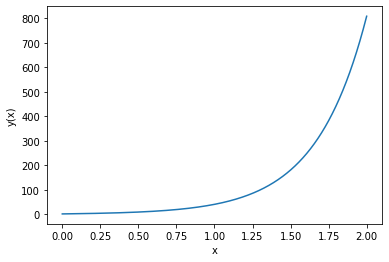

In [28]:
#4pt
c= SODE(0,2)
print(f"The solution is {c}")
plt.plot(c[0],c[1])
plt.xlabel("x")
plt.ylabel("y(x)")
plt.show()

3- The exact solution of the second-order differential equation is $g(x)= 2e^{3x}-e^{-2x}+1$. Plot the absolute value, $\mid y_k - g_k\mid$ against x_k.

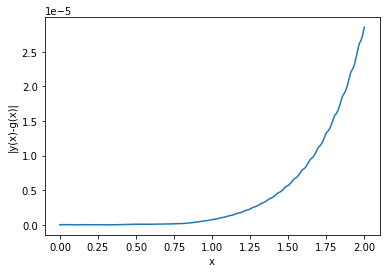

In [29]:
#3pt
g= lambda x: 2*np.exp(3*x)-np.exp(-2*x)+1
s= abs(c[1]-g(c[0]))
plt.plot(c[0],s)
plt.xlabel("x")
plt.ylabel("|y(x)-g(x)|")
plt.show()

4- Write a Write a function called **L2_error** that takes $a,b,H$ and return the L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_{k=0}^N H(y_k - g_k)^2$$

In [30]:
#3pt
def L2_error(a,b,H):
    L=0
    N= int(1+(b-a)/H)
    y= SODE(a,b,H)
    e= (y[1]-g(y[0]))**2
    for i in range(N):
        L+= H*e[i]
    return L

4- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [40]:
#3pt
L= np.array([10**(-i) for i in range(1,5)])
L2Er= np.vectorize(L2_error)
L2Er(0,2,L)

array([1.76688197e-10, 1.34088211e-10, 1.29754197e-10, 1.31295082e-10])

5- Plot the array of $L2Er_j$ against the array of $H_j$.

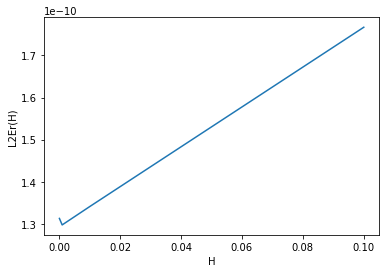

In [41]:
#3pt
plt.plot(L,L2Er(0,2,L))
plt.xlabel("H")
plt.ylabel("L2Er(H)")
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import quad
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

# Facile

## Prix Imprimerie

In [2]:
def Prix(n):
    if n<10:
        price=12*n
    elif n<100:
        price=10*n
    else:
        price=7*n
    return price

## 2e

In [3]:
def Eq(c,b,a = 1,):
    if a==0:
        if b==0:
            if c==0:
                sol="R"
            else:
                sol="{}"
        else:
            sol="{"+str(-c/b)+"}"
    else:
        delta=b**2-4*a*c
        if delta<0:
            sol="{}"
        elif delta == 0:
            sol="{"+str(-b/(2*a))+"}"
        else:
            sol="{"+str((-b+delta**(1/2))/(2*a))+";"+str((-b-delta**(1/2))/(2*a))+"}"
    return sol

## Anne bisectile

In [4]:
def bis(y):
    d= (y%4==0 and y%100!=0)or(y%400==0)
    return d

## Racine Chifffre 

In [5]:
def rac(n):
    s=0
    while n>0:
        s=s+n%10
        n=n//10
    if s<10:
        return s
    else:
        return DigRoot(s)

## Position de difference

In [7]:
def pos(s1,s2):
    if s1 == s2:
        return -1
    else:
        i=0
        while i<len(s1) and i<len(s2):
            if s1[i] != s2[i]:
                return i+1
            i=i+1
        return i+1

## Diviseurs

In [8]:
def AllDivisor(n):
    if n==1:
        return [1]
    else:
        d= [1,n]
        i=2
        while i<=n/2:
            if n%i ==0:
                d.append(i)
            i=i+1
        return d

## Pld

In [10]:
def pl(mot):
    return mot.upper() == mot.upper()[::-1]

## Phrase

In [11]:
def phrase(s):
    return len(s.split())

## Nombre avec virgule

In [16]:
def virg(e):
    e= str(e)
    if len(e)<4:
        return(e)
    else:
        b= [ e[len(e)-3*i-3:len(e)-3*i] for i in range(len(e)//3) ]
        if len(e)%3 != 0:
            a= [e[:len(e)%3]]
            b.append(a[0])
        b= b[::-1]
        return (",".join(b))

## list

In [ ]:
def ListComp(L):
    le=[len(i) for i in L]
    l3=[]
    ll=[i.removeprefix(i[0]) for i in L]
    for i in range(len(L)):
        if len(L[i])>=5:
            l3.append(L[i])
    return ll, le, l3

## Mots diferents

In [17]:
def matches(n,m):
    r=0
    for i in range(min(len(n),len(m))):
        if n[i] == m[i]:
            r+=1
    return r

## Lettre dans mot

In [18]:
def findall(word, char):
    pos=[]
    for i in range(len(word)):
        if word[i] == char:
            pos.append(i)
    return pos

## Biss

In [19]:
def Bissection(f,a,b,epsilon=0.01):
    if f(a)*f(b) > 0:
        print("Bissection failed")
        return ""
    else:
        xbar=(b+a)/2
        if f(xbar) == 0 or b-a <= 2*epsilon:
            return xbar, f(xbar)
        elif f(xbar) * f(a) <0:
            return Bissection(f,a,xbar,epsilon)
        else:
            return Bissection(f,xbar,b,epsilon)

## Diviseurs 

In [20]:
def number_of_factors(n):
    x=[1]
    if n==1:
        return len(x),x
    else:
        for i in range(2,n//2+1):
            if n%i==0:
                x.append(i)
        x.append(n)
        return len(x),x

## Nombres premiers

In [21]:
def IsPrime(n):
    return number_of_factors(n)[0] == 2

## Premier suivant

In [23]:
def Firstprimes(n=2):
    if n==2:
        return 2
    elif n%2==0:
        p=n+1
    else:
        p=n
    while not IsPrime(p):
        p+=2
    return p

## Liste des premiers

In [ ]:
def primes(n=100):
    x=[2]
    i=3
    while len(x)<n:
        if IsPrime(i):
            x.append(i)
        i=Firstprimes(i+1)
    return x

## Bissection

In [ ]:
def Bissection(a,b,epsilon=0.01):
    xbar=(b+a)/2
    if f(xbar) == 0 or b-a <= 2*epsilon:
        return xbar
    elif f(xbar)<0:
        if f(a)<0:
            return Bissection(xbar,b)
        else:
            return Bissection(a,xbar)
    else:
        if f(a)>0:
            return Bissection(xbar,b)
        else:
            return Bissection(a,xbar)

## Fibonacci

In [ ]:
def Fibonacci(n):
    if n in [1,2]:
        return n
    else:
        return Fibonacci(n-1)+Fibonacci(n-2)

def SumEven():
    s=2
    n=5
    while Fibonacci(n) <= 4000000:
        s+=Fibonacci(n)
        n+=3
    return s

## Dimanches

In [ ]:
def Leap_Year(y):
    # Returns if a year is a leap year or not
    return (y % 4 == 0 and y % 100 != 0 ) or (y % 400 == 0)

def Jan1(y):
    # Returns the day of January 1st for the year y as an integer in {0,1...6}
    if y == 1900:
        return 1
    elif Leap_Year(y-1):
        return (Jan1(y-1)+2) % 7
    else:
        return (Jan1(y-1)+1) % 7
    
def Month1(m,y):
    # Returns the first day of month m in {1,2...12} for the year y 
    if m == 1:
        return Jan1(y)
    elif m in [2,4,6,8,9,11]:
        return (Month1(m-1,y) +3) % 7
    elif m!=3:
        return (Month1(m-1,y) +2) % 7
    elif Leap_Year(y):
        return (Month1(2,y)+1) % 7
    else:
        return (Month1(2,y))
    
def Sunday1():
    # Returns the answer to the question
    s=0
    for i in range(1901, 2001):
        s+= len([m for m in range(1,13) if Month1(m,i)==0])
    return s

## Swap

In [ ]:
def Swap(s):
    return "".join([i.swapcase() for i in s if i.isalpha()])

## Majuscule, Miniscule

In [ ]:
def UpLow(s):
    l= [0, 0]
    for i in s:
        if i.isupper():
            l[1]+= 1
        elif i.islower():
            l[0]+= 1
    return l

# Numpy, Scipy

In [ ]:
a = np.array([1, 2, 47, 5,7.3, 7, 0, 4, 15])
a[a != 4] # vecteur des elements de a qui remplissent la condition
a[(a > 2) & (a < 11)] # le et pour les vecteurs
a[(a%2==0) | (a%5==0)] # le ou

In [ ]:
print('Dimensions of A:', A.ndim)
print('Shape of A:', A.shape)
print('Size of A:', A.size)
print("================================")
print('Dimensions of B:', B.ndim)
print('Shape of B:', B.shape)
print('Size of B:', B.size)

In [ ]:
print(np.dot(m,a)) # matrix vector multiplication
print(np.multiply(m,n)) # component-wise multiplication,equal
np.diagonal(m) # return the elements on the diagonal
print(np.trace(m)) # return trace or the sum of the diagonal elements
print(m.T) #return the transpose of a function
e_values, e_vectors = np.linalg.eig(a) # returns the eigenvalues and right
# eigenvector of a square array

## Polynomes

In [ ]:
P = np.poly1d([2,-1, 0, -5])
print(np.poly1d(P))
np.polyval(P,0) # evaluating a polynomial

## Systeme d'eq lineaires

In [ ]:
A = np.array([ [3,-9], [2,4] ])
b = np.array([-42,2])
z = np.linalg.solve(A,b)
print(z)
M = np.array([ [1,-2,-1], [2,2,-1], [-1,-1,2] ])
c = np.array([6,1,1])
y = np.linalg.solve(M,c)
print(y)

## Systeme d'eq non lineaires

In [ ]:
def myFunction(z):
x = z[0]
y = z[1]
w = z[2]
F = np.empty((3))
F[0] = x**2+y**2-20
F[1] = y - x**2
F[2] = w + 5 - x*y
return F
zGuess = np.array([0,1,1])
z = fsolve(myFunction,zGuess)
print(z)

## Solution parametrique

In [ ]:
sym.init_printing()
x,y,z = sym.symbols('x,y,z')
c1 = sym.Symbol('c1')
f = sym.Eq(2*x**2+y+z,1)
g = sym.Eq(x+2*y+z,c1)
h = sym.Eq(-2*x+y,-z)
sym.solve([f,g,h],(x,y,z))

## Integrales

In [ ]:
a = 1
b = 2
f = lambda x: 2*x
A = quad(f, a, b)[0]
print(A)

## EDO

In [ ]:
# function that returns dy/dt
def model(y,t):
k = 0.3
dydt = -k * y
return dydt
# initial condition
ya = 5
# time points
a = 0
b = 20
N = 70
t = np.linspace(a,b,N)
# solve ODE
y = odeint(model,ya,t)

## Systeme d'EDO

In [ ]:
def model(z,t):
x,y = z
dxdt = 5*x-3*y
dydt = -6*x +2*y
return np.array([dxdt,dydt])
# initial condition
z0 = [1,2]
# time points
a = 0
b = 1
N = 100
t = np.linspace(a,b,N+1)
# solve ODE
z = odeint(model,z0,t)
x = z[:,0]
y = z[:,1]

# Matplotlib

In [ ]:
plt.style.available?
plt.style.use('fast')

## Sauvegarde

In [ ]:
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
fig.savefig('my_figure.png')   # calling savefig function to save the plot

## Couleur et style

In [ ]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r'); # dotted red
# Couleurs: g, c, k, r, b, w, y, m
# Styles: -, --, -., :

| character | color |
| ----------- | ----------- |
| ``'b'`` | blue |
| ``'g'`` | green |
| ``'r'`` | red |
| ``'c'`` | cyan |
| ``'m'`` | magenta |
| ``'y'`` | yellow |
| ``'k'`` | black |
| ``'w'`` | white |


|character|description|
| ----------- | ----------- |
|```-``` | solid |
|```--``` | dashed |
|```-.``` | dash-dot |
|```:``` | dotted |

## Marqueurs

In [ ]:
y = np.linspace(0, 10, 30)
plt.plot(y, np.sin(y), '>--', linewidth=2, markersize=5);

**Markers**

|character|description|
| ----------- | ----------- |
|```.``` | point marker|
|```,``` | pixel marker|
|```o``` | circle marker|
|```v``` | triangle_down marker|
|```^``` | triangle_up marker|
|```<``` | triangle_left marker|
|```>``` | triangle_right marker|
|```1``` | tri_down marker|
|```2``` | tri_up marker|
|```3``` | tri_left marker|
|```4``` | tri_right marker|
|```s``` | square marker|
|```p``` | pentagon marker|
|```*``` | star marker|
|```h``` | hexagon1 marker|
|```H``` | hexagon2 marker|
|```+``` | plus marker|
|```x``` | x marker|
|```D``` | diamond marker|
|```d``` | thin_diamond marker|
|```_``` | hline marker|

## Limites d'axes

In [ ]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)         # changing the limits of the x-axis
plt.ylim(-1.5, 1.5);     # changing the limits of the y-axis

plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);  # alternative approach to changing the limit of the axes


plt.plot(x, np.sin(x))
plt.axis('equal');  # equal option creates a 1:1 aspect ratio

## Label de graphes

In [ ]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")  # adding title of the plot
plt.xlabel('x')            # adding label for the x-axis of the plot 
plt.ylabel('sin(x)');      # adding label for the y-axis of the plot

plt.plot(x, np.sin(x), '-g', label='sin(x)')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b', label='cos(x)')   # adding the label argument for plot 2
plt.legend(); # calling for the legend


plt.plot(x, np.sin(x), '-g')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b')   # adding the label argument for plot 2
plt.legend(['sin(x)','cos(x)']); # calling for the legend

## Scater plot

In [ ]:
# showing a scatter plot with `plot` function
plt.plot(x, np.sin(x), 'ok');

# plotting scatter plot
plt.scatter(x, np.sin(x), marker='o', color='k');

## Note sur l'efficacite

Aside from the different features available in `plot` and `scatter`, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, `plot` can be noticeably more efficient than `scatter`. The reason is that `scatter` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In `plot`, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, `plot` should be preferred over `scatter` for large datasets.

## Histogram

In [ ]:
data = np.random.randn(1000) # generating random normal numbers
plt.hist(data); # plotting histogram

# tuning histogram plot
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', edgecolor=None);


x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist(x1, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x2, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x3, histtype='stepfilled', alpha=0.3, bins=40);

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Subplot

### Loupes

In [ ]:
plt.axes()  # standard axes
plt.plot(x, np.sin(x))
plt.axes([0.65, 0.65, 0.2, 0.2]); # new coordinated figure
plt.plot(x, np.cos(x));

### Divisions

In [ ]:
plt.figure().subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

### Subplots

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, 1)
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, 2)
plt.plot(x, np.sin(x) + 3, '--b')
plt.subplot(2, 3, 3)
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '>y');

## Textes sur graphe

In [ ]:
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')
plt.annotate('local maximum', 
             xy=(6.28, 1), 
             xytext=(10, 4), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('local minimum', 
             xy=(5 * np.pi, -1), 
             xytext=(2, -6),
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));

# Panda

# Data Visualization
The focus of this module is to provide skills for visualization of different type datasets and to ensure that participants are comfortable with python packages for data visualization. In this module, we will learn about $\href{https://matplotlib.org/}{\text{matplotlib}}$ and $\href{https://seaborn.pydata.org/}{\text{seaborn}}$ which are python packages mostly used for visualising static statistical plots. Other python packages such as $\href{https://plotly.com/}{\text{plotly}}$, $\href{https://bokeh.org/}{\text{Bokeh}}$ and $\href{https://streamlit.io/}{\text{streamlit}}$ are used to visualize dynamic data.

Static data refers to a fixed data or, data that remains the same after it's collected. Dynamic data, on the other hand, continually changes after it's recorded in order to maintain its integrity.

We will first dive into `matplotlib`. `matplotlib` is a visualization library that is built on top of $\href{https://numpy.org/}{\text{NumPy}}$ and is designed to work along with $\href{https://www.scipy.org/}{\text{SciPy}}$. It is mostly used as a standalone package but in recent times, it is also used as wrappers on other packages including `pandas`.

For the first part of the session, we will use simple generated data. This data may act as a `Hello World!` for `matplotlib`. Afterwards, we will dive deeper by using `matplotlib` on DataFrames

## Installing `matplotlib`
One can install `matplotlib` using their python package. There are two python package manager and they are `pip` and `conda`. To install `matplotlib`, open your terminal or command prompt and type the code below. 

For those using `pip` as their python package manager, type; <br>
`pip install matplotlib` 

For those using `conda` as their python package manager, type; <br>
`conda install matplotlib`

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

Let us start by creating a simple example.

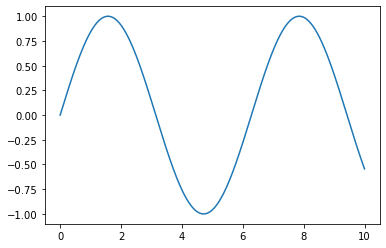

In [14]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 1001)   # generating 100 evenly space numbers between 0 and 10 
y = np.sin(x)
plt.plot(x, y) # calling for the plot function on x and sin(x)

 ## `show()` or No `show()` (How to display your plots)
A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context. 

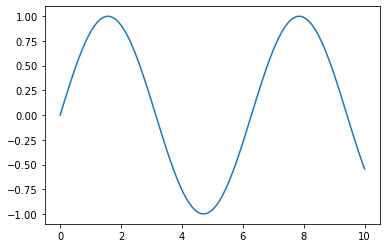

In [15]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 
plt.plot(x, np.sin(x))     # calling for the plot function on x and sin(x)
plt.show()  # calling for the show function

Alternatively, you can use `;` to suppress such unwanted information. In python, `;` is used to suppress output.

In [ ]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 

plt.plot(x, np.sin(x));     # calling for the plot function on x and sin(x)

## Setting Styles
There are many styles in `matplotlib` that one can use. 

In [16]:
plt.style.available?

In [17]:
plt.style.use('seaborn')

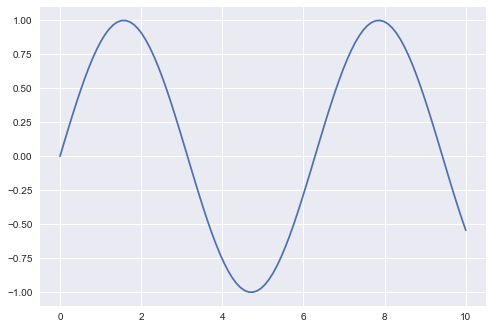

In [18]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 
plt.plot(x, np.sin(x));     # calling for the plot function on x and sin(x)

One can create a single figure with multiple lines by calling the `plot` function multiple times

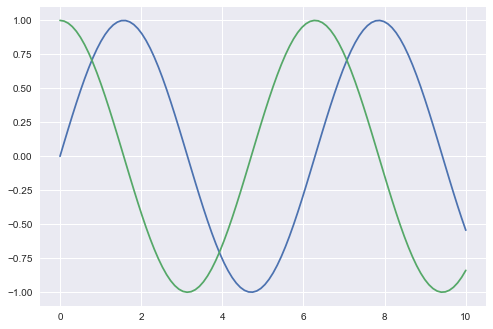

In [19]:
# Plotting multiple lines using matplotlib
plt.plot(x, np.sin(x))   # plotting the first line
plt.plot(x, np.cos(x))  # plotting the second line
plt.show()

## Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the savefig() command. For example, to save the previous figure as a PNG file, you can run this:

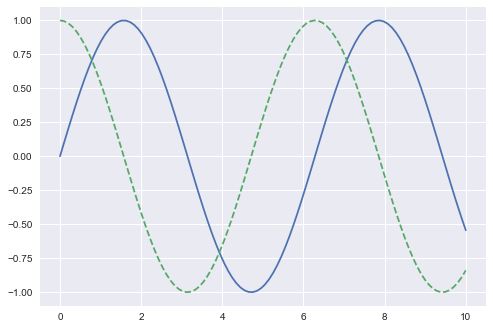

In [21]:
#plt.style.use('classic')
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
fig.savefig('my_figure2.png')   # calling savefig function to save the plot

## Plotting lines in `matplotlib`

As you can see in the previous plots, `matplotlib` chose the colors and the type of lines automatically. However, one can also set their own colors and line types. Let us look at some examples in the cells below.

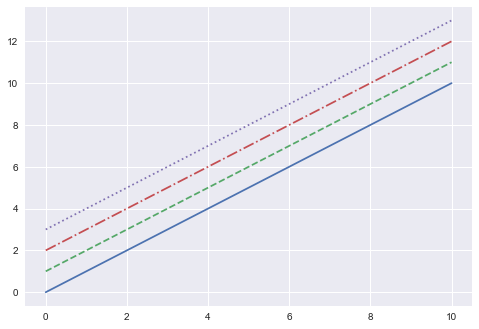

In [22]:
# changing the linestyles
plt.plot(x, x + 0, linestyle='solid')    
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

Alternatively, I can use short cuts to obtain the above plot exactly. 

|character|description|
| ----------- | ----------- |
|```-``` | solid |
|```--``` | dashed |
|```-.``` | dash-dot |
|```:``` | dotted |

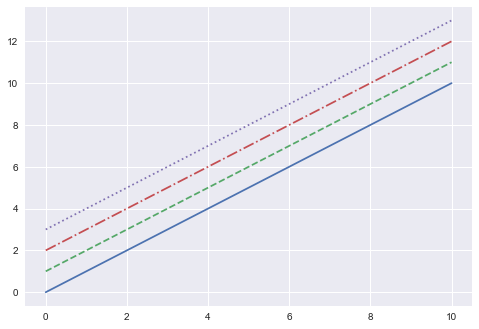

In [23]:
# For short, you can use the following codes:
plt.plot(x, x + 0, linestyle='-')  # solid
plt.plot(x, x + 1, linestyle='--') # dashed
plt.plot(x, x + 2, linestyle='-.') # dashdot
plt.plot(x, x + 3, linestyle=':');  # dotted

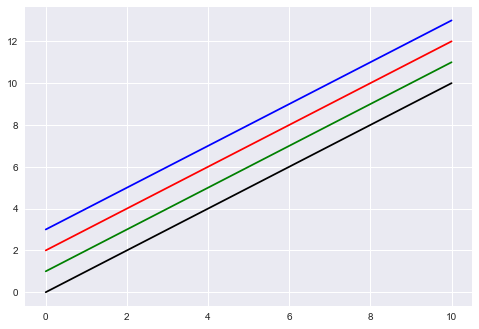

In [24]:
# changing colours of lines
plt.plot(x, x + 0, color='black')  
plt.plot(x, x + 1, color='green') 
plt.plot(x, x + 2, color='red') 
plt.plot(x, x + 3, color='blue')
plt.show()

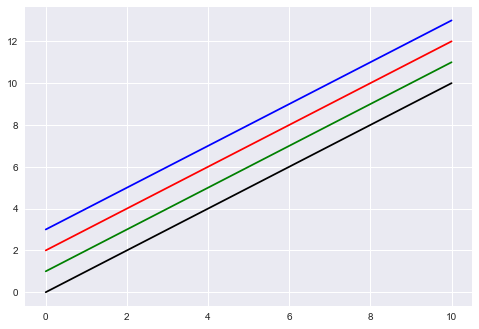

In [25]:
plt.plot(x, x + 0, color='k')  # black line
plt.plot(x, x + 1, color='g')  # green line
plt.plot(x, x + 2, color='r')  # red line 
plt.plot(x, x + 3, color='b'); # blue line

This is the abbreviations for the colours available in `matplotlib`.

| character | color |
| ----------- | ----------- |
| ``'b'`` | blue |
| ``'g'`` | green |
| ``'r'`` | red |
| ``'c'`` | cyan |
| ``'m'`` | magenta |
| ``'y'`` | yellow |
| ``'k'`` | black |
| ``'w'`` | white |

An advantage of using `matplotlib`, is the ability to combine color choice and linestyle. Let us see the example in the cell below.

Next, let us look at some combinations.

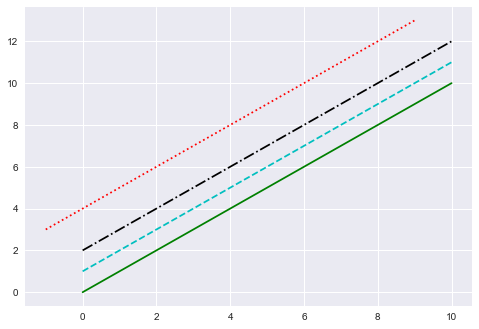

In [26]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x-1, x + 3, ':r'); # dotted red

In [ ]:
plt.plot(x, x+0, '-g', x, x+1, '--c', x, x+2, '-.k', x, x+3, ':r');

Also, one can choose the type of marker they want. For example, in the cell below, we have `go--`. This will generate a green circle marker with dashed lines running in it.

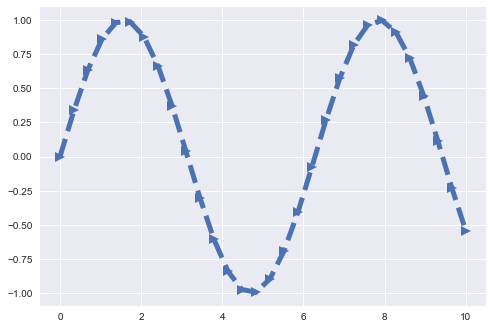

In [32]:
y = np.linspace(0, 10, 30)
plt.plot(y, np.sin(y), '>--', linewidth=5, markersize=10);

**Markers**

|character|description|
| ----------- | ----------- |
|```.``` | point marker|
|```,``` | pixel marker|
|```o``` | circle marker|
|```v``` | triangle_down marker|
|```^``` | triangle_up marker|
|```<``` | triangle_left marker|
|```>``` | triangle_right marker|
|```1``` | tri_down marker|
|```2``` | tri_up marker|
|```3``` | tri_left marker|
|```4``` | tri_right marker|
|```s``` | square marker|
|```p``` | pentagon marker|
|```*``` | star marker|
|```h``` | hexagon1 marker|
|```H``` | hexagon2 marker|
|```+``` | plus marker|
|```x``` | x marker|
|```D``` | diamond marker|
|```d``` | thin_diamond marker|
|```_``` | hline marker|

The general approach to the `plot` function is very simple;

```plot(x, y, [fmt], **kwargs)``` <br>
```plot(x, y, [fmt], x2, y2, [fmt], ..., **kwargs)```

## Adjusting the axes limits
The axes are adjusted by using `xlim` and `ylim` functions.

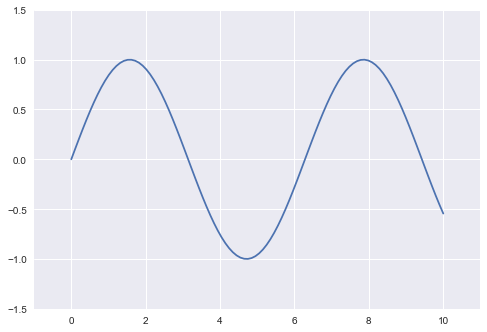

In [33]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)         # changing the limits of the x-axis
plt.ylim(-1.5, 1.5);     # changing the limits of the y-axis

Alternatively, one can use the `axis` function. `axis()` method allows you to set the `x` and `y` limits with a single call, by passing a list which specifies `[xmin, xmax, ymin, ymax]`:

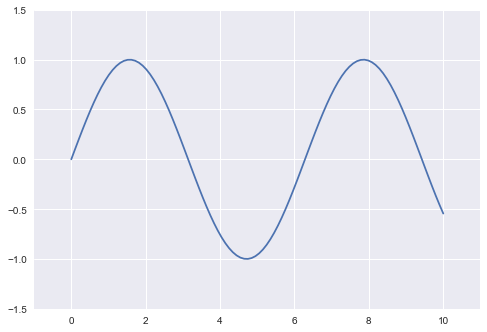

In [34]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);  # alternative approach to changing the limit of the axes

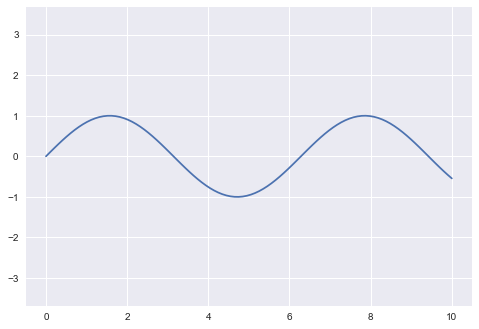

In [35]:
plt.plot(x, np.sin(x))
plt.axis('equal');  # equal option creates a 1:1 aspect ratio

## Labeling plots

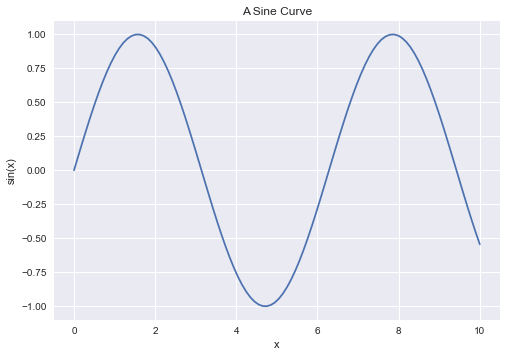

In [39]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")  # adding title of the plot
plt.xlabel('x')            # adding label for the x-axis of the plot 
plt.ylabel('sin(x)');      # adding label for the y-axis of the plot 
plt.title?

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. Again, Matplotlib has a built-in way of quickly creating such a legend. It is done via the `legend()` method. Though there are several valid ways of using this, it easier to specify the label of each line using the `label` keyword of the plot function:

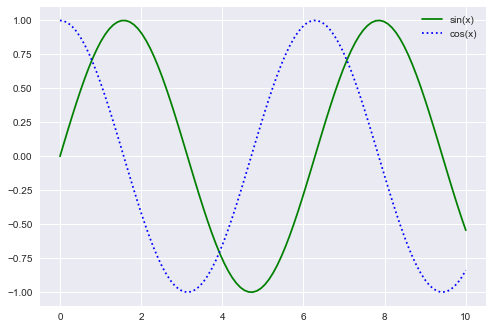

In [40]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b', label='cos(x)')   # adding the label argument for plot 2
plt.legend(); # calling for the legend

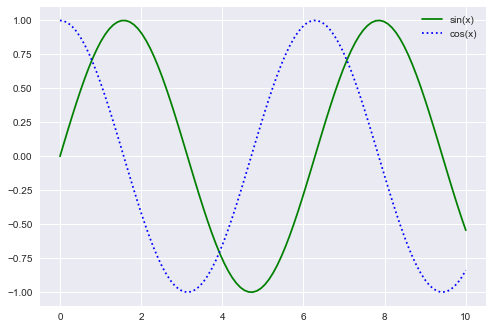

In [41]:
plt.plot(x, np.sin(x), '-g')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b')   # adding the label argument for plot 2
plt.legend(['sin(x)','cos(x)']); # calling for the legend

## Scatter Plot

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape. 

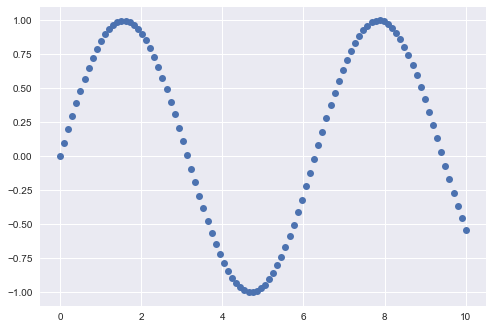

In [46]:
# showing a scatter plot with `plot` function
plt.plot(x, np.sin(x), 'o');

Mainly, and a more powerful method of creating scatter plots is the `scatter` function, which can be used very similarly to the `plot` function:

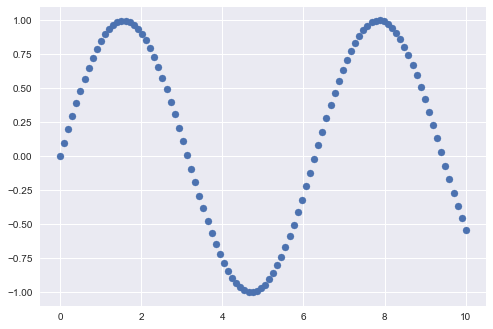

In [47]:
# plotting scatter plot
plt.scatter(x, np.sin(x));
plt.scatter?

### `plot` Versus `scatter`: A Note on Efficiency
Aside from the different features available in `plot` and `scatter`, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, `plot` can be noticeably more efficient than `scatter`. The reason is that `scatter` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In `plot`, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, `plot` should be preferred over `scatter` for large datasets.

## Plotting Histogram

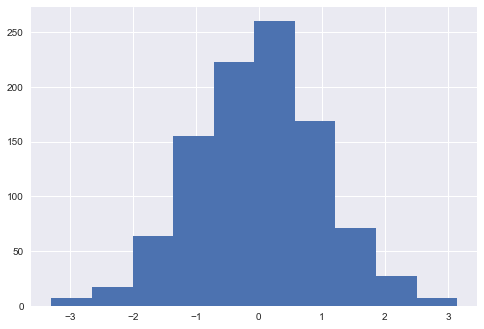

In [48]:
data = np.random.randn(1000) # generating random normal numbers
plt.hist(data); # plotting histogram

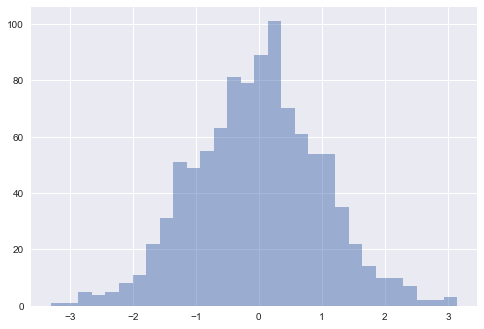

In [49]:
# tuning histogram plot
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', edgecolor=None);

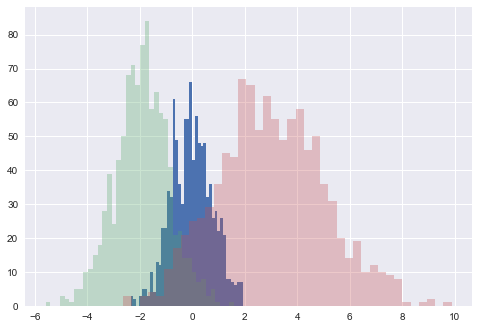

In [56]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist(x1, histtype='stepfilled', alpha=1, bins=40)
plt.hist(x2, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x3, histtype='stepfilled', alpha=0.3, bins=40);

An alternative to the cell above

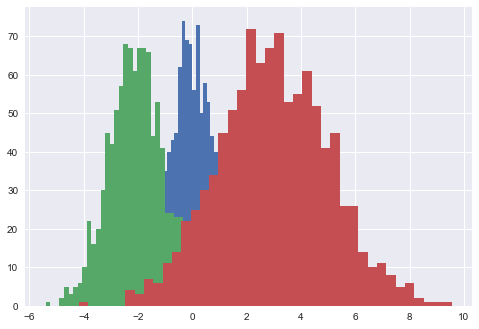

In [59]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict( bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);
np.random.randn?
plt.hist?

## Customizing plot legends
Plot legends give meaning to a visualization, assigning meaning to the various plot elements. We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the `legend()` command, which automatically creates a legend for any labeled plot elements:

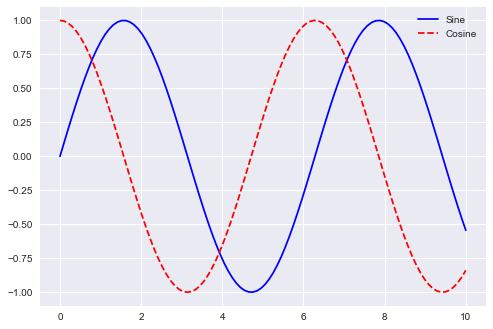

In [53]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend();

But there are many ways we might want to customize such a legend. For example, we can specify the location and turn off the frame:

In [ ]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend(loc='upper right'); # adding positional argument to legend

We can use the `ncol` command to specify the number of columns in the legend and `title` to specify the title of the legend:

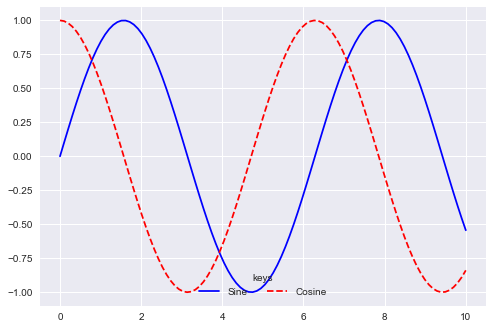

In [54]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend(loc='lower center', ncol=2, title='keys');

## Creating Subplots
Sometimes it is helpful to compare different views of data side by side. To this end, Matplotlib has the concept of subplots: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts. 

The most basic method of creating an axes is to use the `axes` function. `axes` also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent `[left, bottom, width, height]` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

In [ ]:
plt.axes()  # standard axes
plt.plot(x, np.sin(x))
plt.axes([0.65, 0.65, 0.2, 0.2]); # new coordinated figure
plt.plot(x, np.cos(x));

### Simple Grids of Subplots
Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is `subplot()`, which creates a single subplot within a grid. As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

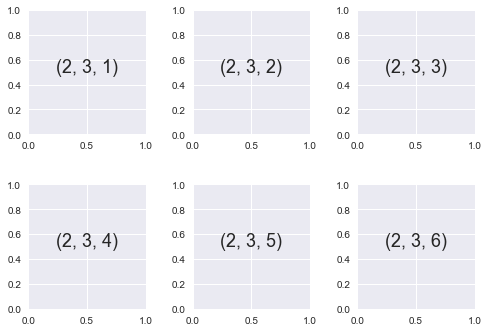

In [60]:
plt.figure().subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

An example of subplot

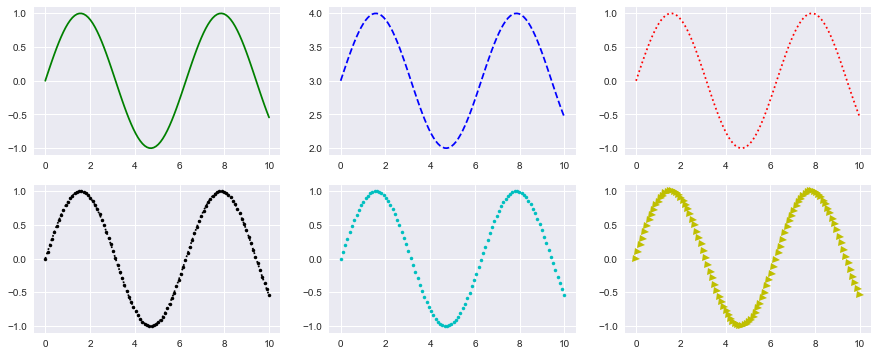

In [63]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, 1)
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, 2)
plt.plot(x, np.sin(x) + 3, '--b')
plt.subplot(2, 3, 3)
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '>y');

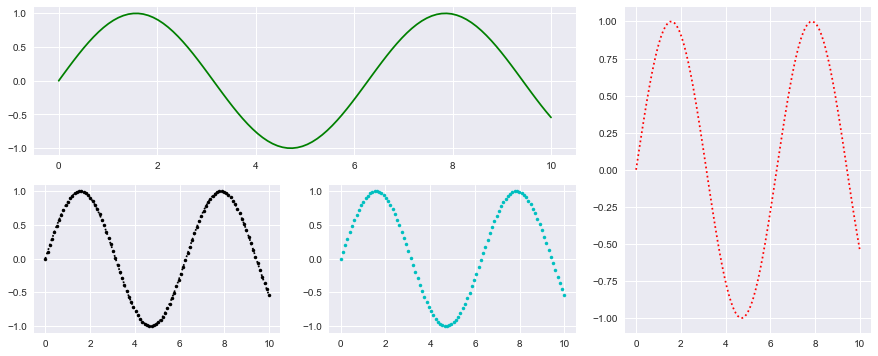

In [64]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, (1,2))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, (3,6))
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')

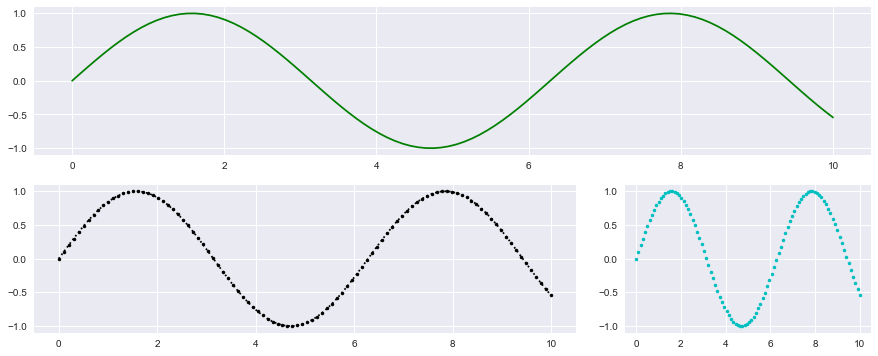

In [66]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, (1,3))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, (4,5))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '.c');

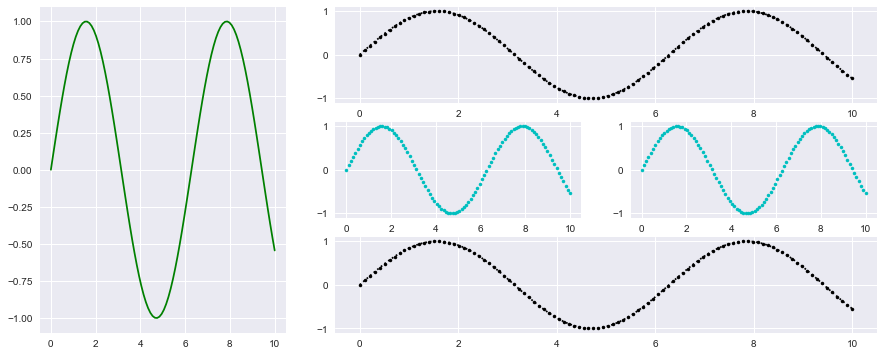

In [67]:
plt.figure(figsize=(15,6))
plt.subplot(3, 3, (1,7))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(3, 3, (2,3))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(3, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(3, 3, 6)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(3, 3, (8,9))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.show()

## Text and Annotation
Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary. Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this. Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. We'll start by setting up the notebook for plotting and importing the functions we will use:

Text(6, 7.5, 'Gradient (0.2, 0.2)')

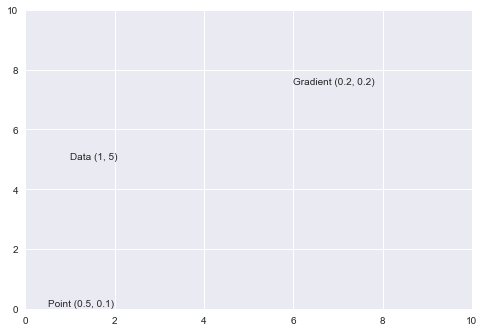

In [68]:
plt.axis([0, 10, 0, 10])
plt.text(1, 5, "Data (1, 5)")
plt.text(0.5, 0.1, "Point (0.5, 0.1)")
plt.text(6, 7.5, "Gradient (0.2, 0.2)")

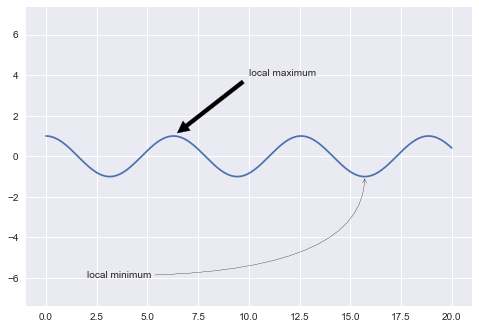

In [69]:
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')
plt.annotate('local maximum', 
             xy=(6.28, 1), 
             xytext=(10, 4), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('local minimum', 
             xy=(5 * np.pi, -1), 
             xytext=(2, -6),
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));

In [1]:
import numpy as np
import pandas as pd

# 1. Data Structure
## 1.1 <b> Pandas Series </b>
- A 1-dimensional labeled array
- Supports many data types
- Axis labels $\rightarrow$ index (get and set values by index label)
- Valid argument to most NumPy
methods

In [2]:
data0 = pd.Series(data = [1,2,3.,4,5,6,7,8])
data0

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64

In [5]:
#data1 = pd.Series(data = [1,2,3.,4,5,6,7,8], index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
data1 = pd.Series(data = [1,2,3.,4,5,6,7,8,9], index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','a'])
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

In [15]:
data1.index
data1[4]
data1[[2,4,5]]
data1['a']
'a' in data1
data1*3
data1**3
data1/2
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

##  1.2. <b>DataFrame </b>
- A 2-dimensional labeled data
structure
- A dictionary of Series objects
    - Columns can be of potentially
different types
- Optionally parameters for fine-tuning:
    - index (row labels)
    - columns (column labels)

Pandas provides many constructors to create DataFrames!

In [16]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
data2

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,NaN
chemistry,NaN,78.0


In [17]:
data2.index
data2.columns

Index(['GradeS1', 'GradeS2'], dtype='object')

In [18]:
d= pd.DataFrame(data2,index=['Maths', 'Physics','Economics'])#Create another data frame with some index of data2
d

,GradeS1,GradeS2
Maths,70.0,90.0
Physics,98.0,88.0
Economics,NaN,76.0


In [ ]:
d= pd.DataFrame(data2,index=['Maths', 'Physics','Economics', 'elvira'], 
                columns= ('Grade12', 'GradeS2','GradeS1'))
d

,Grade12,GradeS2,GradeS1
Maths,NaN,90.0,70.0
Physics,NaN,88.0,98.0
Economics,NaN,76.0,NaN
elvira,NaN,NaN,NaN


# 2. Reading and Writing Data

## 2.1 <b> pandas: Data Ingestion (Reading) </b>
- Functions such as <font color = red> ‘read_excel’, ‘read_csv’, 'read_json', 'read_html', 'read_sql_query', 'read_sql_table' </b>, etc.

<b> Syntax: pandas.function(file_directory) </b>

In [ ]:
ddat = pd.read_excel('Climate_Dynamics.xlsx')
ddat
ddat.head()
ddat.head(3)
ddat.tail()

,Unnamed: 0,Quiz 1,Unnamed: 2,Quiz 2,Unnamed: 4,Bonus,Assignment 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Assignment 2,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Extended Quiz,Final Mark,Grade,Unnamed: 18
29,Remy Twiringiyimana,8.0,80,8.0,80,3.0,9.5,28.5,54.0,92,18.0,20.0,28.0,28.0,96,92.0,90.8,Distinction,Remy Twiringiyimana
30,Romain Akpahou,8.0,80,8.0,80,10.0,9.5,29.0,55.0,93.5,20.0,20.0,17.0,30.0,91,90.0,89.35,Distinction,Romain Akpahou
31,Yao Gahounzo,6.0,60,6.0,60,10.0,9.5,29.0,55.0,93.5,15.0,20.0,28.0,30.0,97,86.0,86.35,Distinction,Yao Gahounzo
32,Zeinab Hesham Abd El-ghany,9.0,90,9.0,90,17.0,9.5,29.0,56.0,94.5,20.0,20.0,17.0,30.0,91,77.0,89.05,Distinction,Zeinab Hesham Abd El-ghany
33,Titus,7.0,70,7.0,70,22.0,10.0,29.5,56.0,95.5,15.0,20.0,17.0,30.0,91,89.0,87.75,Distinction,Titus


In [ ]:
ddatt = pd.ExcelFile('DefenseSchedule2020forTutors.xlsx')
sheet1_df = pd.read_excel(ddatt, 'For Examiners ')
sheet2_df = pd.read_excel(ddatt, 'For Tutors ')
sheet1_df.head(2)
# sheet2_df.head(3)

,Unnamed: 0,Wednesday 3rd June,Examiner,Thursday 4th June,Unnamed: 4,Friday 5th June,Unnamed: 6,Unnamed: 7,Monday 8th June,Unnamed: 9,Tuesday 9th June,Unnamed: 11,Wednesday 10th June,Unnamed: 13
0,09:00:00,Angela Nyangate John,Patrice Takam,Yao Gahounzo,Stive,NaN,NaN,NaN,Patrick Pam Peter,Hove,Zeinab,Bourgeois,Leontine,Bemsibom
1,09:30:00,Mohamed Maysara Hassan Yagob,Antoine Bogso,Martin De Pores Barindirimana,Denis Ndanguza,Mulengo Kanzoka,Lydie (UR),NaN,Remy Mugenda Ineza,Hove,Dimitri,Erick Tetsadjio,Jean de Dieu,Bamba


In [ ]:
df = pd.read_json("https://data.smcgov.org/resource/mb6a-xn89.json")#JavaScript Object Notation
df.head()

,geography,geography_type,year,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,location_1,:@computed_region_uph5_8hpn,:@computed_region_i2t2_cryp
0,Atherton,Town,2014-01-01T00:00:00.000,13.6,12.3,2.7,3.5,"{'type': 'Point', 'coordinates': [-122.2, 37.4...",2.0,28596
1,Colma,Town,2014-01-01T00:00:00.000,6.3,6.4,10.4,2.4,"{'type': 'Point', 'coordinates': [-122.455556,...",4.0,28588
2,Foster City,City,2014-01-01T00:00:00.000,11.9,9.7,2.0,2.9,"{'type': 'Point', 'coordinates': [-122.266389,...",6.0,319
3,Portola Valley,Town,2014-01-01T00:00:00.000,48.1,0.0,0.0,1.8,"{'type': 'Point', 'coordinates': [-122.218611,...",14.0,28597
4,Redwood City,City,2014-01-01T00:00:00.000,16.4,10.6,6.6,3.0,"{'type': 'Point', 'coordinates': [-122.236111,...",21.0,28607


In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
data.head()

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


## 2.2. Data writing

Save the dataframe in the current directory

In [ ]:
#create a dataframe
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology'])}
data2 = pd.DataFrame(data2)
#==========================================
# index = False parameter will not write the index values, default is True
#data2.to_csv('data_new.csv', index=True)
#data2.to_csv('data_new.txt', sep='\t', index=True)
# data2.to_excel('data_new.xlsx',sheet_name='Sheet1', index = False)
data2.head()

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0


<b>Create a folder in the current directory and save the dataframe inside</b>

In [ ]:
#==============================================
# create a folder if it not exists
Name_of_folder = 'dbasc'
import os
if not os.path.exists(Name_of_folder):
    os.makedirs(Name_of_folder)
#==============================================
# index = False parameter will not write the index values, default is True
data2.to_csv(Name_of_folder+'/data_new.csv', index=False)
# data2.to_csv(Name_of_folder+'/mtcars_new.txt', sep='\t', index=False)
# data2.to_excel(Name_of_folder+'/mtcars_new.xlsx',sheet_name='Sheet1', index = False)

In [ ]:
data1

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
h    8.0
a    9.0
dtype: float64

# 3. Basic Statistics Summary
<b> pandas in Descriptive Statistics </b>
Functions such as 'describe()', 'corr()', 'min()', 'max()', 'mode()', 'median()', 'std()', etc.

<b> Syntax : data_frame.function() </b>

In [ ]:
#data1
data1.describe()

count    9.000000
mean     5.000000
std      2.738613
min      1.000000
25%      3.000000
50%      5.000000
75%      7.000000
max      9.000000
dtype: float64

In [ ]:
data2

,GradeS1,GradeS2
Art,50.0,NaN
Biology,84.0,70.0
Economics,NaN,76.0
Finance,NaN,77.0
Geology,NaN,87.0
Maths,70.0,90.0
Physics,98.0,88.0
Sport,67.0,NaN
chemistry,NaN,78.0


In [ ]:
data2.describe()

,GradeS1,GradeS2
count,5.000000,7.000000
mean,73.800000,80.857143
std,18.143869,7.492854
min,50.000000,70.000000
25%,67.000000,76.500000
50%,70.000000,78.000000
75%,84.000000,87.500000
max,98.000000,90.000000


In [ ]:
data2.loc['Maths',:].describe()

count     2.000000
mean     80.000000
std      14.142136
min      70.000000
25%      75.000000
50%      80.000000
75%      85.000000
max      90.000000
Name: Maths, dtype: float64

In [ ]:
data2.corr()

,GradeS1,GradeS2
GradeS1,1.000000,-0.090784
GradeS2,-0.090784,1.000000


In [ ]:
data2.max()

GradeS1    98.0
GradeS2    90.0
dtype: float64

In [ ]:
data2.cov()

,GradeS1,GradeS2
GradeS1,329.2,-14.000000
GradeS2,-14.0,56.142857


In [ ]:
data2.std()

GradeS1    18.143869
GradeS2     7.492854
dtype: float64

In [ ]:
data2.mean()

GradeS1    73.800000
GradeS2    80.857143
dtype: float64

In [ ]:
df.head()

,geography,geography_type,year,less_than_high_school_graduate,high_school_graduate,some_college_or_associate_s_degree,bachelor_s_degree_or_higher,location_1,:@computed_region_uph5_8hpn,:@computed_region_i2t2_cryp
0,Atherton,Town,2014-01-01T00:00:00.000,13.6,12.3,2.7,3.5,"{'type': 'Point', 'coordinates': [-122.2, 37.4...",2.0,28596
1,Colma,Town,2014-01-01T00:00:00.000,6.3,6.4,10.4,2.4,"{'type': 'Point', 'coordinates': [-122.455556,...",4.0,28588
2,Foster City,City,2014-01-01T00:00:00.000,11.9,9.7,2.0,2.9,"{'type': 'Point', 'coordinates': [-122.266389,...",6.0,319
3,Portola Valley,Town,2014-01-01T00:00:00.000,48.1,0.0,0.0,1.8,"{'type': 'Point', 'coordinates': [-122.218611,...",14.0,28597
4,Redwood City,City,2014-01-01T00:00:00.000,16.4,10.6,6.6,3.0,"{'type': 'Point', 'coordinates': [-122.236111,...",21.0,28607


# 4. Viewing Data

In [ ]:
dic = {'Col1':[1, -2, 3, 1, 5, 6, 1, -3, 1, 1],
      'Col2': [4, -3 , 7, 8, 9, 5, 6, 4, -2, 2],
      'Col3': ['Euler', 'A', 'A', 'Euler', 'A', 'A', 'RK4', 'A', 'Euler', 'RK4']}

df = pd.DataFrame(dic, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
df

,Col1,Col2,Col3
a,1,4,Euler
b,-2,-3,A
c,3,7,A
d,1,8,Euler
e,5,9,A
f,6,5,A
g,1,6,RK4
h,-3,4,A
i,1,-2,Euler
j,1,2,RK4


## 4.1 The characteristics of a dataframe

In [ ]:
df.columns       #Get column names 
df.index         # Get dataframe index 
df.values        # Get values
df.dtypes        # Get column datatypes
df.shape



(10, 3)

## 4.2 Access, slice and update the values of a dataframe
To access, slice or update the value of a dataframe one can use the methods <b>loc or iloc</b>.

<b>loc</b> gets rows (or columns) with particular labels from the index. <b>iloc</b> gets rows (or columns) at particular positions in the index (so it only takes integers). 
### 4.2.1 Selecting pandas data using “iloc”

The <b>iloc</b> indexer for Pandas Dataframe is used for <b>integer-location based indexing / selection by position</b>.

The iloc indexer syntax is 
$$\text{data.iloc[<row selection>, <column selection>]},$$ 

which is sure to be a source of confusion for R users. <b>iloc</b> in pandas is used to select rows and columns by number, in the order that they appear in the data frame. You can imagine that each row has a row number from 0 to the total rows (<b>data.shape[0]</b>)  and <b>iloc[...]</b> allows selections based on these numbers. The same applies for columns (ranging from 0 to <b>data.shape[1]</b>)

There are two “arguments” to iloc – a row selector, and a column selector.  For example:

In [ ]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
data.head(5)

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
0,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,969
1,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,207
2,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,824
3,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,772
4,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


In [ ]:
# # Single selections using iloc and DataFrame
# # Rows:
data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
data.iloc[1] # second row of data frame (Evan Zigomalas)
data.iloc[-1] # last row of data frame (Mi Richan)
# # Columns:
data.iloc[:,0] # first column of data frame (first_name)
data.iloc[:,1] # second column of data frame (last_name)
data.iloc[:,-1] # last column of data frame (id)

0      969
1      207
2      824
3      772
4       48
      ... 
495    188
496     86
497    584
498    548
499     74
Name: id, Length: 500, dtype: int64

<b>Note that .iloc returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected. To counter this, pass a single-valued list if you require DataFrame output.</b>


In [ ]:
data.iloc[:,[-1]] # last column of data frame (id)

,id
0,969
1,207
2,824
3,772
4,48
...,...
495,188
496,86
497,584
498,548


Multiple columns and rows can be selected together using the <b>.iloc</b> indexer.

In [ ]:
# # Multiple row and column selections using iloc and DataFrame
data.iloc[0:5] # first five rows of dataframe
data.iloc[:, 0:2] # first two columns of data frame with all rows
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).


,county,postal,phone1
0,Kent,CT2 7PP,01835-703597
1,Buckinghamshire,HP11 2AX,01937-864715
2,Bournemouth,BH6 3BE,01347-368222
3,Lincolnshire,DN36 5RP,01912-771311
4,West Midlands,B70 9DT,01547-429341


### 4.2.2. Selecting pandas data using “loc”

The Pandas loc indexer can be used with DataFrames for two different use cases:

    - Selecting rows by label/index
    - Selecting rows with a boolean / conditional lookup
The loc indexer is used with the same syntax as iloc: 
$$\text{data.loc[<row selection>, <column selection>]}$$

#### a. Label-based / Index-based indexing using .loc

Selections using the loc method are based on the index of the data frame (if any). Where the index is set on a DataFrame, using <b>df.set_index()</b>, the .loc method directly selects based on index values of any rows. For example, setting the index of our test data frame to the persons “last_name”:

In [ ]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
data.set_index("last_name", inplace=True)
data.head()

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Tomkiewicz,Aleshia,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk,969
Zigomalas,Evan,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk,207
Andrade,France,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,824
Mcwalters,Ulysses,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk,772
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


Now with the index set, we can directly select rows for different “last_name” values using <b>.loc[<label>]</b>  – either singly, or in multiples. For example:

In [ ]:
data.loc['Veness']
data.loc[['Andrade','Veness']]

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Andrade,France,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk,824
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


<b> Selecting single or multiple rows using .loc index selections with pandas. Note that the first example returns a series, and the second returns a DataFrame. You can achieve a single-column DataFrame by passing a single-element list to the .loc operation.</b>

In [ ]:
data.loc[['Veness']]

,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Veness,Tyisha,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk,48


Select columns with <b>.loc</b> using the names of the columns.

In [ ]:
data.loc[['Andrade','Veness'], ['first_name','address','city']]

,first_name,address,city
last_name,,,
Andrade,France,8 Moor Place,East Southbourne and Tuckton W
Veness,Tyisha,5396 Forth Street,Greets Green and Lyng Ward


When using the .loc indexer, columns are referred to by names using lists of strings, or “:” slices.

You can select ranges of index labels – the selection <b>data.loc['Bruch':'Julio']</b> will return all rows in the data frame between the index entries for <b>'Bruch'</b> and <b>'Julio'</b>. The following examples should now make sense:

In [ ]:
# Select rows with index values 'Andrade' and 'Veness', with all columns between 'city' and 'email'
data.loc[['Andrade', 'Veness'], 'city':'email']
# # Select all rows between 'Andrade' and 'Veness', with just 'first_name', 'address' and 'city' columns
data.loc['Andrade':'Veness', ['first_name', 'address', 'city']]
# # Select all rows between 'Andrade' and 'Veness', with all columns between 'city' and 'email' 
data.loc['Andrade':'Veness', 'city':'email']

,city,county,postal,phone1,phone2,email
last_name,,,,,,
Andrade,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com
Mcwalters,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com
Veness,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com


Note that in the last example, <b>data.loc[207]</b> (the row with index value 207) is not equal to <b>data.iloc[207]</b> (the 207th row in the data)

In [ ]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
# Change the index to be based on the 'id' column
data.set_index('id', inplace=True)
data.head()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
969,Aleshia,Tomkiewicz,Alan D Rosenburg Cpa Pc,14 Taylor St,St. Stephens Ward,Kent,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.alandrosenburgcpapc.co.uk
207,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
824,France,Andrade,"Elliott, John W Esq",8 Moor Place,East Southbourne and Tuckton W,Bournemouth,BH6 3BE,01347-368222,01935-821636,france.andrade@hotmail.com,http://www.elliottjohnwesq.co.uk
772,Ulysses,Mcwalters,"Mcmahan, Ben L",505 Exeter Rd,Hawerby cum Beesby,Lincolnshire,DN36 5RP,01912-771311,01302-601380,ulysses@hotmail.com,http://www.mcmahanbenl.co.uk
48,Tyisha,Veness,Champagne Room,5396 Forth Street,Greets Green and Lyng Ward,West Midlands,B70 9DT,01547-429341,01290-367248,tyisha.veness@hotmail.com,http://www.champagneroom.co.uk


In [ ]:
i = data.index[1]
print('i = ',i)
#select the row with 'id' = i
data.loc[[i]]

i =  207


,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
207,Evan,Zigomalas,Cap Gemini America,5 Binney St,Abbey Ward,Buckinghamshire,HP11 2AX,01937-864715,01714-737668,evan.zigomalas@gmail.com,http://www.capgeminiamerica.co.uk
207,Eva,Joulwan,Central Hrdwr & Elec Corp,7 Lear Rd,Stroud,Hampshire,GU32 3PQ,01779-720349,01961-802899,eva.joulwan@gmail.com,http://www.centralhrdwreleccorp.co.uk
207,Allene,Burau,Allied Plastics,8 Barlow St #6,Barlow,Derbyshire,S18 7TH,01731-825958,01260-963065,allene.burau@hotmail.com,http://www.alliedplastics.co.uk


In [ ]:
data.iloc[[i]]

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
id,,,,,,,,,,,
876,Madalyn,Dubberly,L & M Industrial Chemicals Inc,1 Lower Burlington St,Northfleet South Ward,Kent,DA11 8RN,01974-720949,01910-745476,madalyn.dubberly@gmail.com,http://www.lmindustrialchemicalsinc.co.uk


### b. Boolean / Logical indexing using .loc

Conditional selections with boolean arrays using $\text{data.loc[<selection>]}$ is the most common method that I use with Pandas DataFrames. With boolean indexing or logical selection, you pass an array or Series of True/False values to the <b>.loc</b> indexer to select the rows where your Series has True values.

In most use cases, you will make selections based on the values of different columns in your data set.

For example, the statement $$\text{data[‘first_name’] == ‘Antonio’]}$$ produces a Pandas Series with a True/False value for every row in the ‘data’ DataFrame, where there are “True” values for the rows where the first_name is “Antonio”. These type of boolean arrays can be passed directly to the <b>.loc</b> indexer as so:

In [ ]:
data = pd.read_csv('https://s3-eu-west-1.amazonaws.com/shanebucket/downloads/uk-500.csv')
# set a numeric id for use as an index for examples.
np.random.seed(21)
data['id'] = [np.random.randint(0,1000) for x in range(data.shape[0])]
 
data.set_index("last_name", inplace=True)

data.loc[data['first_name'] == 'Antonio']


,first_name,company_name,address,city,county,postal,phone1,phone2,email,web,id
last_name,,,,,,,,,,,
Villamarin,Antonio,Combs Sheetmetal,353 Standish St #8264,Little Parndon and Hare Street,Hertfordshire,CM20 2HT,01559-403415,01388-777812,antonio.villamarin@gmail.com,http://www.combssheetmetal.co.uk,978
Glasford,Antonio,Saint Thomas Creations,425 Howley St,Gaer Community,Newport,NP20 3DE,01463-409090,01242-318420,antonio_glasford@glasford.co.uk,http://www.saintthomascreations.co.uk,489
Heilig,Antonio,Radisson Suite Hotel,35 Elton St #3,Ipplepen,Devon,TQ12 5LL,01324-171614,01442-946357,antonio.heilig@gmail.com,http://www.radissonsuitehotel.co.uk,568


As before, a second argument can be passed to .loc to select particular columns out of the data frame. Again, columns are referred to by name for the loc indexer and can be a single string, a list of columns, or a slice “:” operation.

In [ ]:
data.loc[data['first_name'] == 'Antonio', ['email', 'address','city']]

,email,address,city
last_name,,,
Villamarin,antonio.villamarin@gmail.com,353 Standish St #8264,Little Parndon and Hare Street
Glasford,antonio_glasford@glasford.co.uk,425 Howley St,Gaer Community
Heilig,antonio.heilig@gmail.com,35 Elton St #3,Ipplepen


Note that when selecting columns, if one column only is selected, the .loc operator returns a Series. For a single column DataFrame, use a one-element list to keep the DataFrame format, for example:

In [ ]:
data.loc[data['first_name'] == 'Antonio', 'email']
data.loc[data['first_name'] == 'Antonio', ['email']]

,email
last_name,
Villamarin,antonio.villamarin@gmail.com
Glasford,antonio_glasford@glasford.co.uk
Heilig,antonio.heilig@gmail.com


# 5. Basic Operations

## 5.1 Sorting values in the DataFrame

In [ ]:
dic = {'Col1':[1, -2, 3, 1, 5, 6, 1, -3, 1, 1],
      'Col2': [4, -3 , 7, 8, 9, 5, 6, 4, -2, 2],
      'Col3': ['Euler', 'A', 'A', 'Euler', 'A', 'A', 'RK4', 'A', 'Euler', 'RK4']}

df = pd.DataFrame(dic, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

# #=============================================================
# #Create a new columns called 'X' and 'Y' in the dataframe df
df['X'] = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
df['Y'] = ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
# #============================================================
# df
df.loc['z'] = [1,2,3,4,5]
# #df

df


,Col1,Col2,Col3,X,Y
a,1,4,Euler,A,A
b,-2,-3,A,A,B
c,3,7,A,A,A
d,1,8,Euler,A,B
e,5,9,A,A,A
f,6,5,A,B,B
g,1,6,RK4,B,A
h,-3,4,A,B,B
i,1,-2,Euler,B,A
j,1,2,RK4,B,B


In [ ]:
df.sort_values(by =['Col1'],ascending=[True], inplace=True)# Sort DataFrame 
df.sort_values(by =['Col1', 'Col2'],ascending=[False,False], inplace=True)# Sort DataFrame
df

,Col1,Col2,Col3,X,Y
f,6,5,A,B,B
e,5,9,A,A,A
c,3,7,A,A,A
d,1,8,Euler,A,B
g,1,6,RK4,B,A
a,1,4,Euler,A,A
j,1,2,RK4,B,B
z,1,2,3,4,5
i,1,-2,Euler,B,A
b,-2,-3,A,A,B


## 5.2. Replace NaN Values in Pandas DataFrame

Depending on the scenario, you may use either of the 4 methods below in order to replace NaN values with zeros in Pandas DataFrame:

let us consider the following dataframe

In [ ]:
data2 = {'GradeS1': pd.Series(data = [70,50,67,84,98], 
                              index = ['Maths', 'Art', 'Sport', 'Biology', 'Physics']),
         'GradeS2': pd.Series(data = [90,70,88,78,76,77,87], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology']),
        'GradeS3': pd.Series(data = [69,75,73,87], 
                              index = ['Maths', 'chemistry', 'Economics', 'Geology']),
        'GradeS4': pd.Series(data = [90,70,88,78,76,77,87,98,90], 
                              index = ['Maths', 'Biology', 'Physics', 'chemistry', 'Economics', 'Finance', 'Geology','Art', 'Sport'])}
data2 = pd.DataFrame(data2)
data2

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,NaN,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,NaN,NaN,90
chemistry,NaN,78.0,75.0,78


1. For a single column or entire datafame using NumPy: 

In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the column 'GradeS2' of the dataframe using numpy
data3['GradeS2'].replace(np.nan,30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,30.0,NaN,90
chemistry,NaN,78.0,75.0,78


In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the entire dataframe using numpy
data3.replace(np.nan,30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,30.0,98
Biology,84.0,70.0,30.0,70
Economics,30.0,76.0,73.0,76
Finance,30.0,77.0,30.0,77
Geology,30.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,30.0,88
Sport,67.0,30.0,30.0,90
chemistry,30.0,78.0,75.0,78


2. For a single column or entire datafame using Pandas: 

In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the column 'GradeS2' using Pandas
data3['GradeS2'].fillna(30, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,30.0,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,30.0,NaN,90
chemistry,NaN,78.0,75.0,78


In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by 3 in the entire dataframe using Pandas
data3.fillna(3, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,3.0,3.0,98
Biology,84.0,70.0,3.0,70
Economics,3.0,76.0,73.0,76
Finance,3.0,77.0,3.0,77
Geology,3.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,3.0,88
Sport,67.0,3.0,3.0,90
chemistry,3.0,78.0,75.0,78


Replace missing values with last valid observation (useful in time series
data). For example, temperature does not change drastically compared to previous observation. So better approach is to fill NA is to forward or backward fill. There are mainly two methods available

In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by next value in the column 'GradeS1' of the dataframe using Pandas
data3['GradeS1'].fillna(method= 'bfill', inplace=True)
##Note that the last NaN was not replaced because there is no next value for him


##Replace NaN by next value in the column 'GradeS1' of the dataframe using Pandas
data3.fillna(method= 'bfill', inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,70.0,73.0,98
Biology,84.0,70.0,73.0,70
Economics,70.0,76.0,73.0,76
Finance,70.0,77.0,87.0,77
Geology,70.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,75.0,88
Sport,67.0,78.0,75.0,90
chemistry,NaN,78.0,75.0,78


In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Replace NaN by previous value in the column 'GradeS2' of the dataframe using Pandas
data3['GradeS2'].fillna(method= 'ffill', inplace=True)
##Note that the first NaN was not replaced because there is no next value for him


##Replace NaN by previous value in the entire dataframe using Pandas
data3.fillna(method= 'ffill', inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,70.0,73.0,98
Biology,84.0,70.0,73.0,70
Economics,70.0,76.0,73.0,76
Finance,70.0,77.0,87.0,77
Geology,70.0,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,75.0,88
Sport,67.0,88.0,75.0,90
chemistry,NaN,78.0,75.0,78


## 5.3. Delete NaN Values with Zeros in Pandas DataFrame

In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Delete all rows that contain NaN
data3.dropna(axis=0, inplace=True)
data3

,GradeS1,GradeS2,GradeS3,GradeS4
Maths,70.0,90.0,69.0,90


In [ ]:
#Make a deep copy of the data2
data3 = data2.copy()
#Delete all columns that contain NaN
data3.dropna(axis=1, inplace=True)
data3

,GradeS4
Art,98
Biology,70
Economics,76
Finance,77
Geology,87
Maths,90
Physics,88
Sport,90
chemistry,78


## 5.4. Grouping
Grouping involves one or more of the following steps:
- Splitting the data into groups based on some criteria,
- Applying a function to each group independently,
- Combining the results into a data structure

Let us consider the following data

In [ ]:
df = pd.DataFrame({'Name' : ['jack', 'jane', 'jack', 'jane', 'jack', 'jane','jack', 'jane'],
                   'State' : ['SFO', 'SFO', 'NYK', 'CA', 'NYK', 'NYK','SFO', 'CA'],
                   'Grade':['A','A','B','A','C','B','C','A'],
                   'Age' : np.random.randint(24, 50, size=8)})
df

,Name,State,Grade,Age
0,jack,SFO,A,36
1,jane,SFO,A,49
2,jack,NYK,B,35
3,jane,CA,A,48
4,jack,NYK,C,38
5,jane,NYK,B,29
6,jack,SFO,C,30
7,jane,CA,A,27


Find max age by Name / State

In [ ]:
df.groupby(['Name','State']).max()

Grade  Age
Name State           
jack NYK       C   38
     SFO       C   36
jane CA        A   48
     NYK       B   29
     SFO       A   49

# 6. Plot of a dataframe

In [ ]:
data2

,GradeS1,GradeS2,GradeS3,GradeS4
Art,50.0,NaN,NaN,98
Biology,84.0,70.0,NaN,70
Economics,NaN,76.0,73.0,76
Finance,NaN,77.0,NaN,77
Geology,NaN,87.0,87.0,87
Maths,70.0,90.0,69.0,90
Physics,98.0,88.0,NaN,88
Sport,67.0,NaN,NaN,90
chemistry,NaN,78.0,75.0,78


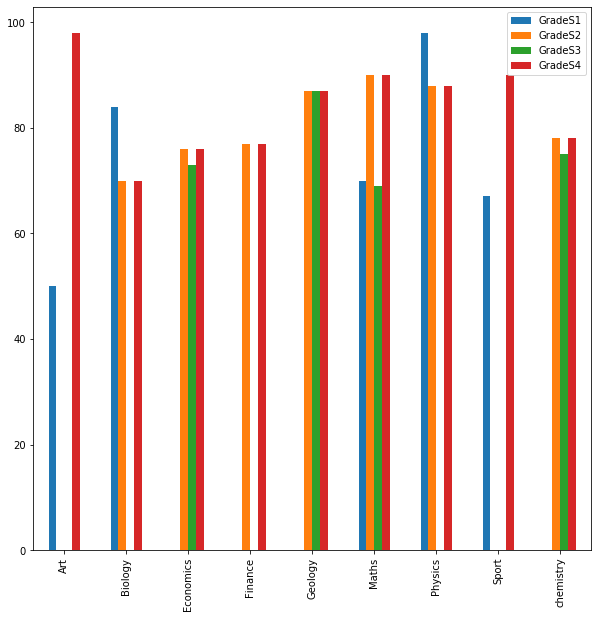

In [ ]:
import matplotlib.pyplot as plt
#data2.plot?
data2.plot(figsize=(10,10), kind= 'bar' )
plt.show()

In [ ]:
data2.plot?

In this session, we will demonstrate various techniques for visualising data using both `matplotlib` and `pandas`. This will also include the correct interpretation and understanding of the different plotting techniques. The data to be used are `flight_data.csv` and `weather.csv`. They can both be found in the folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('flight_data.csv')

In [3]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [4]:
df.shape

(336776, 19)

To reduce the amount of data we will be working with and make things a little easier, lets only look at _Alaska Airlines_ flights leaving from New York City in 2013. This can be done by subsetting the data in such a way that we only observe flights from Alaska Airlines (carrier code AS), as follows;

In [5]:
Alaska = df[df['carrier'] == 'AS']

This essentially picks out all of the rows within the flights data set for which the carrier code is AS and discards the rest, thus creating a new data set entitled Alaska. To observe the Alaska data we can use the following commands:

In [6]:
Alaska.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
78,2013,1,1,724.0,725,-1.0,1020.0,1030,-10.0,AS,11,N594AS,EWR,SEA,338.0,2402,7,25,1/1/2013 7:00
644,2013,1,1,1808.0,1815,-7.0,2111.0,2130,-19.0,AS,7,N553AS,EWR,SEA,336.0,2402,18,15,1/1/2013 18:00
949,2013,1,2,722.0,725,-3.0,949.0,1030,-41.0,AS,11,N592AS,EWR,SEA,314.0,2402,7,25,2/1/2013 7:00
1573,2013,1,2,1818.0,1815,3.0,2131.0,2130,1.0,AS,7,N552AS,EWR,SEA,332.0,2402,18,15,2/1/2013 18:00
1894,2013,1,3,724.0,725,-1.0,1012.0,1030,-18.0,AS,11,N533AS,EWR,SEA,325.0,2402,7,25,3/1/2013 7:00


In [7]:
Alaska.shape

(714, 19)

# Visualising the data 
## Scatterplots
This allows us to examine if there is any relationship between two variables, such as positive or negative correlation, and whether the relationship appears linear or not. Lets say we wanted to observe the relationship between departure and arrival delays. We can do that as follows:

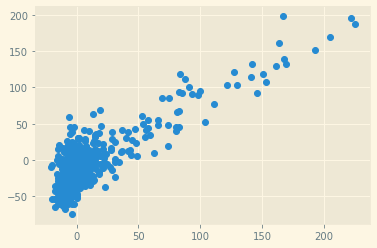

In [8]:
plt.style.use('Solarize_Light2')
plt.scatter('dep_delay', 'arr_delay', data=Alaska); 

## Adding labels to the axes

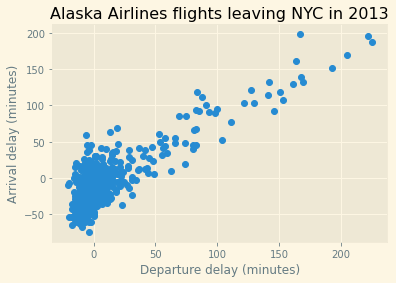

In [9]:
plt.scatter('dep_delay', 'arr_delay', data=Alaska)
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Alaska Airlines flights leaving NYC in 2013');

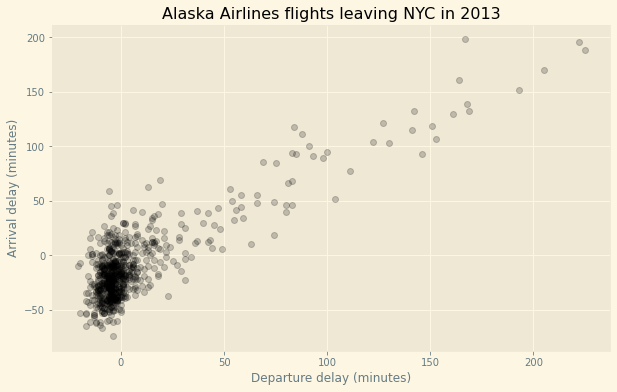

In [10]:
plt.figure(figsize=(10,6))
plt.scatter('dep_delay', 'arr_delay', data=Alaska, color='k', alpha=0.2)
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Alaska Airlines flights leaving NYC in 2013');

### Something to think about.
1. Why do departure and arrival delays appear to have a positive relationship?
2. Why is there a cluster of points at (0,0)? What does this indicate?

## Histograms
Histograms allow us to look at the statistical distribution of a variable. They show us how many values of a variable fall within specified bins. These bins give ranges of values for which the variable lies. The bins can be altered, that is, by changing their width, or by increasing the number of bins, such that we see the distribution at a higher resolution. Here, lets take a look at the weather data set. This data set contains hourly weather data from three airports (LGA, JFK and EWR) in New York City in 2013. 

In [11]:
weather = pd.read_csv('weather.csv')
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


Now, let us see  the distribution of the hourly temperature:

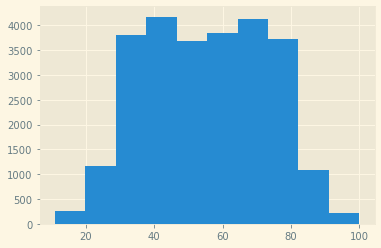

In [12]:
plt.hist(weather['temp']);

As mentioned earlier, we can view histogram as a higher resolution by increasing the number of bins.

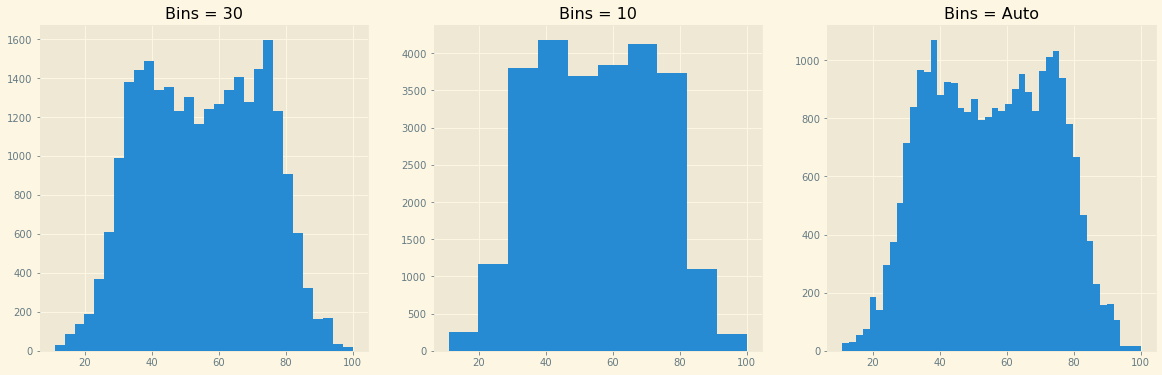

In [13]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Bins = 30')
weather['temp'].hist(bins=30)

plt.subplot(1,3,2)
plt.title('Bins = 10')
weather['temp'].hist(bins=10)

plt.subplot(1,3,3)
plt.title('Bins = Auto')
weather['temp'].hist(bins='auto')

plt.show()

Finally, let us plot a histogram with more information.

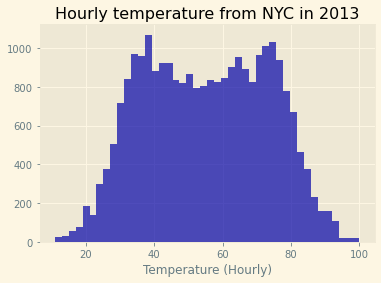

In [14]:
plt.style.use('Solarize_Light2')
plt.hist(weather['temp'], bins='auto', color='#0504aa', alpha=0.7)
plt.xlabel('Temperature (Hourly)')
plt.title('Hourly temperature from NYC in 2013')
plt.show()

### Something to think about
3. What does the histogram tell us about the hourly temperature levels from NYC in 2013?

## Boxplot
Another way to look at the distribution of a variable is using a boxplot. A boxplot makes use of the standard five-number summary, that is

* the minimum value;
* the first quartile or 25th percentile;
* the median (or 2nd quartile / 50th percentile);
* the third quartile or 75th percentile;
* and the maximum value.

Keeping with the hourly temperature data, the five-number summary can be obtained by using the following command:

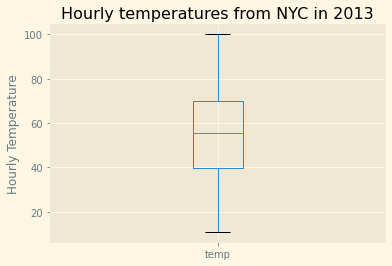

In [15]:
weather.boxplot('temp')
plt.ylabel('Hourly Temperature')
plt.title('Hourly temperatures from NYC in 2013')
plt.show()

We could look at how the hourly temperature changes by month:

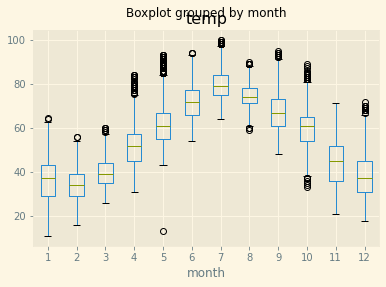

In [16]:
weather.boxplot('temp', by='month');

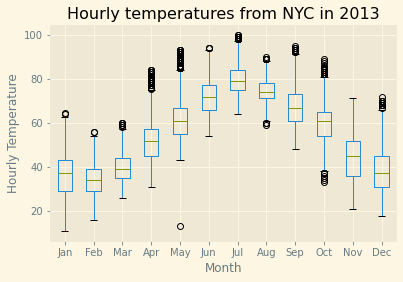

In [17]:
weather.boxplot('temp', by='month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Hourly Temperature')
plt.title('Hourly temperatures from NYC in 2013')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(list(range(1, 13)), months);

### Something to think about
4. Which months have the highest variability in temperature?

## Barplots
Barplots, or barcharts, are used to visualise the distributions of categorical variables. This essentially provides us with the frequencies of categories within a categorical variable. Lets take a look at the distribution of airline carriers within the flights data that flew out of New York City in 2013. We can do this by creating a table containing the number of flights from each airline carrier as follows:

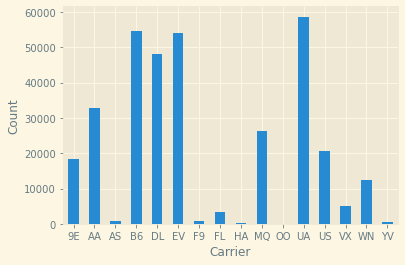

In [18]:
df.groupby('carrier').size().plot(kind='bar', rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

Barplots can also be used to compare two categorical variables. For instance, lets say we wanted to look atthe number of flights that flew out of New York York in 2013 from each carrier and from each airport (LGA, JFK and EWR). 

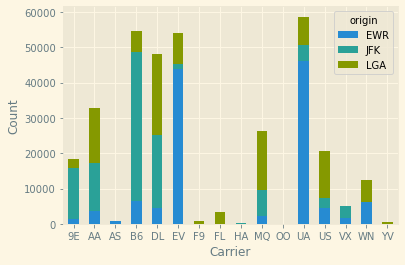

In [19]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', stacked=True, rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

This provides us with a visually nice barplot to present our carrier information by airport of origin. However,there are also alternative barplots to the stacked barplot.  One alternative to a stacked barplot is theside-by-side(ordodged)barplot, which, as suggested by its name, places the bars next to each anotherinstead of on top of one another. This can be produced as follows

#### Faceted barplot

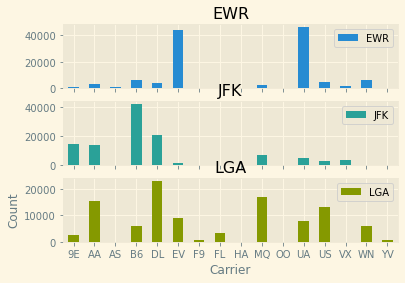

In [20]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', subplots=True, rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

#### side-by-side barplot

Text(0, 0.5, 'Count')

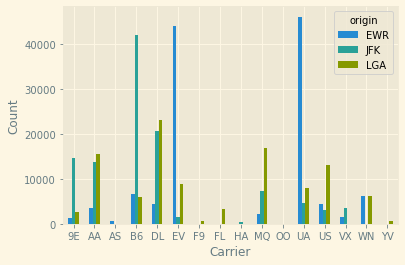

In [21]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count')

Linegraphs are typically used when looking at _time series_ data, that is, when we have information on how a variable changes over time. Hence, there is a natural ordering to the data when observing how something changes over time, and therefore, linegraphs should be avoided if there is no sequential ordering of a variable. Lets again look at the hourly temperature data, but this time only for Newark International Airport in January. This can be done by first subsetting the data as follows:

In [22]:
Newark_Jan = weather[(weather['origin'] == 'EWR') & (weather['month'] == 1)]
Newark_Jan

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,EWR,2013,1,31,19,33.08,15.08,47.10,270.0,20.71404,31.07106,0.0,1006.6,10.0,2013-02-01T00:00:00Z
738,EWR,2013,1,31,20,32.00,19.04,58.37,250.0,17.26170,26.46794,0.0,1007.3,10.0,2013-02-01T01:00:00Z
739,EWR,2013,1,31,21,32.00,10.04,39.38,260.0,28.76950,36.82496,0.0,1008.0,10.0,2013-02-01T02:00:00Z
740,EWR,2013,1,31,22,30.92,6.98,35.84,260.0,27.61872,35.67418,0.0,1008.5,10.0,2013-02-01T03:00:00Z


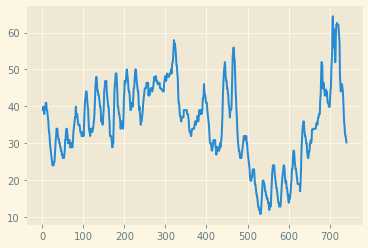

In [23]:
plt.plot(Newark_Jan['temp']);

## Seaborn Tutorial

Seaborn is a data visualization library built on top of Matplotlib. It is often used because it makes attractive visualizations and works easily with Pandas. While in Matplotlib you often have to write multiple lines of code to create a plot Seaborn makes assumptions on what you want which often translates into getting the same plot with 1 line of code.

### Installing with pip <br>
`pip install seaborn`

### Installing with conda <br>
`conda install seaborn`

### import

In [1]:
pwd

'C:\\Users\\HOVE\\Desktop\\Vizualization'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import Data

In [4]:
# You can import custom data
cs_df = pd.read_csv('ComputerSales.csv')

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
cs_df

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,Michelle Samms,F,46,NY,17-BY3613DX,Laptop,609.99,140.34,Flyer 3,November,2019
98,99,Mick Roberts,M,23,PA,BB980,Desktop,889.99,110.89,Flyer 2,May,2019
99,100,Ed Klondike,M,52,OH,15M-ED0023DX,Laptop,989.99,111.34,Email,November,2019
100,101,Moe Eggert,M,35,PA,GMA4000BST,Desktop,589.99,138.64,Website,May,2019


In [6]:
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Distribution Plots

### Distribution Plot

<AxesSubplot:xlabel='not_distracted', ylabel='Density'>

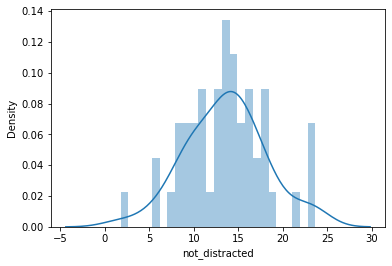

In [7]:
# Provides a way to look at a univariate distribution. A 
# univariate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
# Bins define how many buckets to divide the data up into between intervals
# For example put all profits between $10 and $20 in this bucket
sns.distplot(crash_df['not_distracted'], kde=True, bins=25)

### Joint Plot

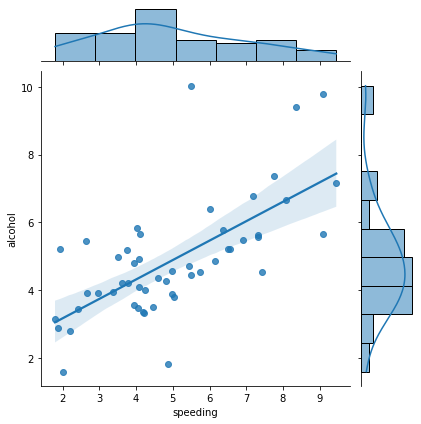

In [8]:
# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

### KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

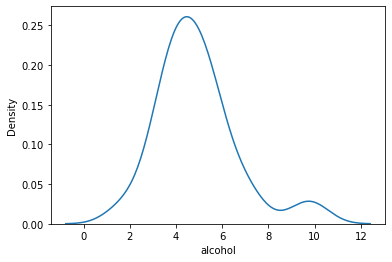

In [9]:
# Get just the KDE plot
sns.kdeplot(crash_df['alcohol'])

### Pair Plots

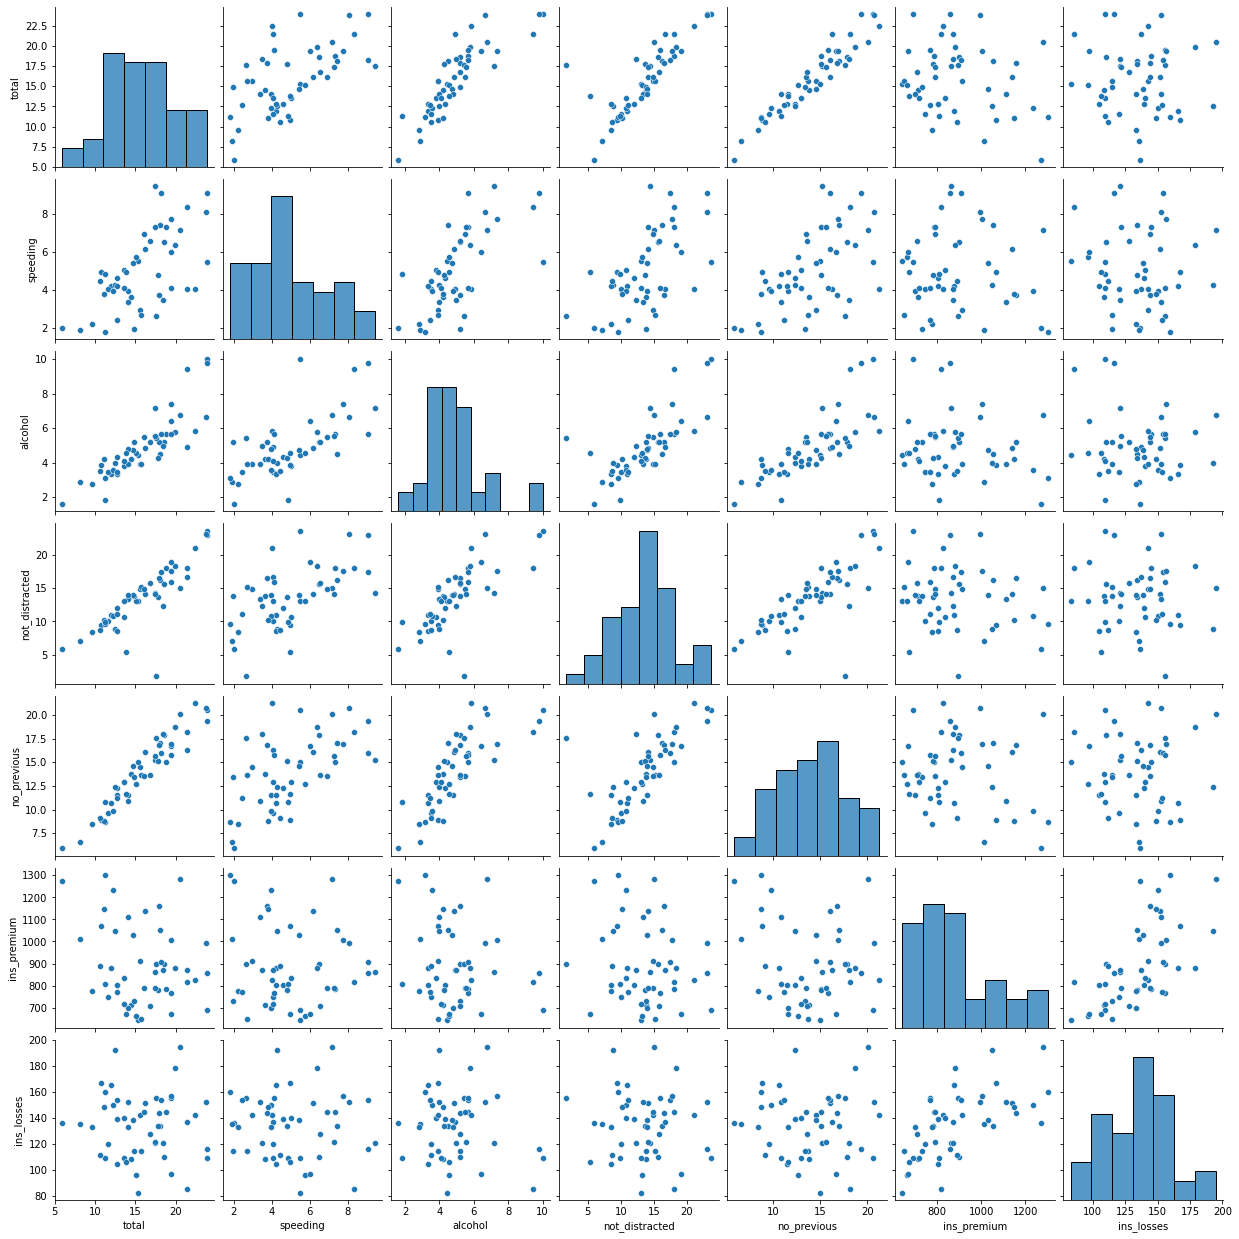

In [10]:
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(crash_df)

# Load data on tips
tips_df = sns.load_dataset('tips')

# With hue you can pass in a categorical column and the charts will be colorized
# You can use color maps from Matplotlib to define what colors to use
# sns.pairplot(tips_df, hue='sex', palette='Blues')

### Styling

<Figure size 576x288 with 0 Axes>

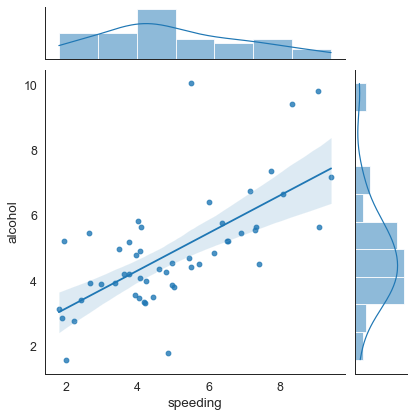

In [11]:
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('white')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(8,4))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=False)

### Categorical Plots

### Bar Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

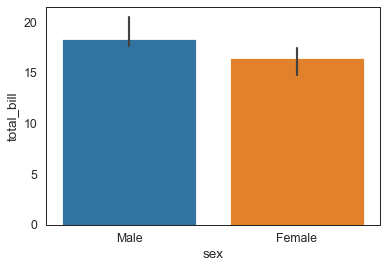

In [12]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

### Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

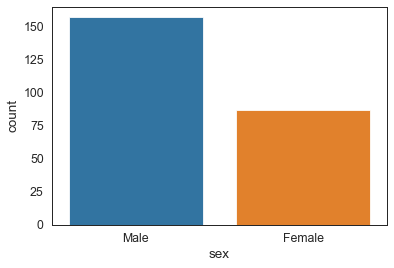

In [13]:
# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
sns.countplot(x='sex', data=tips_df)

### Box Plot

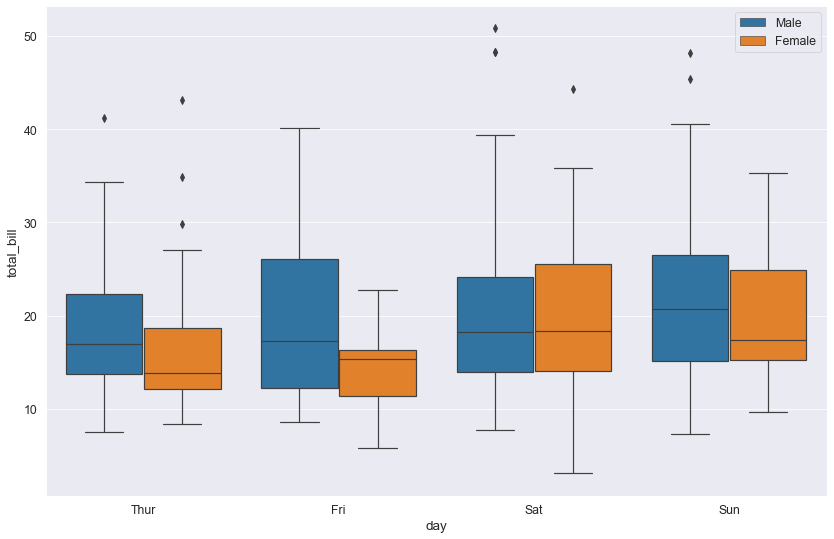

In [14]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)

### Violin Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

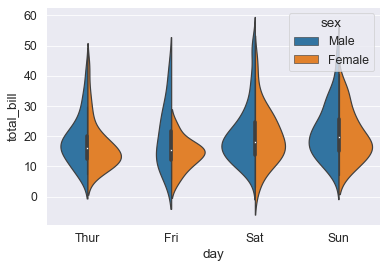

In [15]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
# Split allows you to compare how the categories compare to each other
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)

### Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

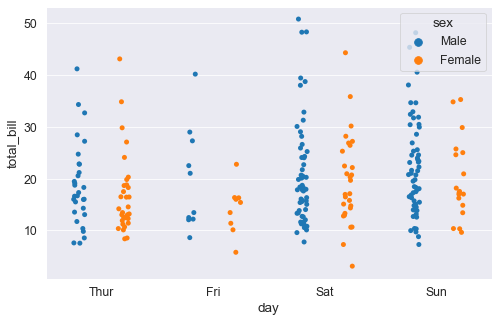

In [16]:
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)

### Swarm Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

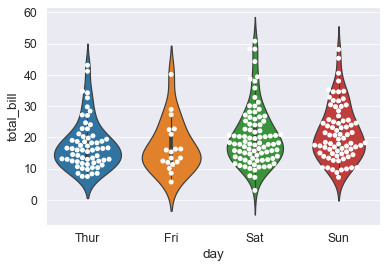

In [17]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots
# sns.swarmplot(x='day',y='total_bill',data=tips_df)

# You can stack a violin plot with a swarm
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')


### Palettes

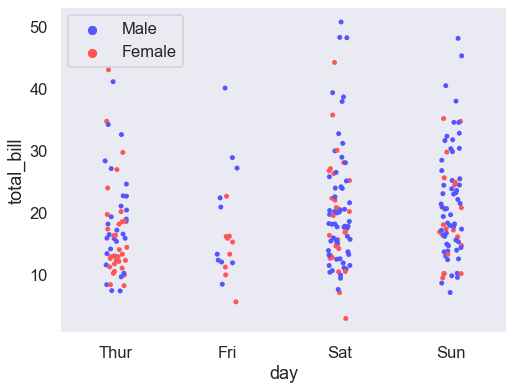

In [18]:
plt.figure(figsize=(8,6))

sns.set_style('dark')

sns.set_context('talk')

# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sns.stripplot(x='day',y='total_bill',data=tips_df, hue='sex', 
             palette='seismic')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
plt.legend(loc=0)

### Matrix Plots

### Heatmaps

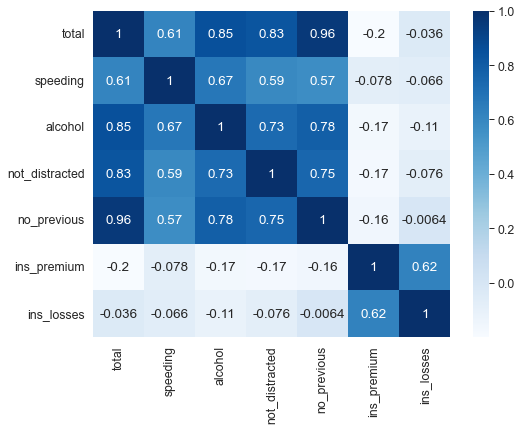

In [20]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = crash_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues');

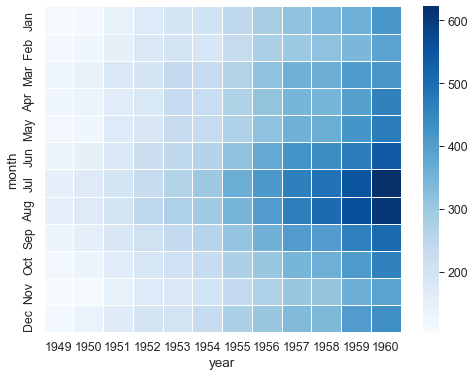

In [21]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years
# and the number of passengers for each
# We see that flights have increased over time and that most people travel in
# July and August
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
# You can separate data with lines
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1);

### Cluster Map

<Figure size 576x432 with 0 Axes>

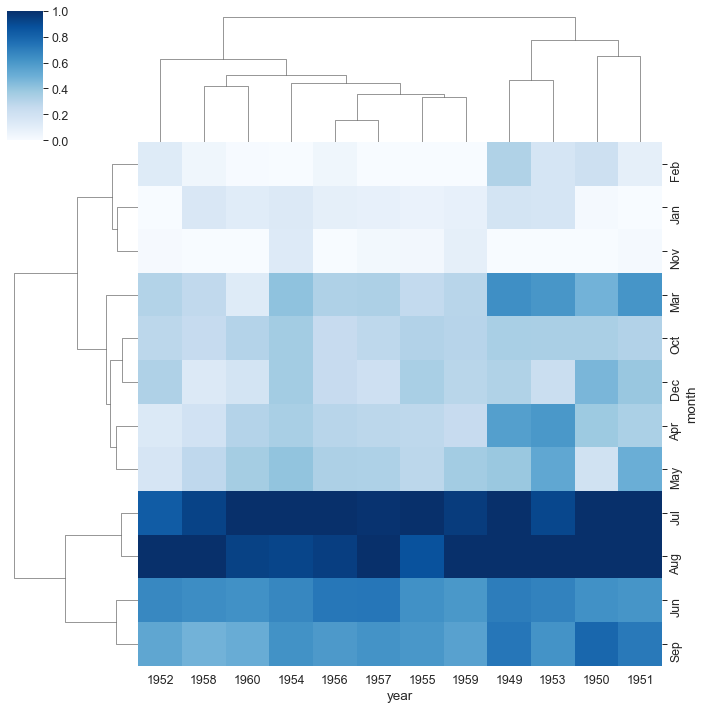

In [22]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this
# continues for the next closest (It compares columns / rows of the heatmap)
# This is data on iris flowers with data on petal lengths
iris = sns.load_dataset("iris")
# Return values for species
# species = iris.pop("species")
# sns.clustermap(iris)

# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering
sns.clustermap(flights,cmap="Blues", standard_scale=1)


### PairGrid

<Figure size 576x432 with 0 Axes>

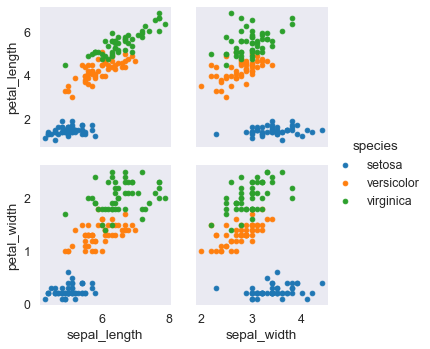

In [24]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
# iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
# iris_g.map(plt.scatter)

# Put a histogram on the diagonal 
# iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
# iris_g.map_offdiag(plt.scatter)

# Have different plots in upper, lower and diagonal
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend();

### Facet Grid

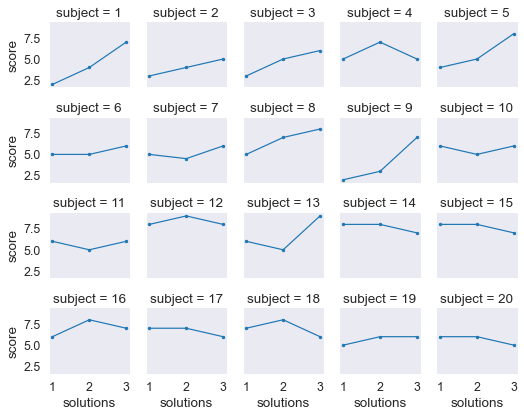

In [27]:
# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# You can pass in attributes for the histogram
# tips_fg.map(plt.hist, "total_bill", bins=8)

# Create a scatter plot with data on total bill & tip (You need to parameters)
# tips_fg.map(plt.scatter, "total_bill", "tip")

# We can assign variables to different colors and increase size of grid
# Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
#                       col_order=['Dinner', 'Lunch'], palette='Set1')
# tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

# # Define size, linewidth and assign a color of white to markers
# kws = dict(s=50, linewidth=.5, edgecolor="w")
# # Define that we want to assign different markers to smokers and non
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
#                         hue_order=['Yes','No'], 
#                         hue_kws=dict(marker=['^', 'v']))
# tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
# tips_fg.add_legend()

# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.');

### Regression Plots

In [28]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

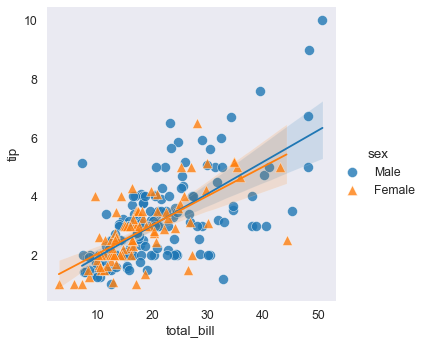

In [32]:
plt.figure(figsize=(8,6));
sns.set_context('paper', font_scale=1.4);

plt.figure(figsize=(8,6));

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'});

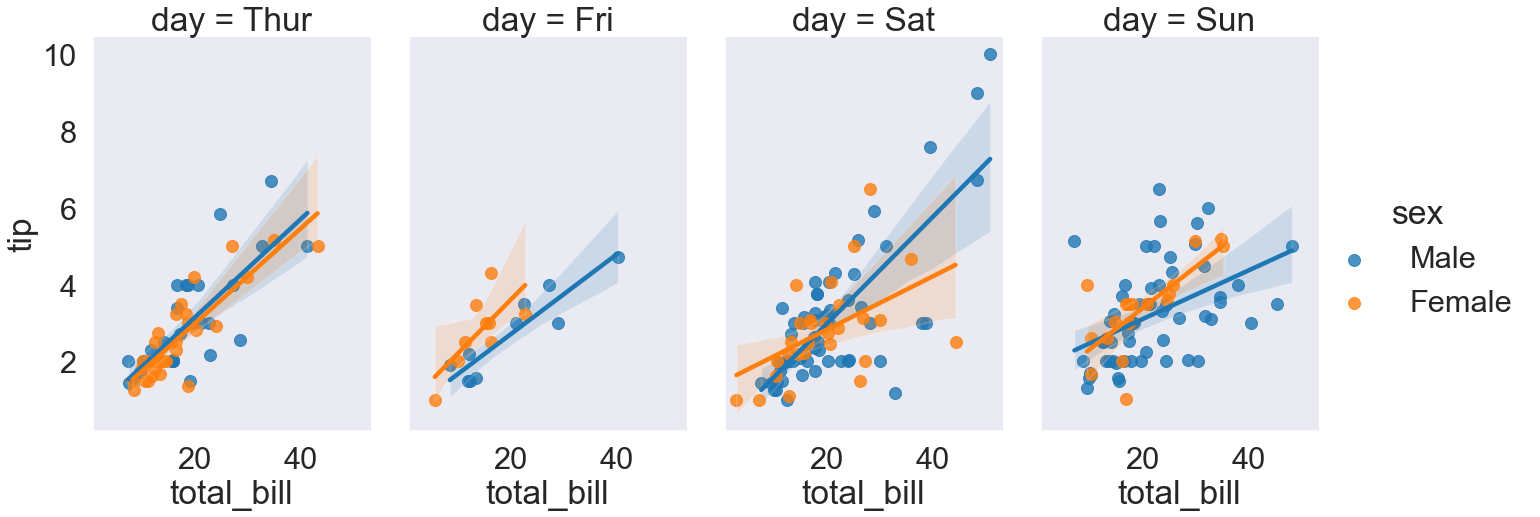

In [34]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6);